In [1]:
#############################################################################################################################
### Modelling the UK retail market. ###



In [2]:
from datetime import datetime
import numpy as np             #for numerical computations like log,exp,sqrt etc
import pandas as pd            #for reading & storing data, pre-processing
import matplotlib.pylab as plt #for visualization
#for making sure matplotlib plots are generated in Jupyter notebook itself
%matplotlib inline 
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from matplotlib.pylab import rcParams
#cParams['figure.figsize'] = 30, 615
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import itertools
import warnings
import seaborn as sns
from scipy.optimize import curve_fit
from scipy.optimize import differential_evolution
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import squarify

from sklearn import linear_model


In [3]:
#################################
### grocery marketshare  ###
#################################
glv10df=pd.read_csv(r'D:\\retail\glvmodel10.csv')
glv10df.head()

time  Tesco  Sainsbury's  Asda  Morrisons  Aldi  The Cooperative  Lidl  \
0  Jan-15   29.0         16.7  16.9       11.1   4.9              5.9   3.5   
1  Feb-15   28.7         16.8  17.0       11.0   5.0              5.9   3.5   
2  Mar-15   28.4         16.4  17.1       10.9   5.3              6.0   3.7   
3  Apr-15   28.4         16.5  16.9       10.9   5.4              6.0   3.8   
4  May-15   28.6         16.5  16.6       10.9   5.4              6.0   3.9   

   Waitrose  Iceland  Symbols  Other  
0       5.2      2.2      1.9    2.7  
1       5.2      2.2      2.0    2.8  
2       5.1      2.1      2.1    2.9  
3       5.1      2.1      2.0    2.9  
4       5.2      2.1      2.0    2.8

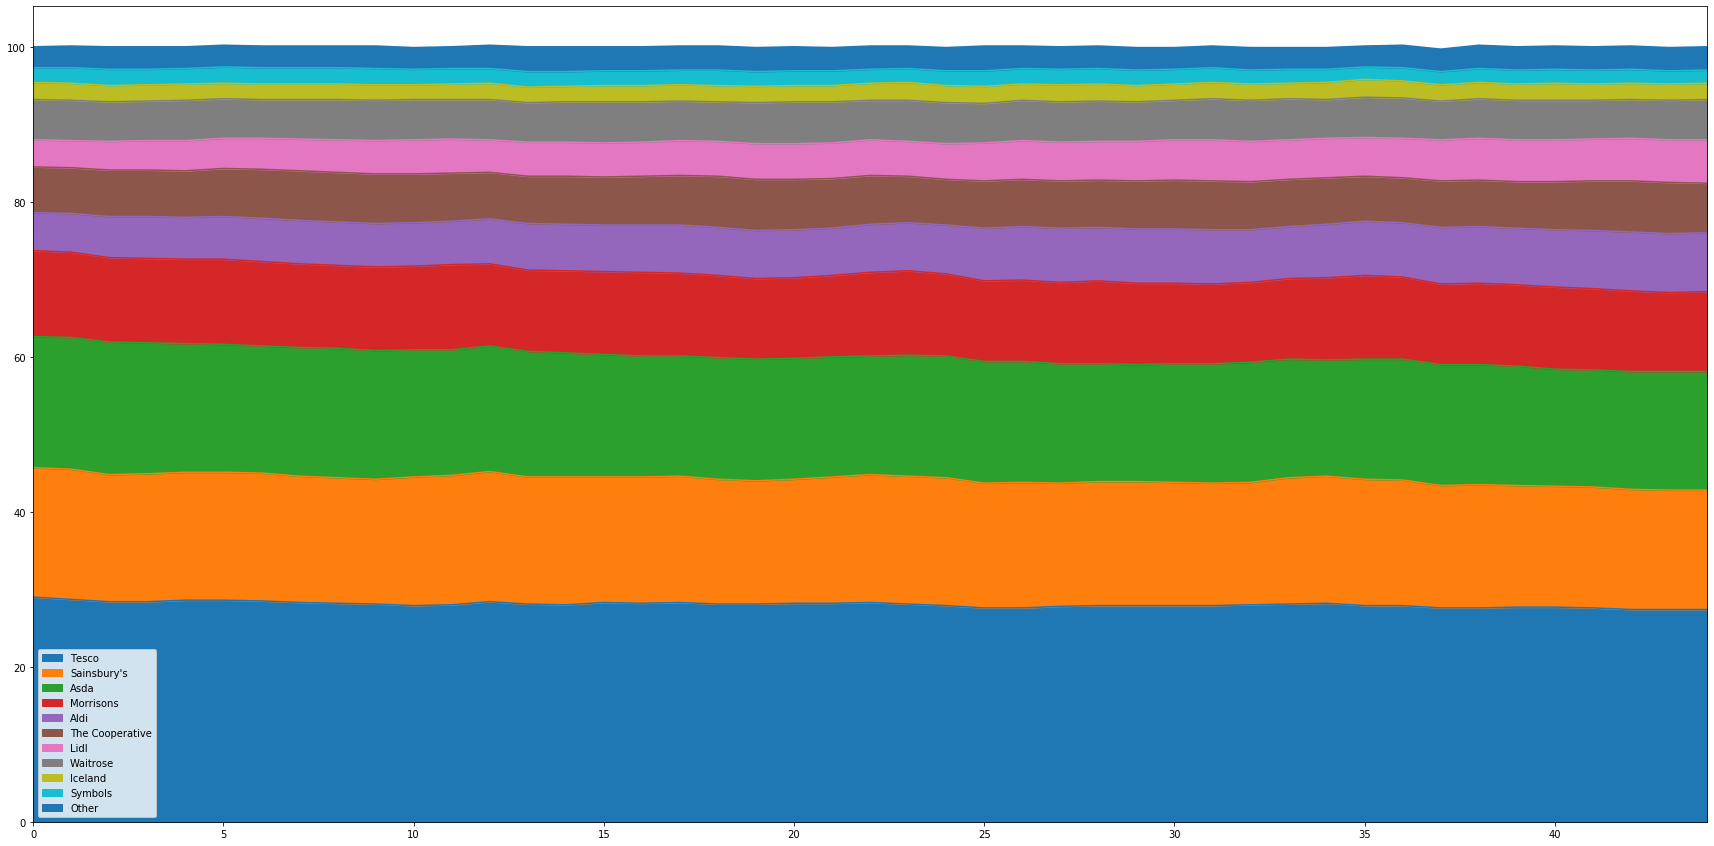

In [4]:
glv10df.plot.area(stacked=True, figsize=(30,15));

In [5]:
#Grocery Marketshare Predictive model

In [6]:
#glv10df.set_index('time', inplace=True) 


In [7]:
series = pd.read_csv(r'D:\\retail\glvmodel10.csv')

     time  Tesco  Sainsbury's  Asda  Morrisons  Aldi  The Cooperative  Lidl  \
0  Jan-15   29.0         16.7  16.9       11.1   4.9              5.9   3.5   
1  Feb-15   28.7         16.8  17.0       11.0   5.0              5.9   3.5   
2  Mar-15   28.4         16.4  17.1       10.9   5.3              6.0   3.7   
3  Apr-15   28.4         16.5  16.9       10.9   5.4              6.0   3.8   
4  May-15   28.6         16.5  16.6       10.9   5.4              6.0   3.9   

   Waitrose  Iceland  Symbols  Other  
0       5.2      2.2      1.9    2.7  
1       5.2      2.2      2.0    2.8  
2       5.1      2.1      2.1    2.9  
3       5.1      2.1      2.0    2.9  
4       5.2      2.1      2.0    2.8  


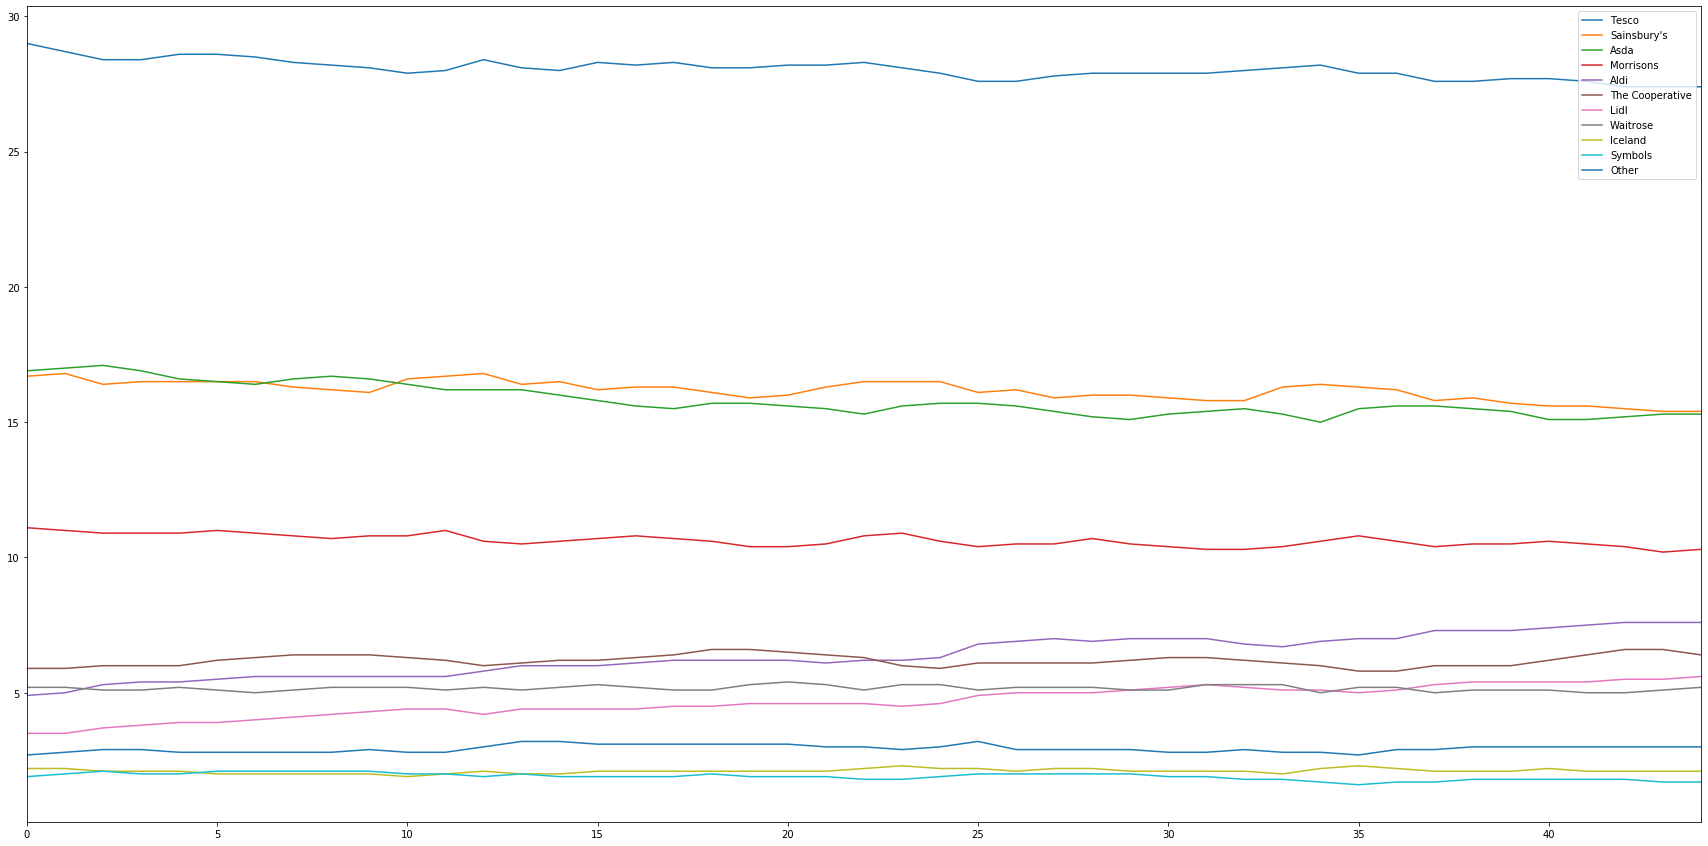

In [8]:
print(series.head())
series.plot(figsize=(30,15))

In [9]:
glv10adf = pd.read_csv(r'D:\\retail\glvmodel10a.csv')

In [10]:
#Parse strings to datetime type
glv10adf['time'] = pd.to_datetime(glv10adf['time']).dt.strftime('%d-%m%-Y%') #convert from string to datetime
glv10adf = glv10adf.set_index(['time'])
glv10adf.head(5)

Tesco  Sainsburys  Asda  Morrisons  Aldi  \
time                                                            
2015-01-01 00:00:00   29.0        16.7  16.9       11.1   4.9   
2015-01-02 00:00:00   28.7        16.8  17.0       11.0   5.0   
2015-01-03 00:00:00   28.4        16.4  17.1       10.9   5.3   
2015-01-04 00:00:00   28.4        16.5  16.9       10.9   5.4   
2015-01-05 00:00:00   28.6        16.5  16.6       10.9   5.4   

                     The Cooperative  Lidl  Waitrose  Iceland  Symbols  Other  
time                                                                           
2015-01-01 00:00:00              5.9   3.5       5.2      2.2      1.9    2.7  
2015-01-02 00:00:00              5.9   3.5       5.2      2.2      2.0    2.8  
2015-01-03 00:00:00              6.0   3.7       5.1      2.1      2.1    2.9  
2015-01-04 00:00:00              6.0   3.8       5.1      2.1      2.0    2.9  
2015-01-05 00:00:00              6.0   3.9       5.2      2.1      2.0    2.8

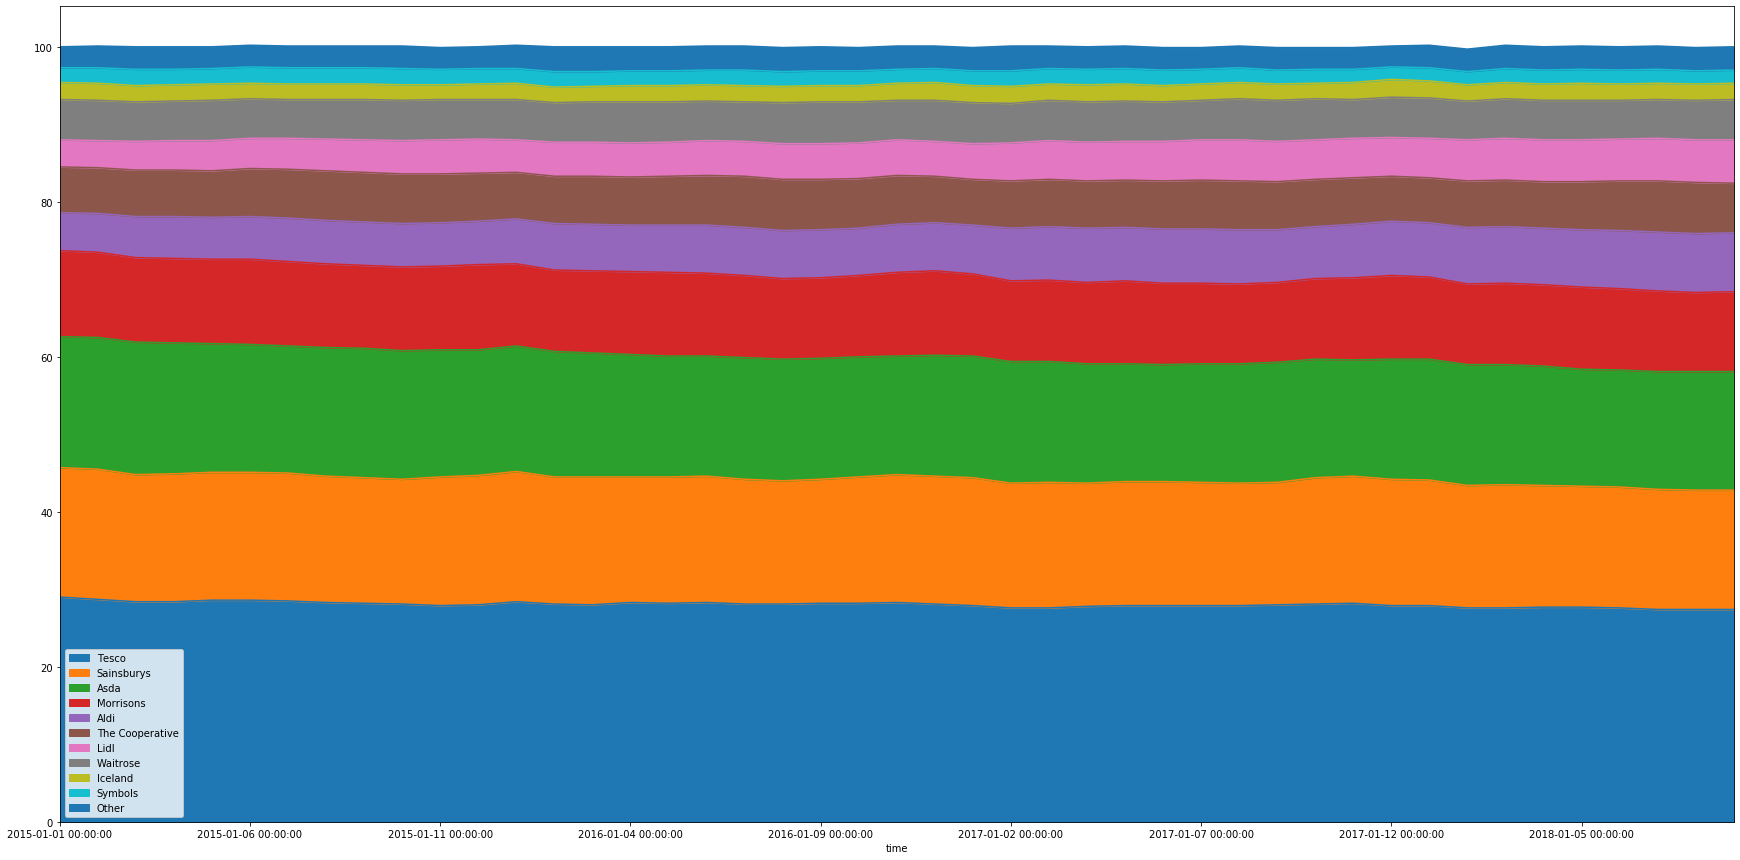

In [11]:
glv10adf.plot.area(stacked=True, figsize=(30,15));

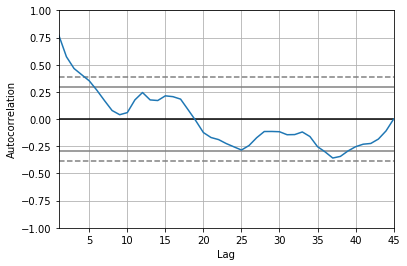

In [12]:
tescoseries = glv10adf['Tesco']
autocorrelation_plot(tescoseries)

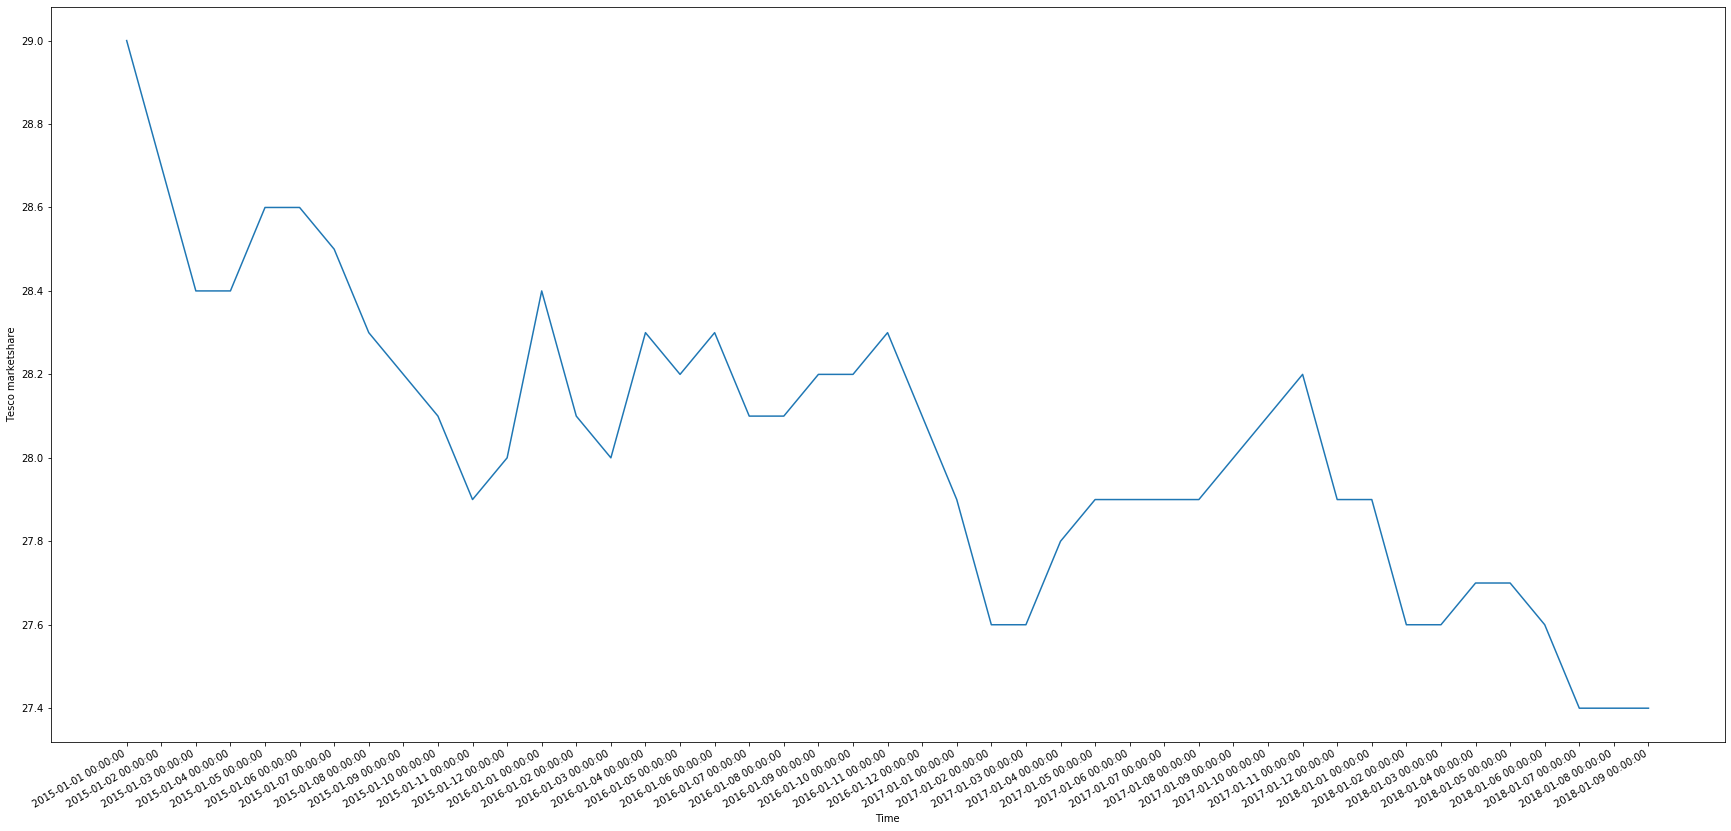

In [13]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Tesco marketshare')
fig.autofmt_xdate()
plt.plot(tescoseries) 

In [14]:
#Determine rolling statistics
rolmean = tescoseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = tescoseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    28.391667
2016-01-01 00:00:00    28.341667
2016-01-02 00:00:00    28.291667
2016-01-03 00:00:00    28.258333
2016-01-04 00:00:00    28.250000
2016-01-05 00:00:00    28.216667
2016-01-06 00:00:00    28.191667
2016-01-07 00:00:00    28.158333
2016-01-08 00:00:00    28.141667
2016-01-09 00:00:00    28.141667
2016-01-10 00:00:00    28.150000
2016-01-11 00:00:00    28.183333
2016-01-12 00:00:00    28.191667
2017-01-01 00:00:00    28.150000
2017-01-02 00:00:00    28.108333
2017-01-03 00:00:00    28.075000
2017-01-04 00:00:00    28.033333
2017-01-05 00:00:00    28.008333
2017-01-06 00:00:00    27.975000
2017-

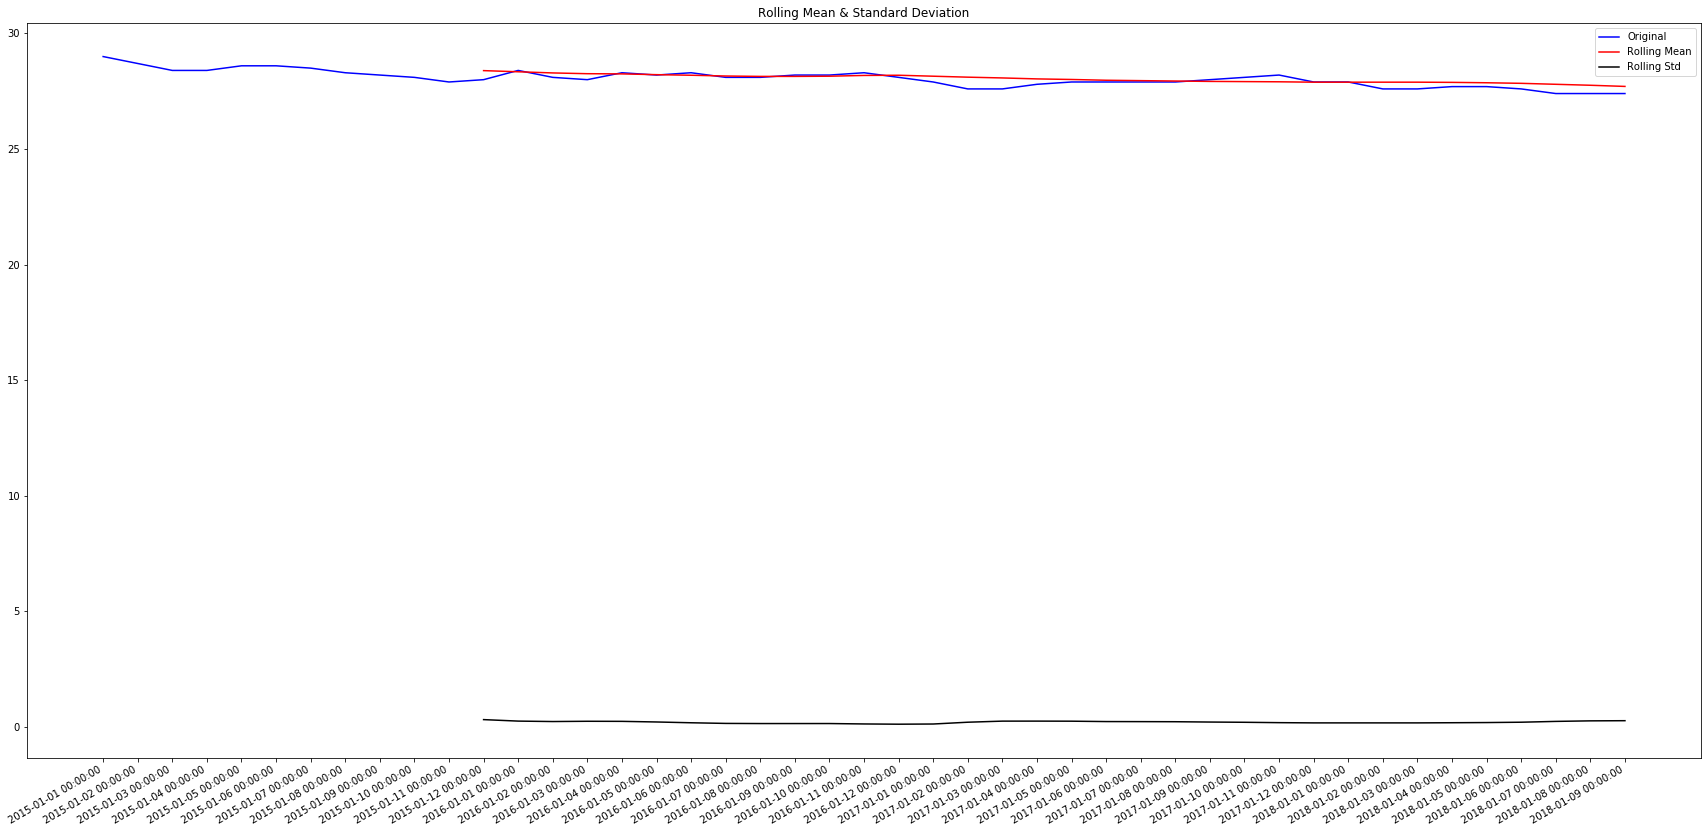

In [15]:
#Plot rolling statistics
fig= plt.figure(figsize=(30,15))
orig = plt.plot(tescoseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [16]:
tescoseries

time
2015-01-01 00:00:00    29.0
2015-01-02 00:00:00    28.7
2015-01-03 00:00:00    28.4
2015-01-04 00:00:00    28.4
2015-01-05 00:00:00    28.6
2015-01-06 00:00:00    28.6
2015-01-07 00:00:00    28.5
2015-01-08 00:00:00    28.3
2015-01-09 00:00:00    28.2
2015-01-10 00:00:00    28.1
2015-01-11 00:00:00    27.9
2015-01-12 00:00:00    28.0
2016-01-01 00:00:00    28.4
2016-01-02 00:00:00    28.1
2016-01-03 00:00:00    28.0
2016-01-04 00:00:00    28.3
2016-01-05 00:00:00    28.2
2016-01-06 00:00:00    28.3
2016-01-07 00:00:00    28.1
2016-01-08 00:00:00    28.1
2016-01-09 00:00:00    28.2
2016-01-10 00:00:00    28.2
2016-01-11 00:00:00    28.3
2016-01-12 00:00:00    28.1
2017-01-01 00:00:00    27.9
2017-01-02 00:00:00    27.6
2017-01-03 00:00:00    27.6
2017-01-04 00:00:00    27.8
2017-01-05 00:00:00    27.9
2017-01-06 00:00:00    27.9
2017-01-07 00:00:00    27.9
2017-01-08 00:00:00    27.9
2017-01-09 00:00:00    28.0
2017-01-10 00:00:00    28.1
2017-01-11 00:00:00    28.2
2017-01-12 00:0

In [17]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=tescoseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -2.353429
p-value                         0.155314
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Tesco   No. Observations:                   44
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  19.552
Method:                       css-mle   S.D. of innovations              0.154
Date:                Wed, 31 Jul 2019   AIC                            -25.104
Time:                        15:32:43   BIC                            -12.615
Sample:                             1   HQIC                           -20.472
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0321      0.015     -2.133      0.039      -0.062      -0.003
ar.L1.D.Tesco    -0.0068      0.154     -0.044      0.965      -0.308       0.294
ar.L2.D.Tesco    -0.2646      0.152     

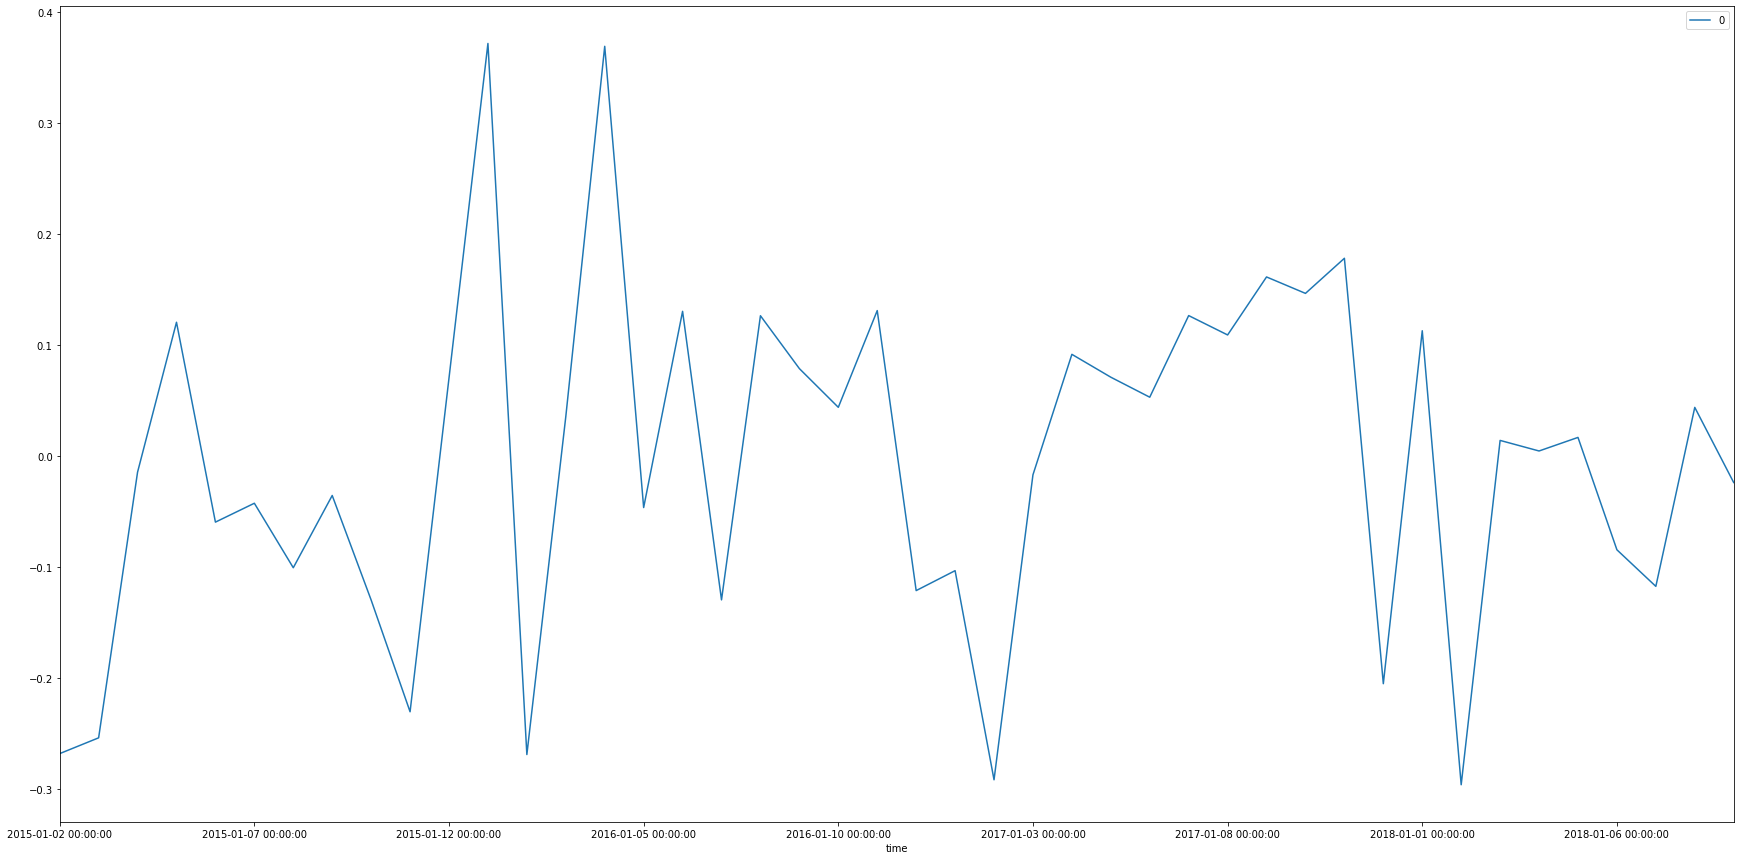

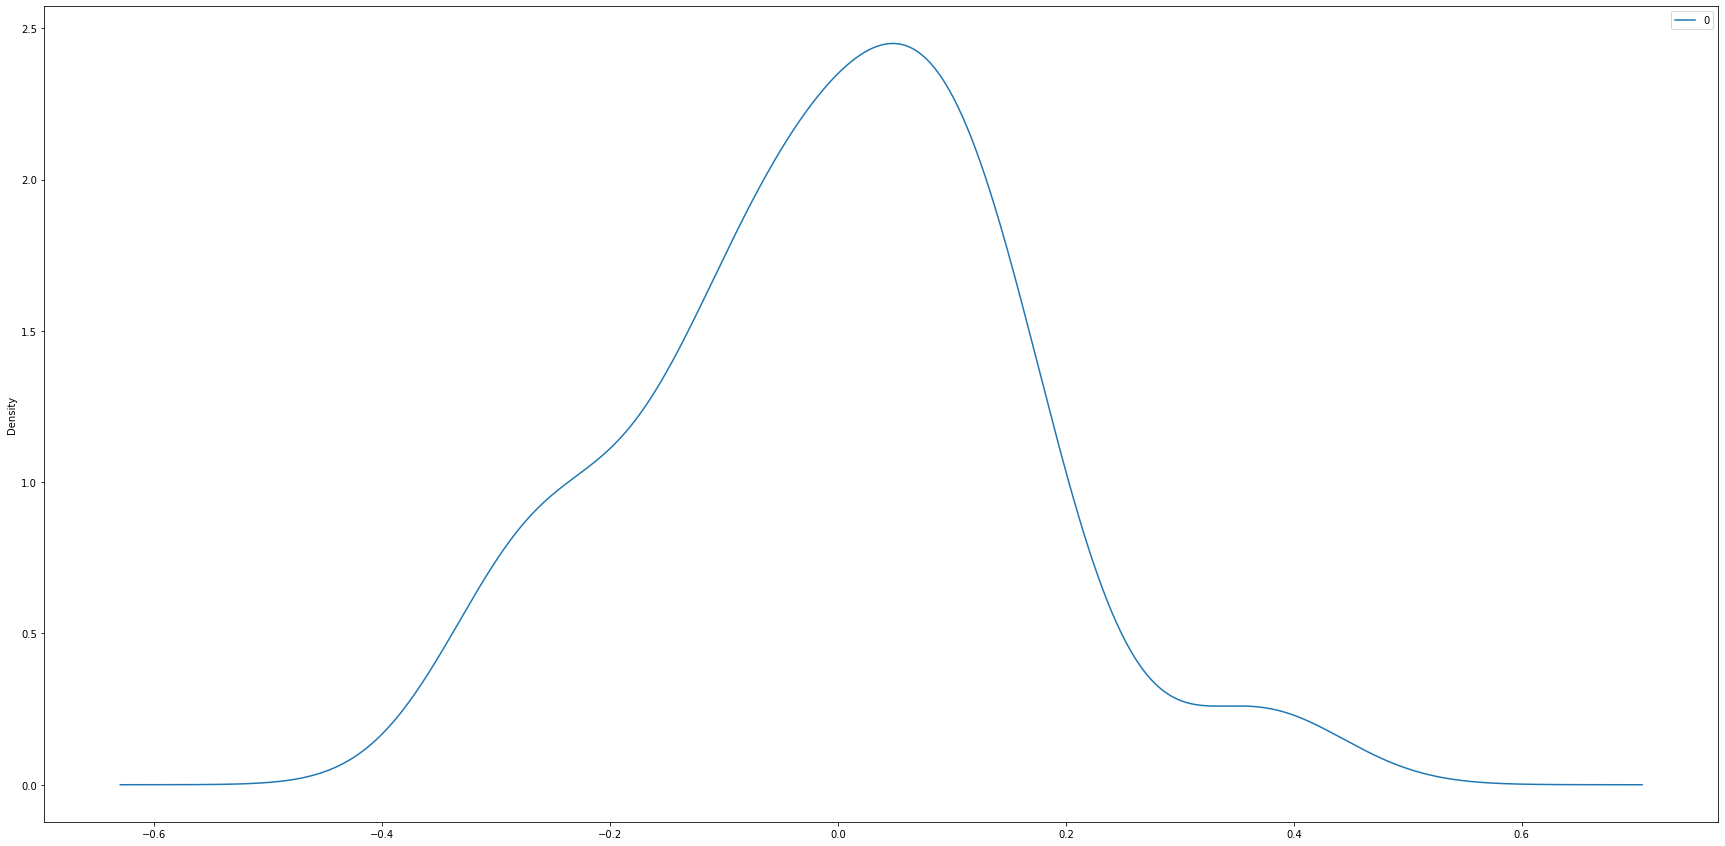

In [18]:
#ARIMA fit Tesco marketshare
model = ARIMA(tescoseries, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())    
    
    
    
    
    
    

C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\David\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR model


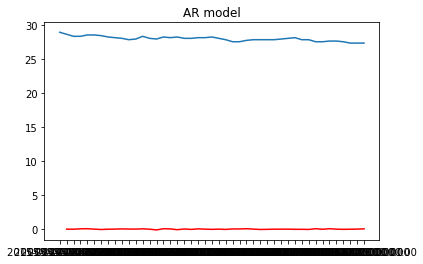

In [19]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(tescoseries, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(tescoseries)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR model')
print('Plotting AR model')

In [20]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [21]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=tescoseries
X.index = indexdf

In [22]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [23]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [24]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 38.33800416835511
ARIMA: (0, 0, 1) 4.0037744983561225
ARIMA: (0, 1, 0) -29.54898825888489
ARIMA: (0, 1, 1) -27.753209906619162
ARIMA: (1, 0, 0) -24.40245363298537
ARIMA: (1, 0, 1) -23.41612431612664
ARIMA: (1, 1, 0) -27.668453061778848


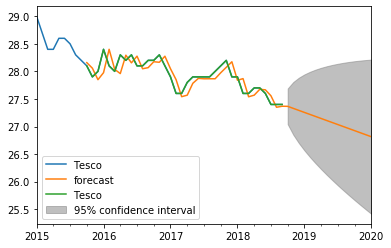

                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0368      0.027     -1.362      0.181      -0.090       0.016
ma.L1.D.Tesco     0.0881      0.189      0.466      0.644      -0.283       0.459


In [25]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(tescoseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

In [26]:
#Validation data
kandardata = pd.read_csv(r'D:\neatwriteup\data\kandar2019.csv')
kandardata['time'] = pd.to_datetime(kandardata['time']).dt.strftime('%d-%m%-Y%') #convert from string to datetime
kandardata = kandardata.set_index(['time'])
kandardata.columns = kandardata.columns.values.astype(str)
indexdf1 = pd.date_range(start='2018-10-1', periods=11, freq='M') 
indexdf1=indexdf1.to_period()
tesco2019=kandardata['tesco']
sainsburys2019=kandardata['sainsburys']
asda2019=kandardata['asda']
morrisons2019=kandardata['morrisons']
coop2019=kandardata['coop']
aldi2019=kandardata['aldi']
lidl2019=kandardata['lidl']
waitrose2019=kandardata['waitrose']
iceland2019=kandardata['iceland']
tesco2019.index = indexdf1
sainsburys2019.index = indexdf1
asda2019.index = indexdf1
morrisons2019.index = indexdf1
aldi2019.index = indexdf1
coop2019.index = indexdf1
lidl2019.index = indexdf1
waitrose2019.index = indexdf1
iceland2019.index = indexdf1






kandardata.head()

tesco  sainsburys  asda  morrisons  aldi  coop  lidl  \
time                                                                        
2018-07-10 00:00:00   27.3        15.4  15.3       10.3   7.6   6.4   5.6   
2018-04-11 00:00:00   27.5        15.7  15.3       10.3   7.6   6.3   5.5   
2018-02-12 00:00:00   27.6        16.0  15.0       10.5   7.6   6.1   5.6   
2018-12-30 00:00:00   27.8        16.1  15.2       10.6   7.4   5.9   5.3   
2019-01-27 00:00:00   27.7        15.9  15.3       10.6   7.5   5.9   5.3   

                     waitrose  iceland  
time                                    
2018-07-10 00:00:00       5.2      2.1  
2018-04-11 00:00:00       5.1      2.1  
2018-02-12 00:00:00       4.9      2.2  
2018-12-30 00:00:00       5.0      2.2  
2019-01-27 00:00:00       5.1      2.3

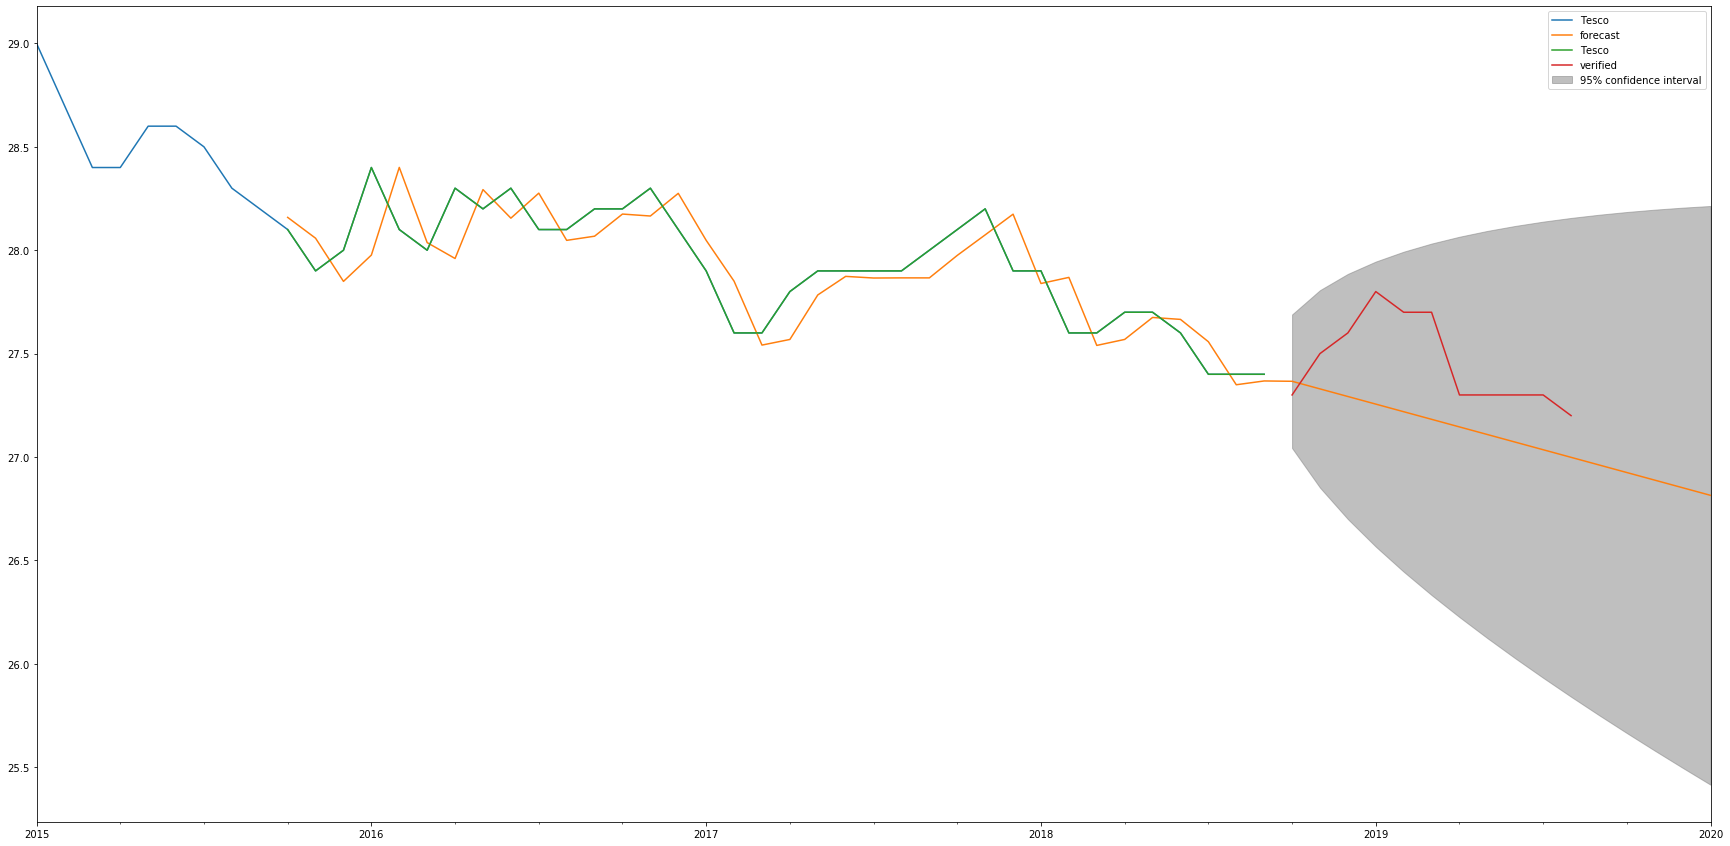

In [27]:
X=tescoseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(tesco2019, label='verified')
plt.legend()
plt.show()

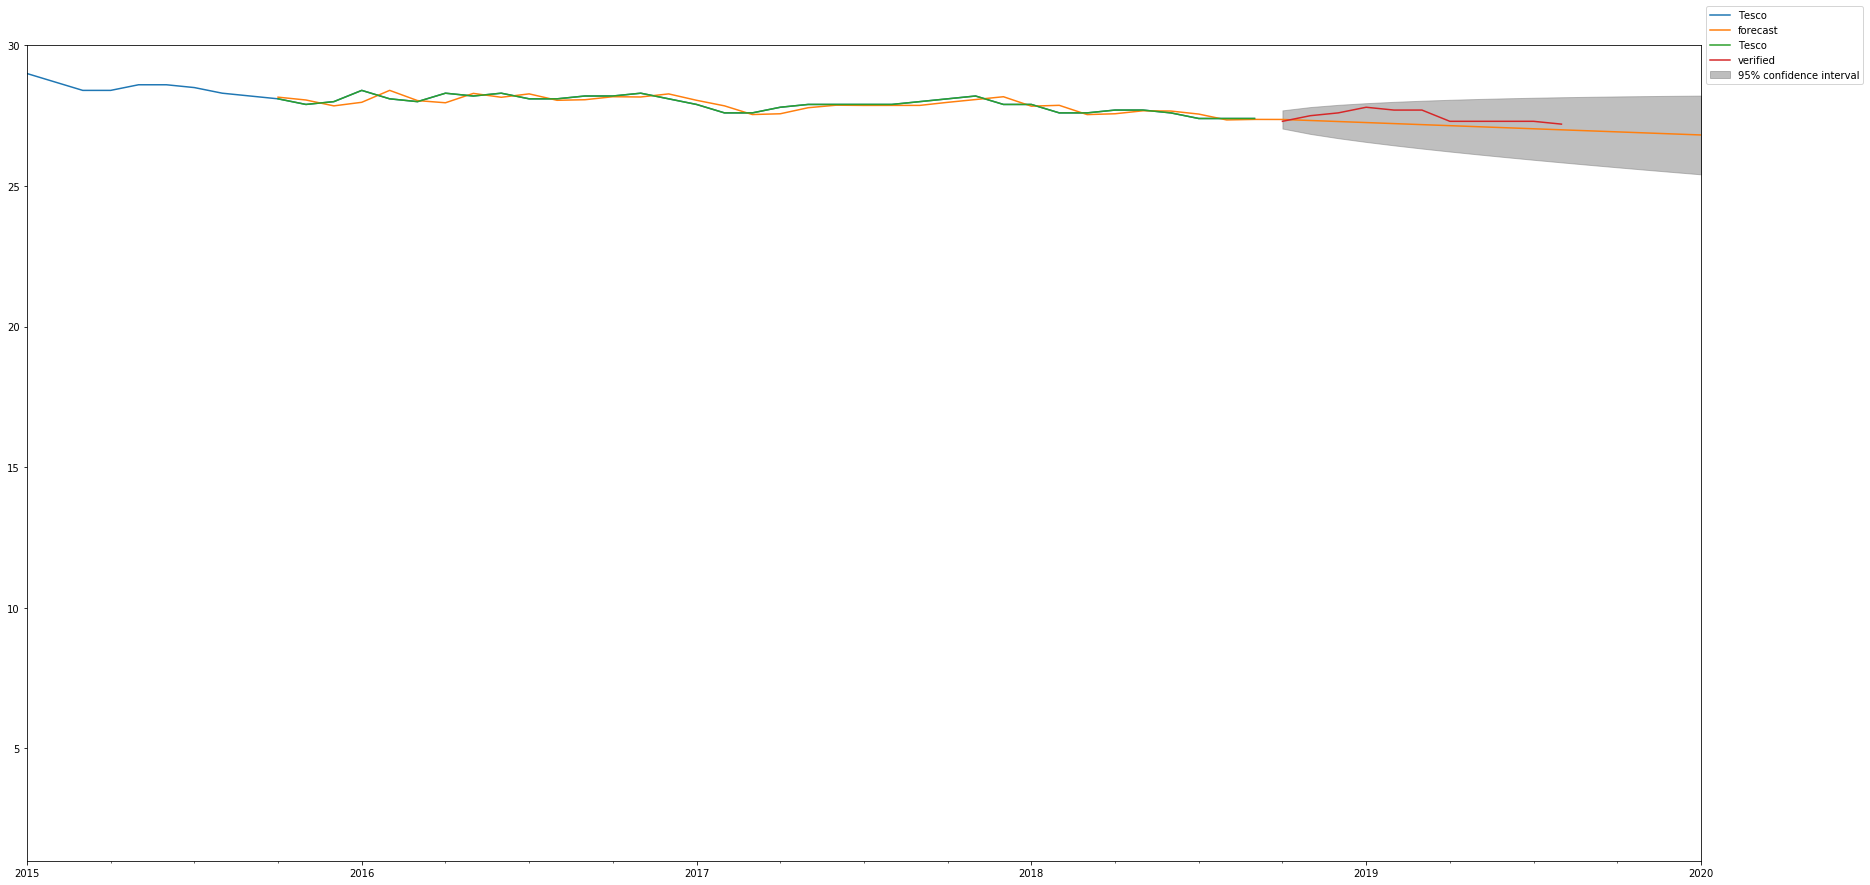

In [28]:
X=tescoseries

X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])


ax = X.loc['2015-1-1':].plot(ax=ax)

fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(tesco2019, label='verified')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 1.0))

#plt.show()






In [29]:
print(res)

In [30]:
X = tescoseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=27.876670, expected=27.900000
predicted=27.864624, expected=27.900000
predicted=27.867962, expected=27.900000
predicted=27.868677, expected=28.000000
predicted=27.990247, expected=28.100000
predicted=28.092612, expected=28.200000
predicted=28.197826, expected=27.900000
predicted=27.819057, expected=27.900000
predicted=27.877031, expected=27.600000
predicted=27.537906, expected=27.600000
predicted=27.566367, expected=27.700000
predicted=27.676439, expected=27.700000
predicted=27.668876, expected=27.600000
predicted=27.559834, expected=27.400000
predicted=27.346131, expected=27.400000
predicted=27.366772, expected=27.400000
Test MSE: 0.017


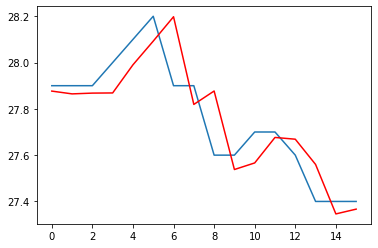

In [31]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

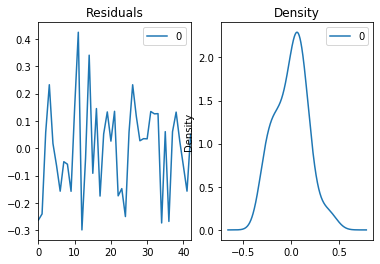

In [32]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

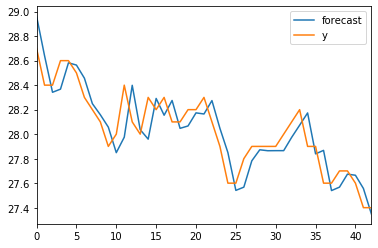

In [33]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

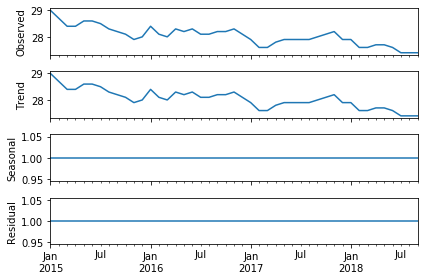

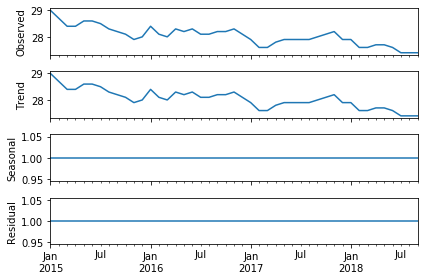

In [34]:
result = seasonal_decompose(tescoseries, model='multiplicative', freq=1)

result.plot()



In [35]:
####Auto Arima Forecast in Python###

import pmdarima as pm


model = pm.auto_arima(tescoseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=-29.549, BIC=-25.981, Fit time=0.008 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-27.668, BIC=-22.316, Fit time=0.040 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-27.753, BIC=-22.401, Fit time=0.029 seconds
Total fit time: 0.108 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   44
Model:                 ARIMA(0, 1, 0)   Log Likelihood                  16.774
Method:                           css   S.D. of innovations              0.165
Date:                Wed, 31 Jul 2019   AIC                            -29.549
Time:                        15:33:04   BIC                            -25.981
Sample:                             1   HQIC                           -28.226
                                                                              
                 coef    std err        

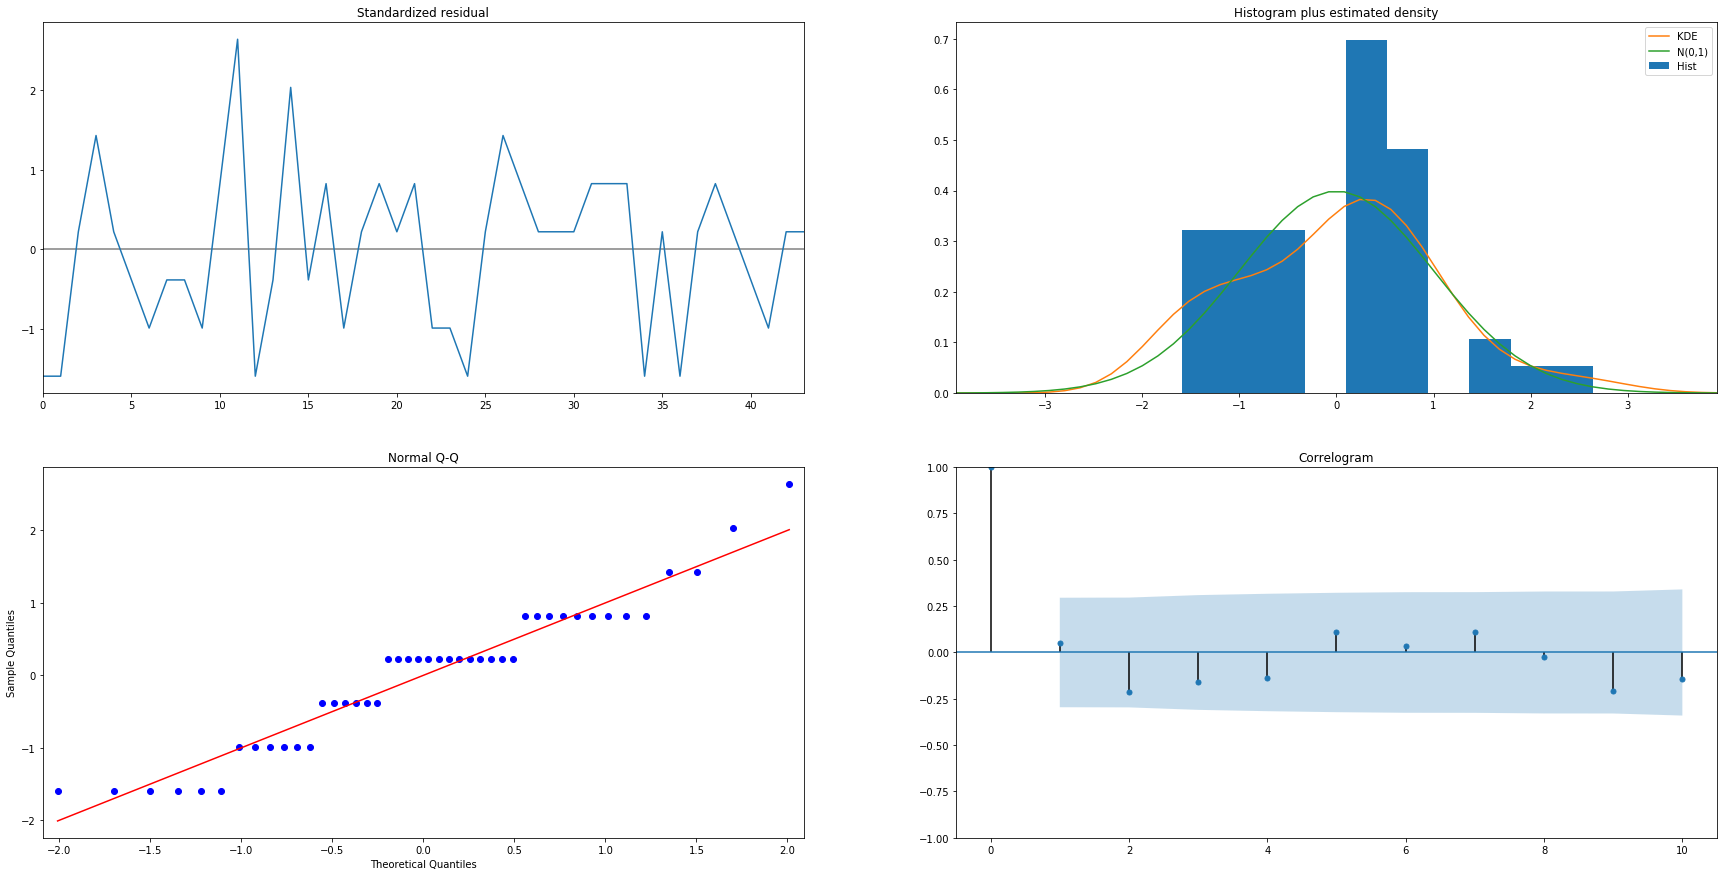

In [36]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

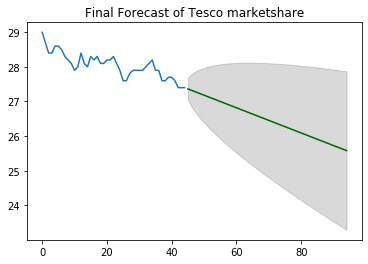

In [37]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Tesco marketshare")
plt.show()

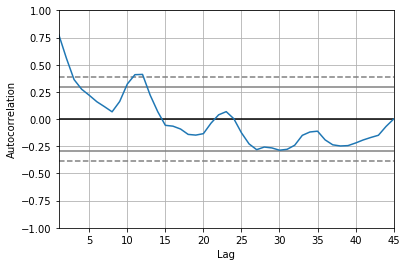

In [38]:
sainsburyseries = glv10adf['Sainsburys']
autocorrelation_plot(sainsburyseries)

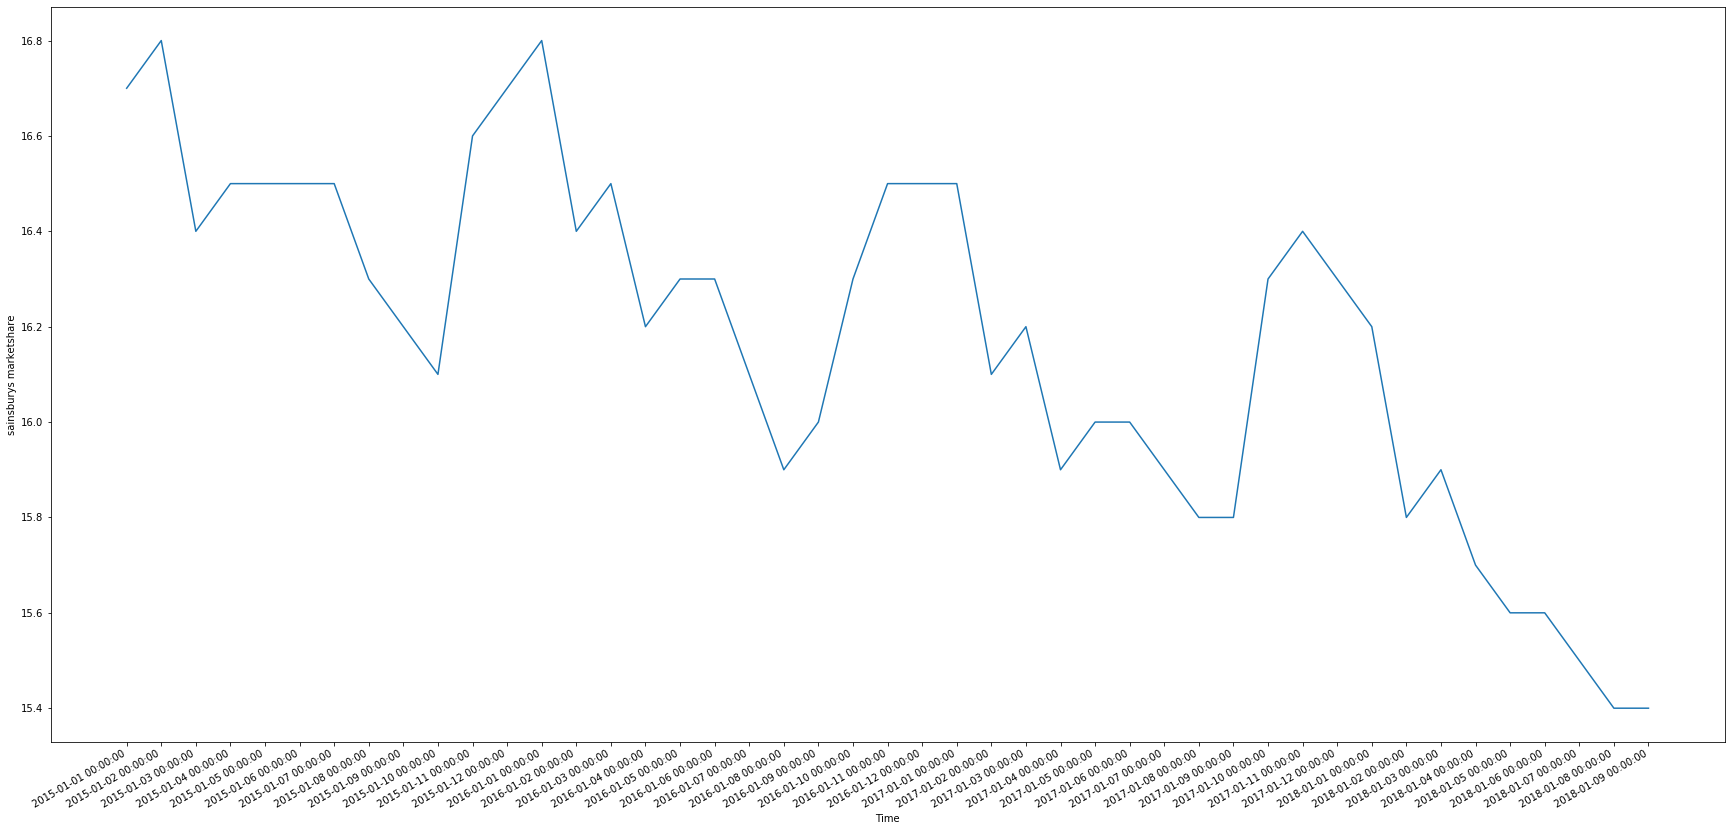

In [39]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('sainsburys marketshare')
fig.autofmt_xdate()
plt.plot(sainsburyseries) 

In [40]:
#Determine rolling statistics
rolmean = sainsburyseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = sainsburyseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    16.483333
2016-01-01 00:00:00    16.491667
2016-01-02 00:00:00    16.458333
2016-01-03 00:00:00    16.466667
2016-01-04 00:00:00    16.441667
2016-01-05 00:00:00    16.425000
2016-01-06 00:00:00    16.408333
2016-01-07 00:00:00    16.375000
2016-01-08 00:00:00    16.341667
2016-01-09 00:00:00    16.325000
2016-01-10 00:00:00    16.341667
2016-01-11 00:00:00    16.333333
2016-01-12 00:00:00    16.316667
2017-01-01 00:00:00    16.291667
2017-01-02 00:00:00    16.266667
2017-01-03 00:00:00    16.241667
2017-01-04 00:00:00    16.216667
2017-01-05 00:00:00    16.191667
2017-01-06 00:00:00    16.166667
2017-

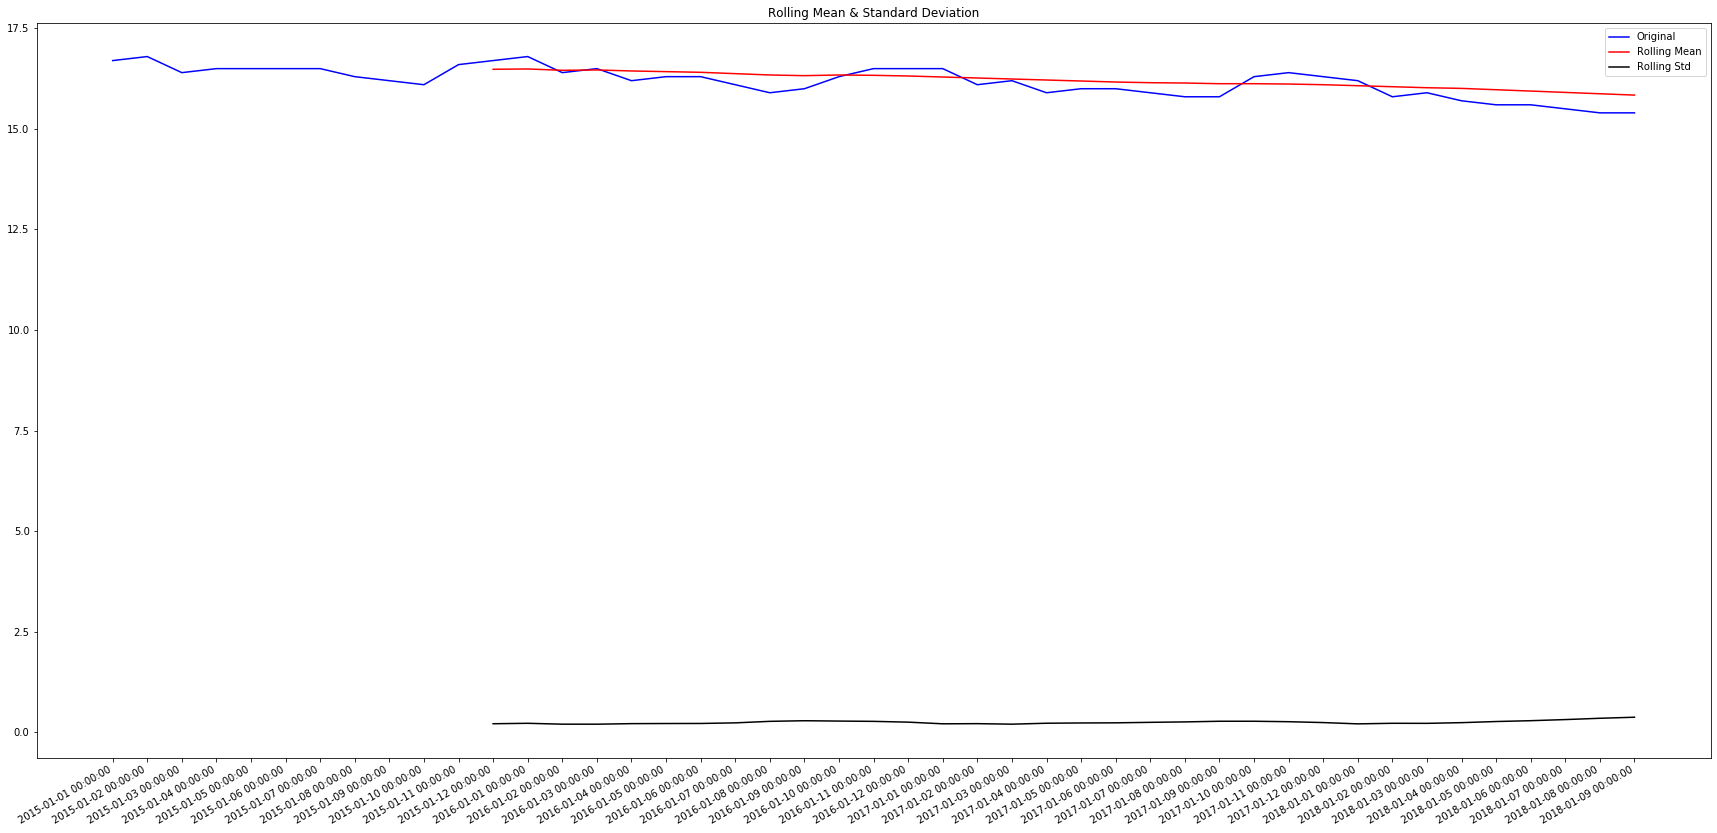

In [41]:
#Plot rolling statistics sainsburys
fig= plt.figure(figsize=(30,15))
orig = plt.plot(sainsburyseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [42]:
sainsburyseries

time
2015-01-01 00:00:00    16.7
2015-01-02 00:00:00    16.8
2015-01-03 00:00:00    16.4
2015-01-04 00:00:00    16.5
2015-01-05 00:00:00    16.5
2015-01-06 00:00:00    16.5
2015-01-07 00:00:00    16.5
2015-01-08 00:00:00    16.3
2015-01-09 00:00:00    16.2
2015-01-10 00:00:00    16.1
2015-01-11 00:00:00    16.6
2015-01-12 00:00:00    16.7
2016-01-01 00:00:00    16.8
2016-01-02 00:00:00    16.4
2016-01-03 00:00:00    16.5
2016-01-04 00:00:00    16.2
2016-01-05 00:00:00    16.3
2016-01-06 00:00:00    16.3
2016-01-07 00:00:00    16.1
2016-01-08 00:00:00    15.9
2016-01-09 00:00:00    16.0
2016-01-10 00:00:00    16.3
2016-01-11 00:00:00    16.5
2016-01-12 00:00:00    16.5
2017-01-01 00:00:00    16.5
2017-01-02 00:00:00    16.1
2017-01-03 00:00:00    16.2
2017-01-04 00:00:00    15.9
2017-01-05 00:00:00    16.0
2017-01-06 00:00:00    16.0
2017-01-07 00:00:00    15.9
2017-01-08 00:00:00    15.8
2017-01-09 00:00:00    15.8
2017-01-10 00:00:00    16.3
2017-01-11 00:00:00    16.4
2017-01-12 00:0

In [43]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=sainsburyseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                  1.440099
p-value                         0.997289
#Lags Used                     10.000000
Number of Observations Used    34.000000
Critical Value (1%)            -3.639224
Critical Value (5%)            -2.951230
Critical Value (10%)           -2.614447
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:           D.Sainsburys   No. Observations:                   44
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  12.663
Method:                       css-mle   S.D. of innovations              0.180
Date:                Wed, 31 Jul 2019   AIC                            -11.326
Time:                        15:33:11   BIC                              1.163
Sample:                             1   HQIC                            -6.695
                                                                              
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0288      0.019     -1.528      0.135      -0.066       0.008
ar.L1.D.Sainsburys    -0.1080      0.148     -0.728      0.471      -0.399       0.183
ar.L2.D.Sainsburys  

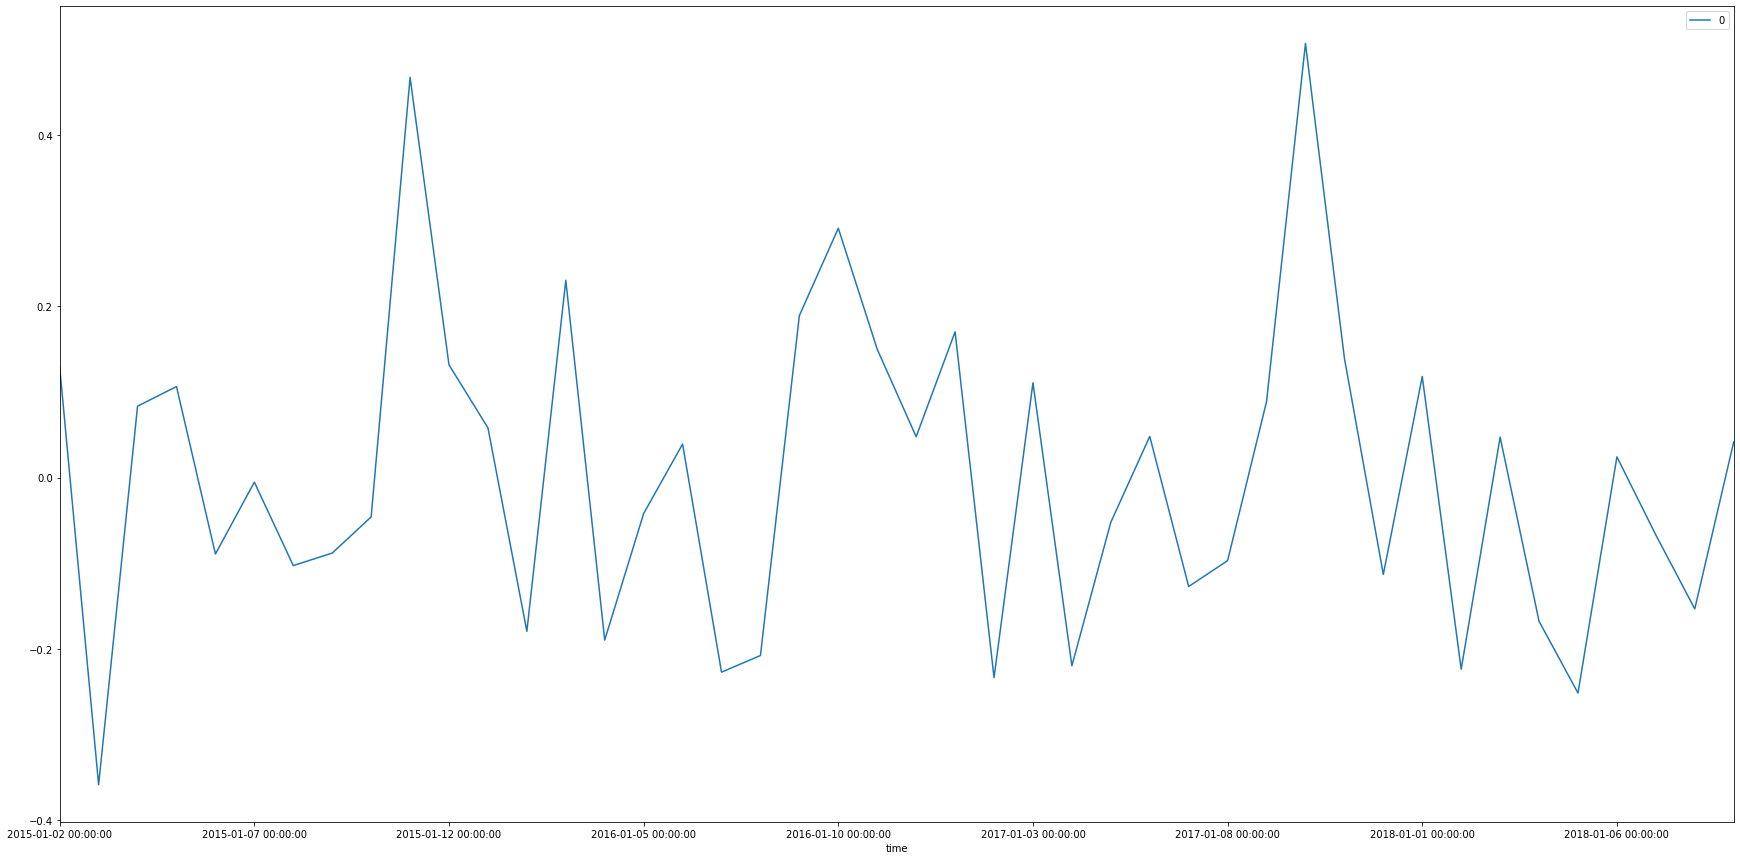

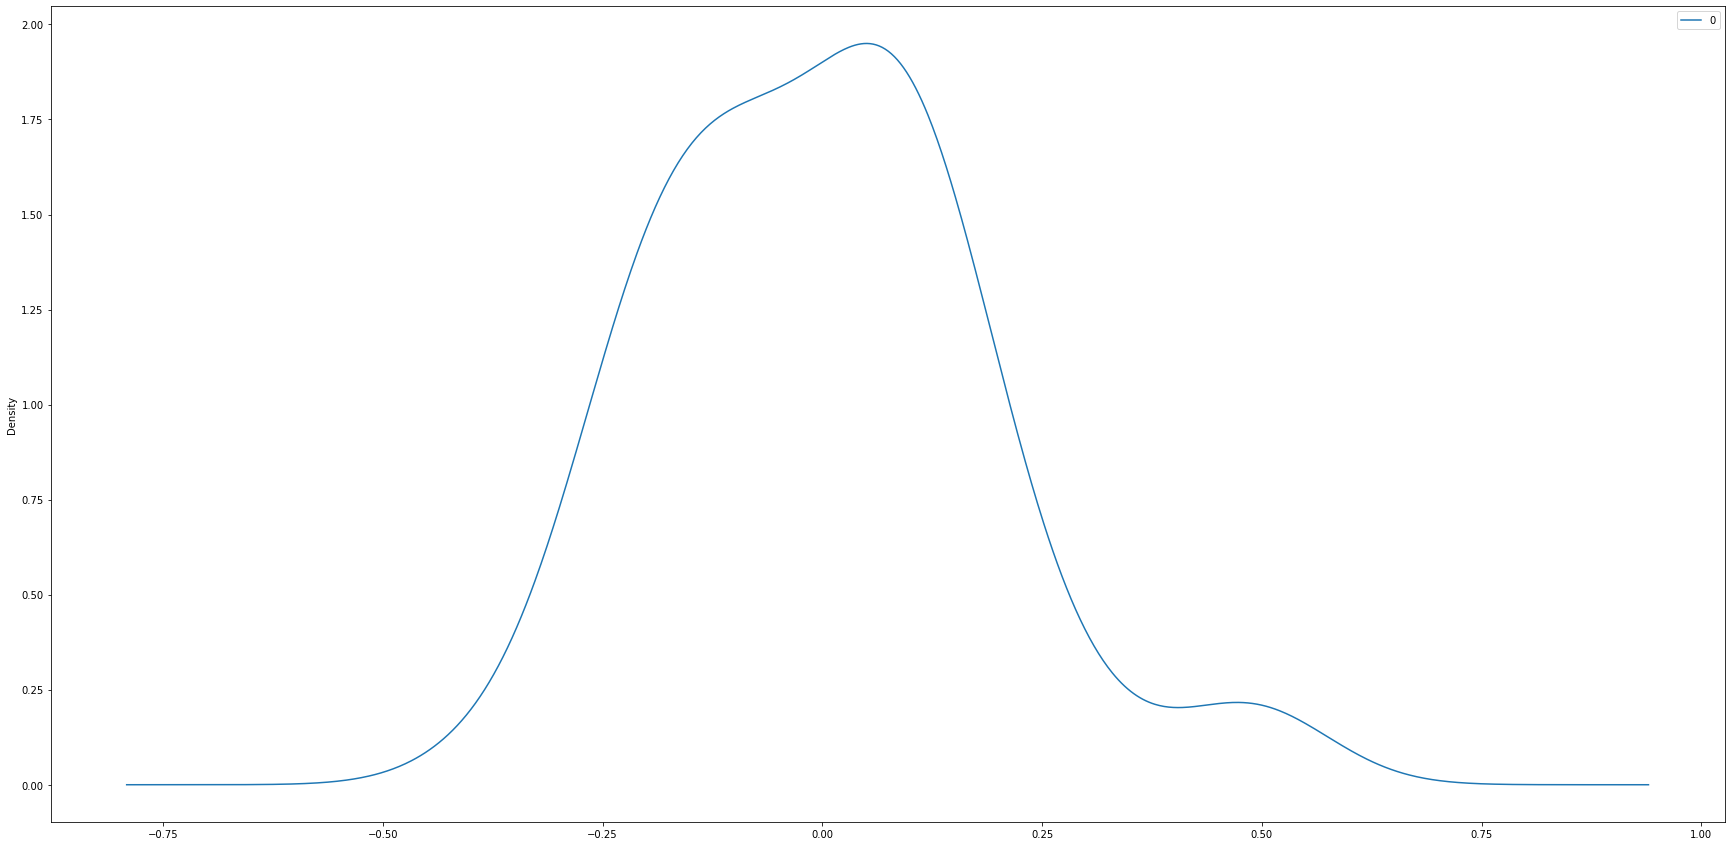

In [44]:
#ARIMA fit sainsburys marketshare
model = ARIMA(sainsburyseries, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())     

Plotting AR model


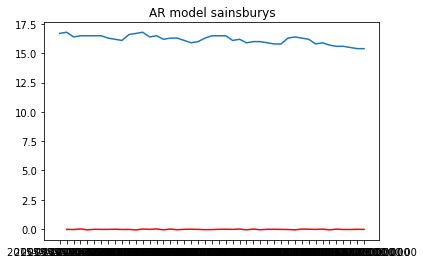

In [45]:
#AR Model
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(sainsburyseries, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(sainsburyseries)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR model sainsburys')
print('Plotting AR model')

In [46]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [47]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=sainsburyseries
X.index = indexdf

In [48]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [49]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [50]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 40.9069867905048
ARIMA: (0, 0, 1) 15.529515746729714
ARIMA: (0, 1, 0) -12.475122660629204
ARIMA: (0, 1, 1) -10.732716448559415
ARIMA: (1, 0, 0) -10.394703494228978
ARIMA: (1, 0, 1) -8.423810992485798
ARIMA: (1, 1, 0) -10.756182842664032
ARIMA: (1, 1, 1) -9.603489517576548


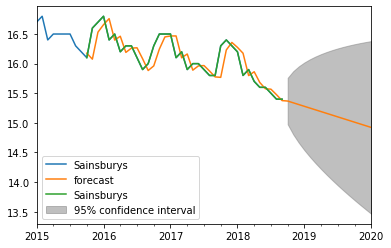

                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.0298      0.028     -1.064      0.293      -0.085       0.025
ma.L1.D.Sainsburys    -0.0746      0.150     -0.496      0.622      -0.369       0.220


In [51]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(sainsburyseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

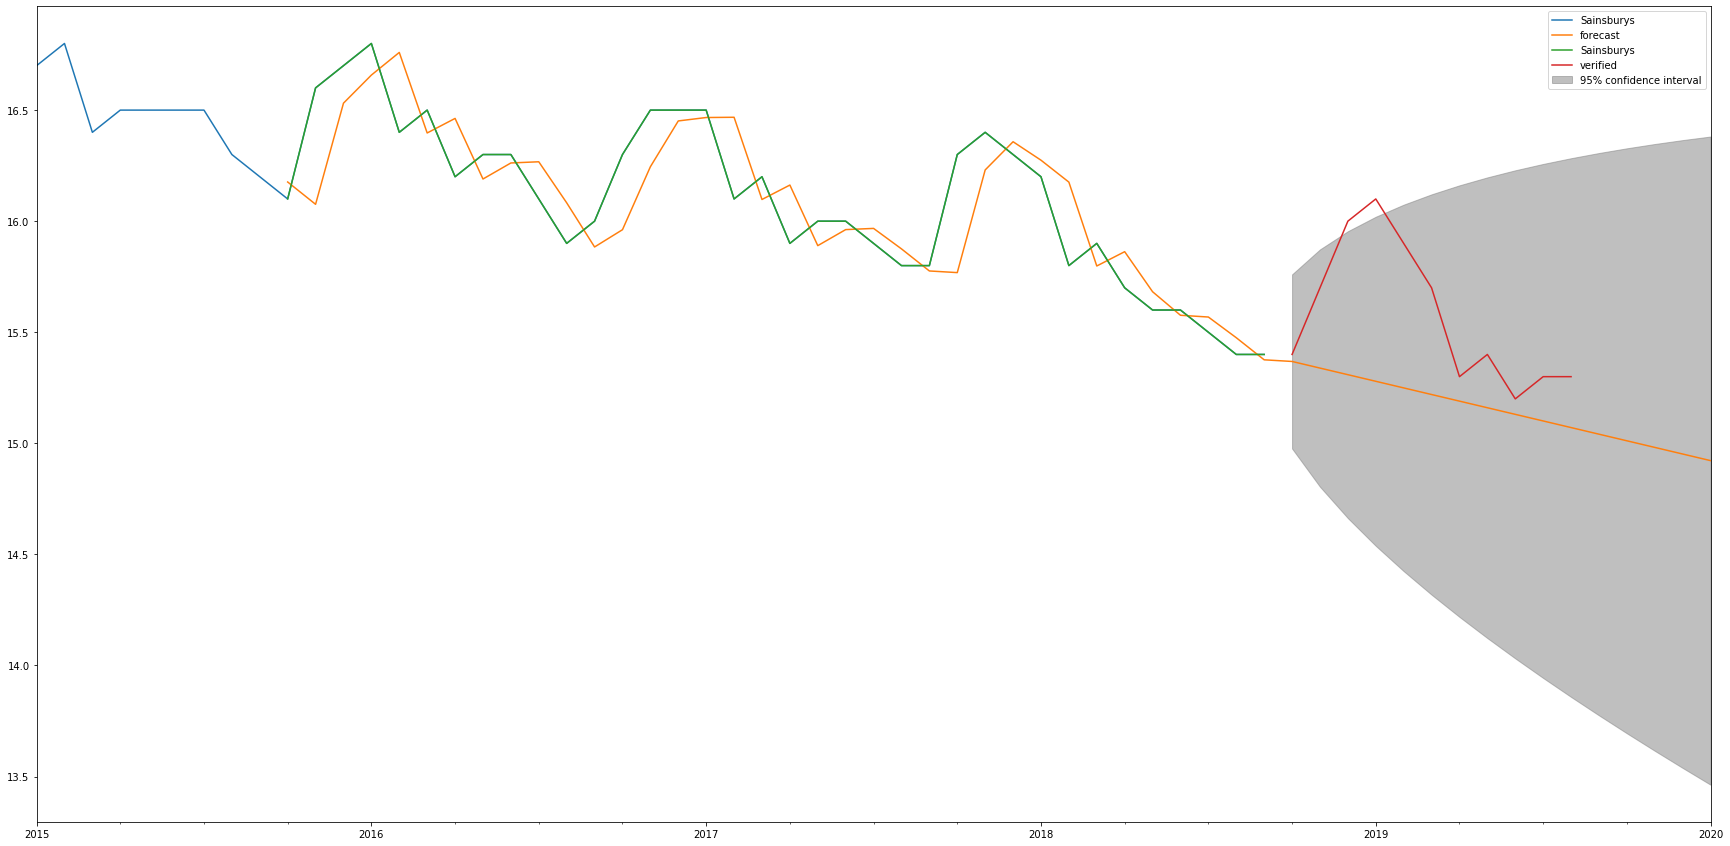

In [52]:
X=sainsburyseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(sainsburys2019, label='verified')
plt.legend()
plt.show()

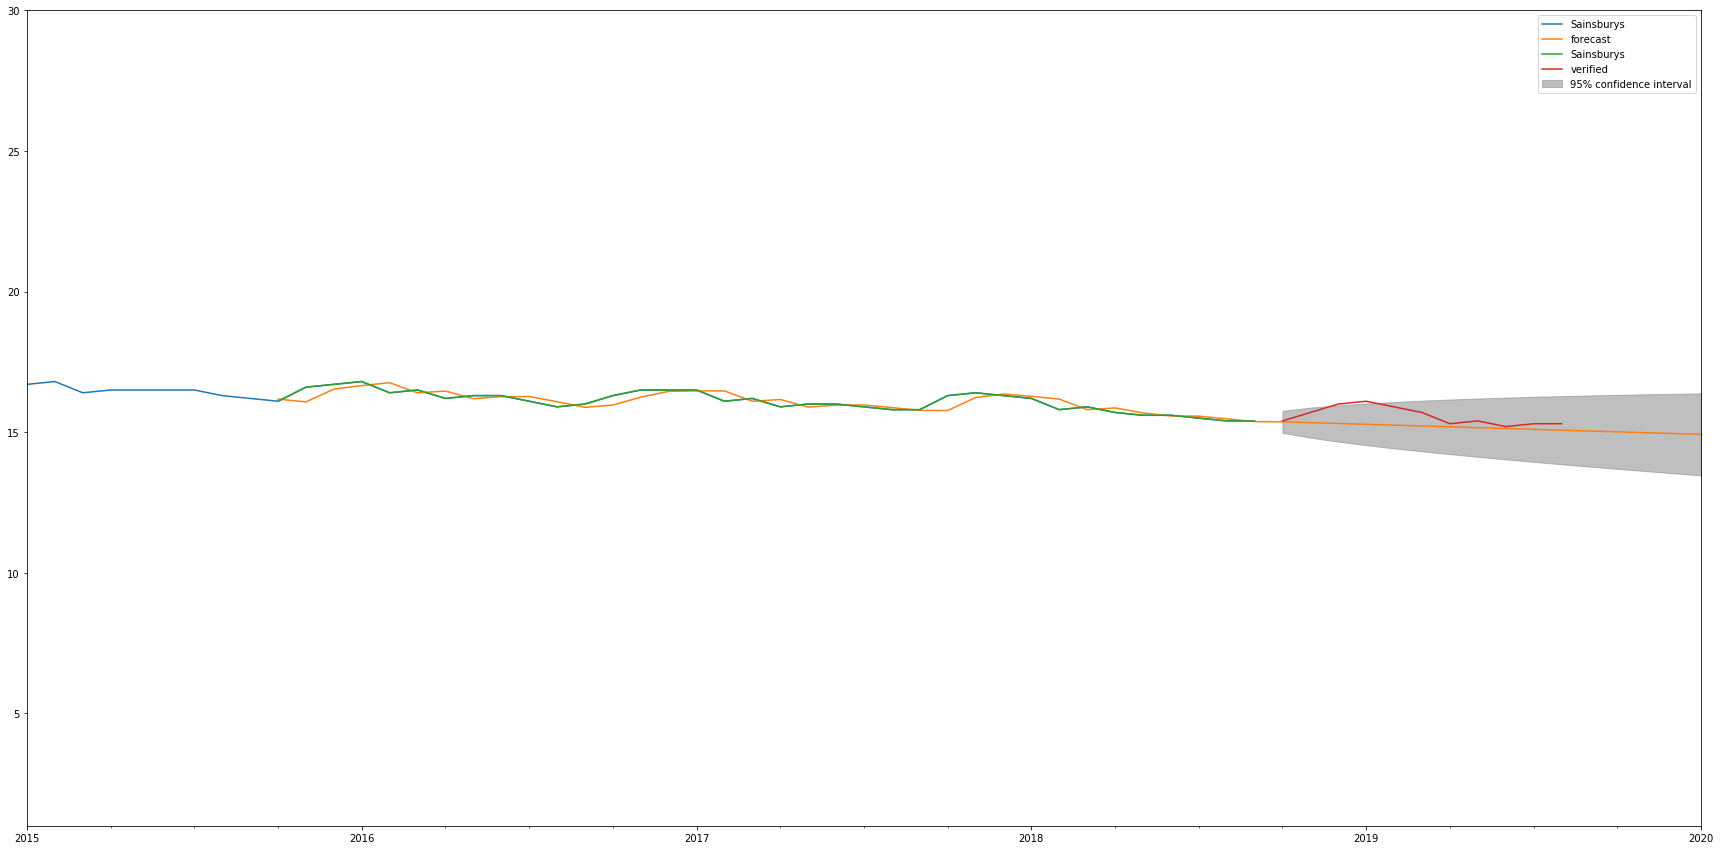

In [53]:

X=sainsburyseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(sainsburys2019, label='verified')
plt.legend()
plt.show()

In [54]:
print(res)

In [55]:
X = sainsburyseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=15.961475, expected=16.000000
predicted=15.970008, expected=15.900000
predicted=15.883164, expected=15.800000
predicted=15.782339, expected=15.800000
predicted=15.769018, expected=16.300000
predicted=16.213464, expected=16.400000
predicted=16.380535, expected=16.300000
predicted=16.294699, expected=16.200000
predicted=16.193148, expected=15.800000
predicted=15.795625, expected=15.900000
predicted=15.871568, expected=15.700000
predicted=15.688272, expected=15.600000
predicted=15.578780, expected=15.600000
predicted=15.571392, expected=15.500000
predicted=15.476687, expected=15.400000
predicted=15.375203, expected=15.400000
Test MSE: 0.035


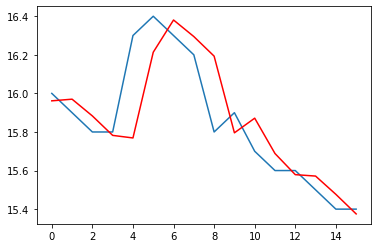

In [56]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

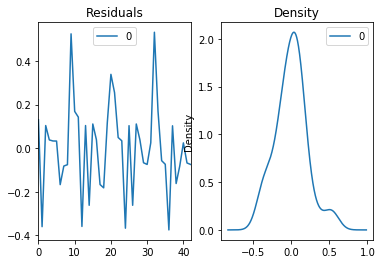

In [57]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

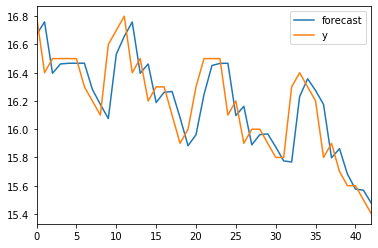

In [58]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

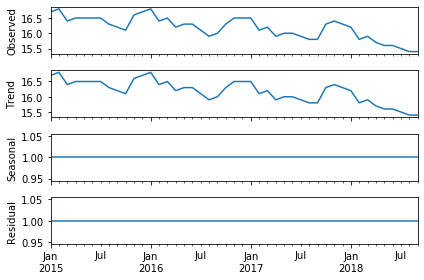

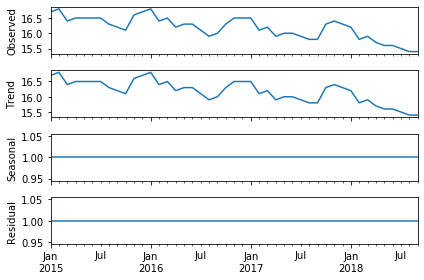

In [59]:
result = seasonal_decompose(sainsburyseries, model='multiplicative', freq=1)

result.plot()



In [60]:
####Auto Arima Forecast in Python for sainsbury###

import pmdarima as pm


model = pm.auto_arima(sainsburyseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=-9.603, BIC=-2.467, Fit time=0.163 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-12.475, BIC=-8.907, Fit time=0.017 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-10.756, BIC=-5.404, Fit time=0.053 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-10.733, BIC=-5.380, Fit time=0.025 seconds
Total fit time: 0.267 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   44
Model:                 ARIMA(0, 1, 0)   Log Likelihood                   8.238
Method:                           css   S.D. of innovations              0.201
Date:                Wed, 31 Jul 2019   AIC                            -12.475
Time:                        15:33:32   BIC                             -8.907
Sample:                             1   HQIC                           -11.152
                                                                              
                 coef    std err   

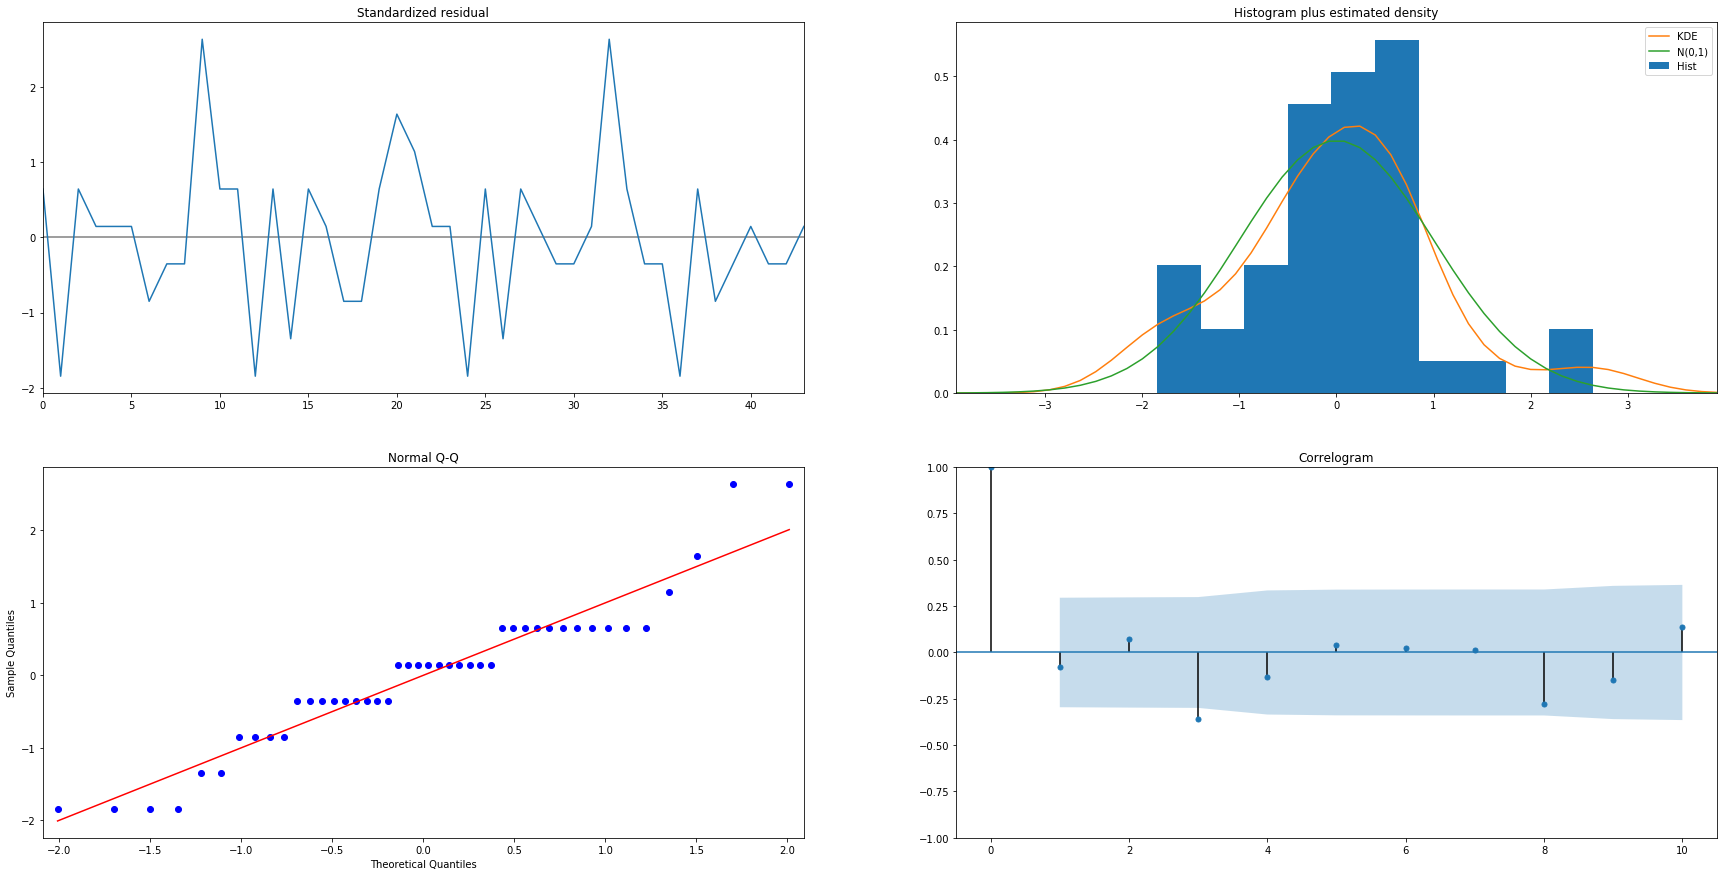

In [61]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

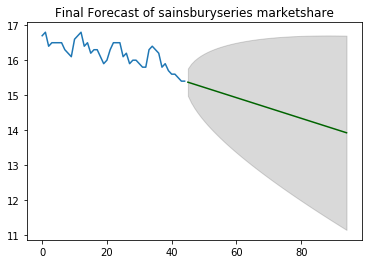

In [62]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of sainsburyseries marketshare")
plt.show()

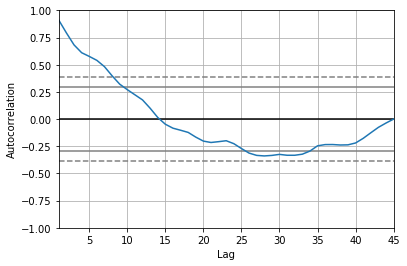

In [63]:
asdaseries = glv10adf['Asda']
autocorrelation_plot(asdaseries)

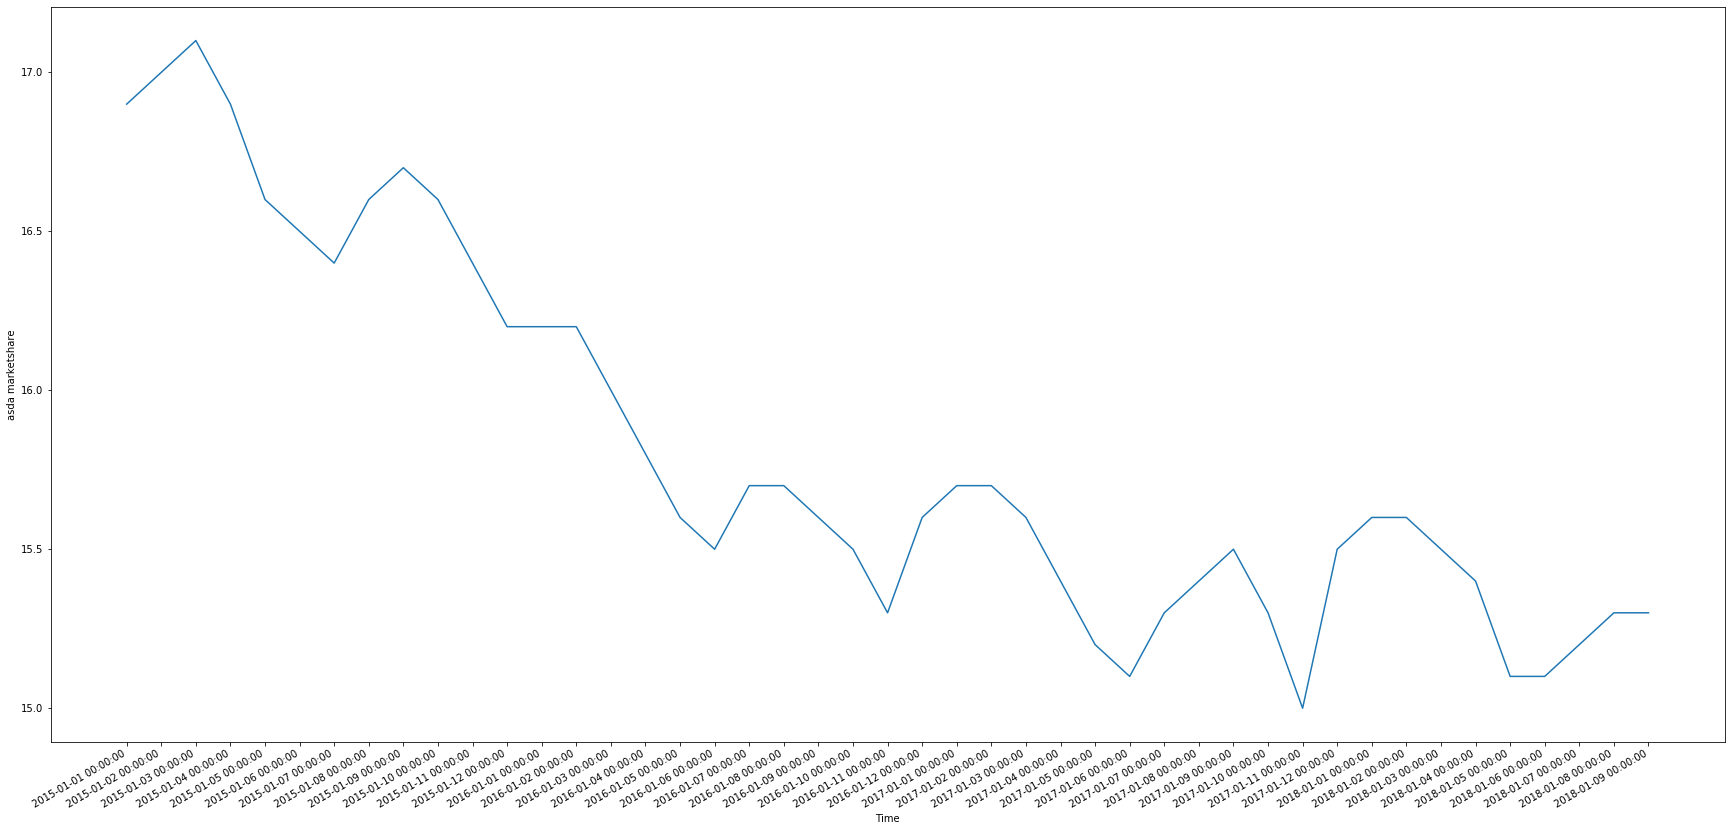

In [64]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('asda marketshare')
fig.autofmt_xdate()
plt.plot(asdaseries) 

In [65]:
#Determine rolling statistics
rolmean = asdaseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = asdaseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    16.658333
2016-01-01 00:00:00    16.600000
2016-01-02 00:00:00    16.533333
2016-01-03 00:00:00    16.441667
2016-01-04 00:00:00    16.350000
2016-01-05 00:00:00    16.266667
2016-01-06 00:00:00    16.183333
2016-01-07 00:00:00    16.125000
2016-01-08 00:00:00    16.050000
2016-01-09 00:00:00    15.958333
2016-01-10 00:00:00    15.866667
2016-01-11 00:00:00    15.775000
2016-01-12 00:00:00    15.725000
2017-01-01 00:00:00    15.683333
2017-01-02 00:00:00    15.641667
2017-01-03 00:00:00    15.608333
2017-01-04 00:00:00    15.575000
2017-01-05 00:00:00    15.541667
2017-01-06 00:00:00    15.508333
2017-

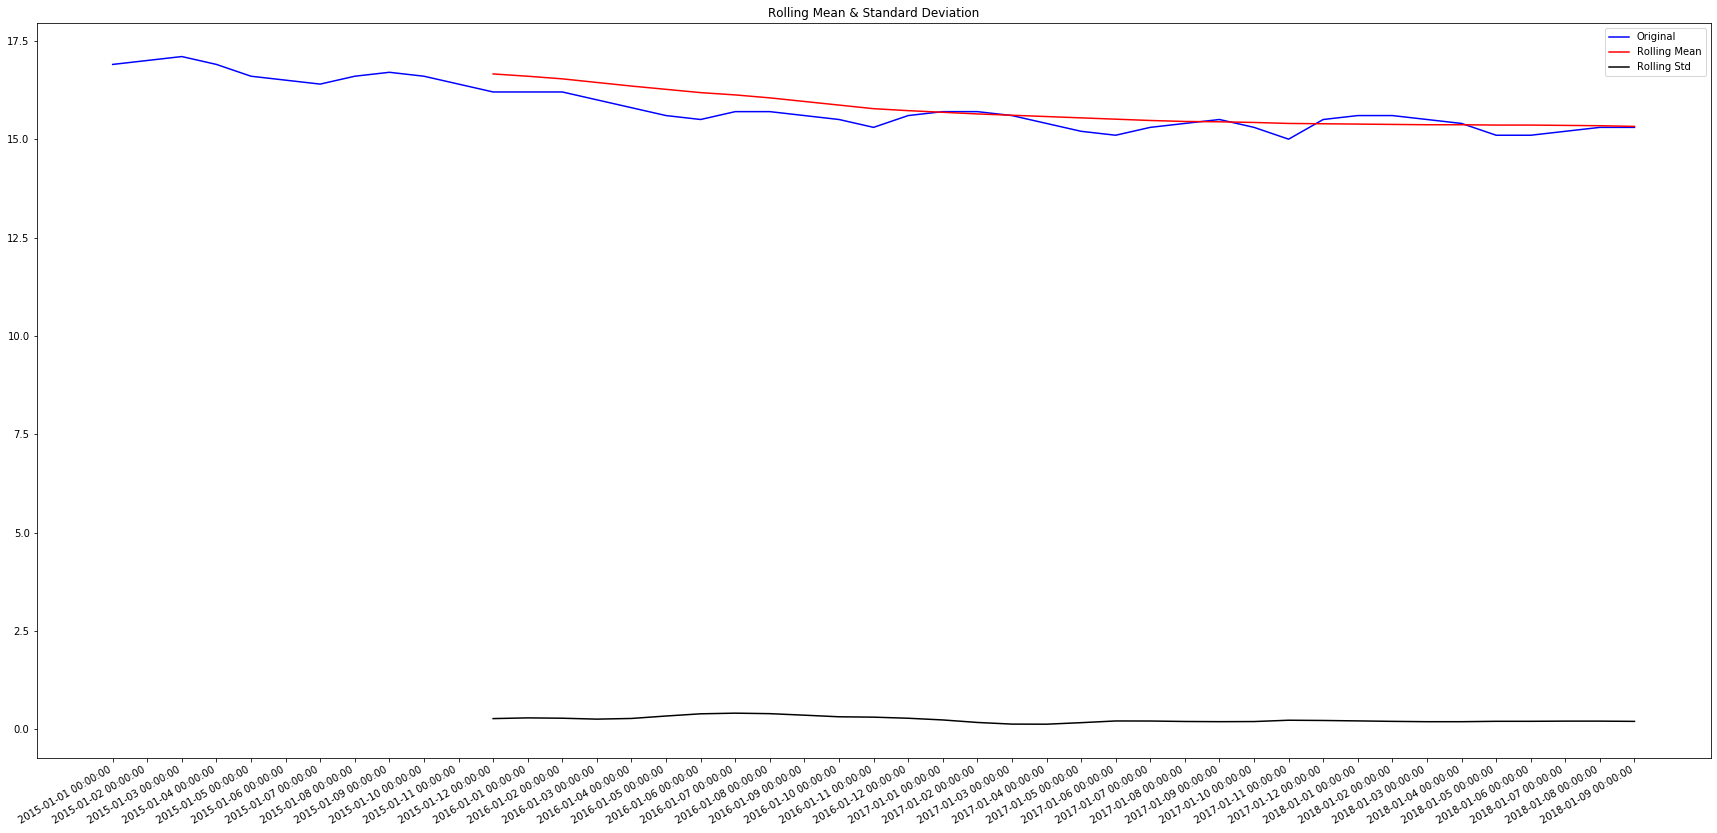

In [66]:
#Plot rolling statistics
fig= plt.figure(figsize=(30,15))
orig = plt.plot(asdaseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [67]:
asdaseries

time
2015-01-01 00:00:00    16.9
2015-01-02 00:00:00    17.0
2015-01-03 00:00:00    17.1
2015-01-04 00:00:00    16.9
2015-01-05 00:00:00    16.6
2015-01-06 00:00:00    16.5
2015-01-07 00:00:00    16.4
2015-01-08 00:00:00    16.6
2015-01-09 00:00:00    16.7
2015-01-10 00:00:00    16.6
2015-01-11 00:00:00    16.4
2015-01-12 00:00:00    16.2
2016-01-01 00:00:00    16.2
2016-01-02 00:00:00    16.2
2016-01-03 00:00:00    16.0
2016-01-04 00:00:00    15.8
2016-01-05 00:00:00    15.6
2016-01-06 00:00:00    15.5
2016-01-07 00:00:00    15.7
2016-01-08 00:00:00    15.7
2016-01-09 00:00:00    15.6
2016-01-10 00:00:00    15.5
2016-01-11 00:00:00    15.3
2016-01-12 00:00:00    15.6
2017-01-01 00:00:00    15.7
2017-01-02 00:00:00    15.7
2017-01-03 00:00:00    15.6
2017-01-04 00:00:00    15.4
2017-01-05 00:00:00    15.2
2017-01-06 00:00:00    15.1
2017-01-07 00:00:00    15.3
2017-01-08 00:00:00    15.4
2017-01-09 00:00:00    15.5
2017-01-10 00:00:00    15.3
2017-01-11 00:00:00    15.0
2017-01-12 00:0

In [68]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=asdaseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -2.135999
p-value                         0.230288
#Lags Used                      4.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:                 D.Asda   No. Observations:                   44
Model:                 ARIMA(5, 1, 0)   Log Likelihood                  23.014
Method:                       css-mle   S.D. of innovations              0.142
Date:                Wed, 31 Jul 2019   AIC                            -32.028
Time:                        15:33:39   BIC                            -19.538
Sample:                             1   HQIC                           -27.396
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0406      0.014     -2.924      0.006      -0.068      -0.013
ar.L1.D.Asda     0.0873      0.149      0.587      0.561      -0.204       0.379
ar.L2.D.Asda    -0.2671      0.143     -1.87

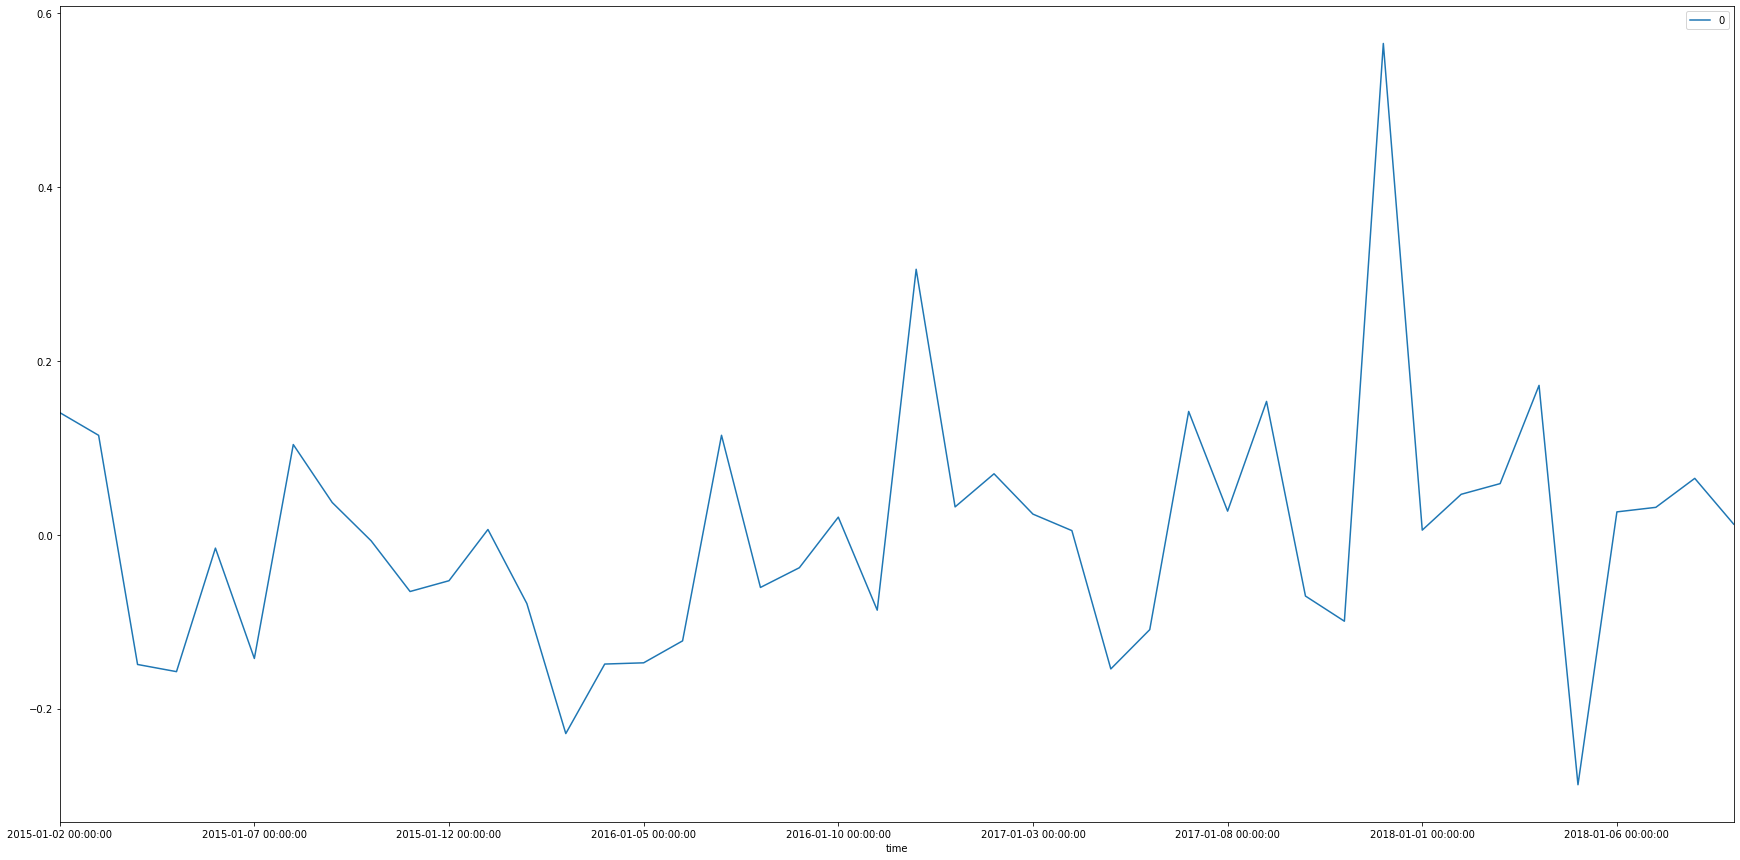

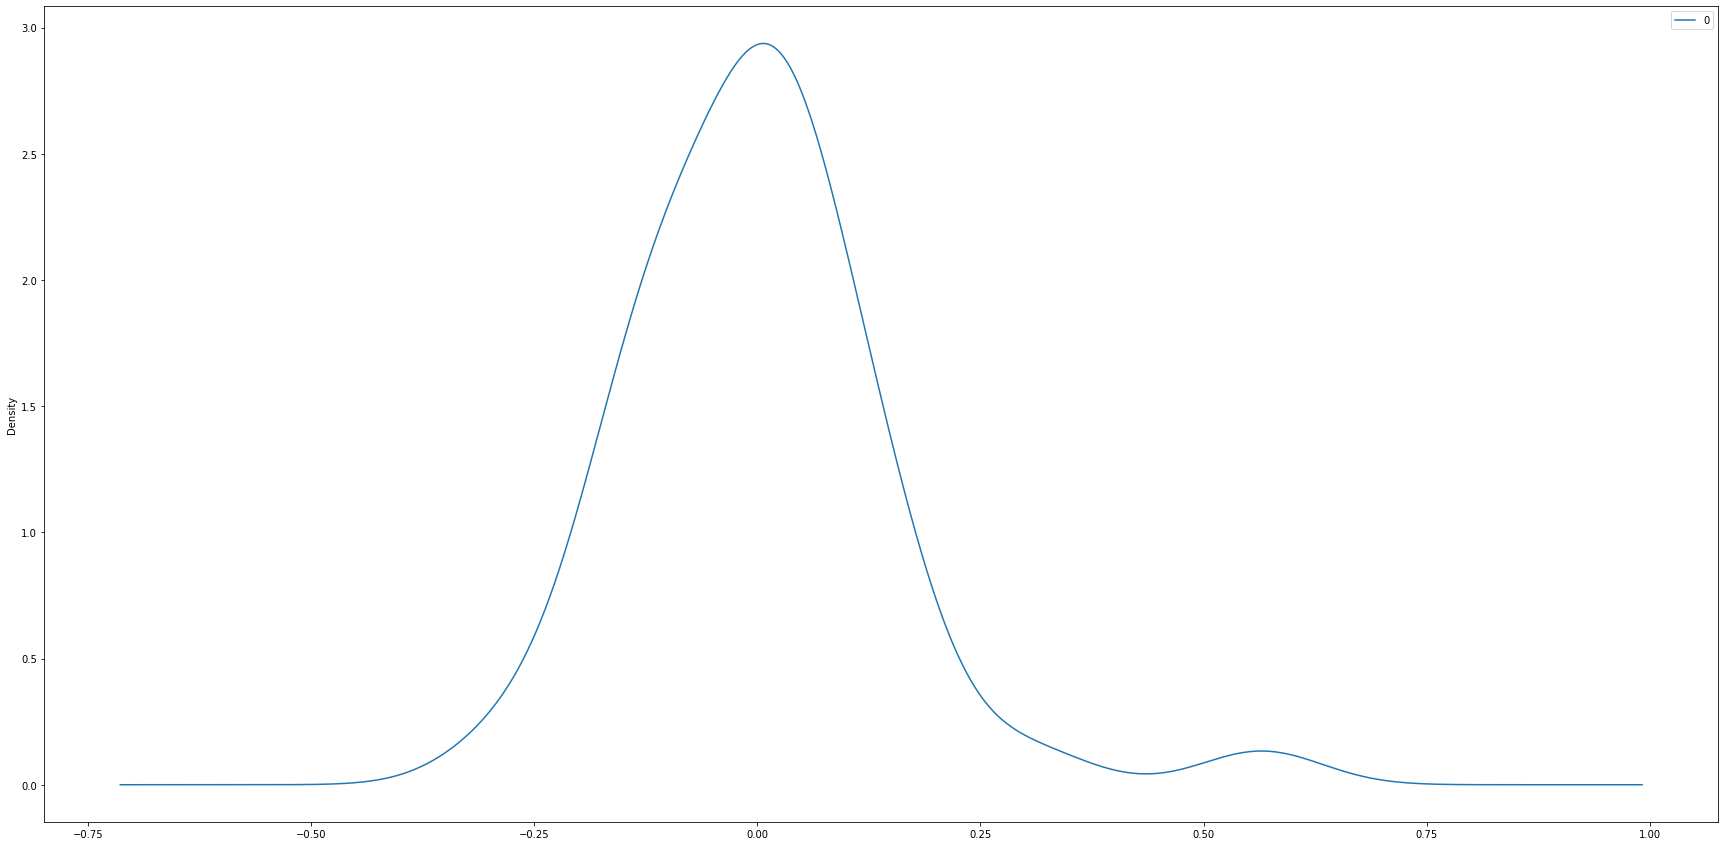

In [69]:
#ARIMA fit Asda marketshare
model = ARIMA(asdaseries, order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())    
   

Plotting AR model


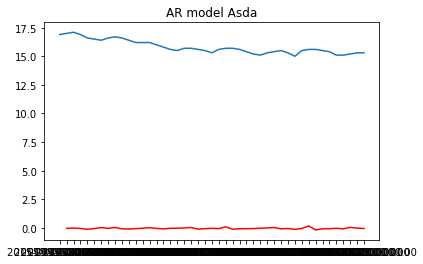

In [70]:
#AR Model Asda
#making order=(2,1,0) gives RSS=1.5023
model = ARIMA(asdaseries, order=(2,1,0))
results_AR = model.fit(disp=-1)
plt.plot(asdaseries)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('AR model Asda')
print('Plotting AR model')

In [71]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [72]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=asdaseries
X.index = indexdf

In [73]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [74]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [75]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 83.14757449504833
ARIMA: (0, 0, 1) 37.63142828630012
ARIMA: (0, 1, 0) -27.40539095005957
ARIMA: (0, 1, 1) -28.08838947676219
ARIMA: (1, 0, 0) -21.818752827972972
ARIMA: (1, 0, 1) -23.808397090831377
ARIMA: (1, 1, 0) -26.97417614951135


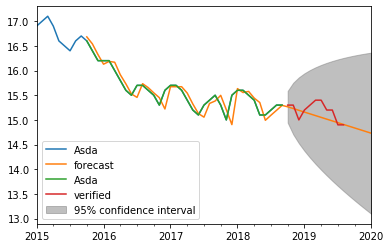

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0357      0.032     -1.129      0.265      -0.098       0.026
ma.L1.D.Asda     0.2859      0.156      1.834      0.074      -0.020       0.592


In [76]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()
mod = sm.tsa.ARIMA(asdaseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(asda2019, label='verified')
plt.legend()


plt.show()



print(results.summary().tables[1])

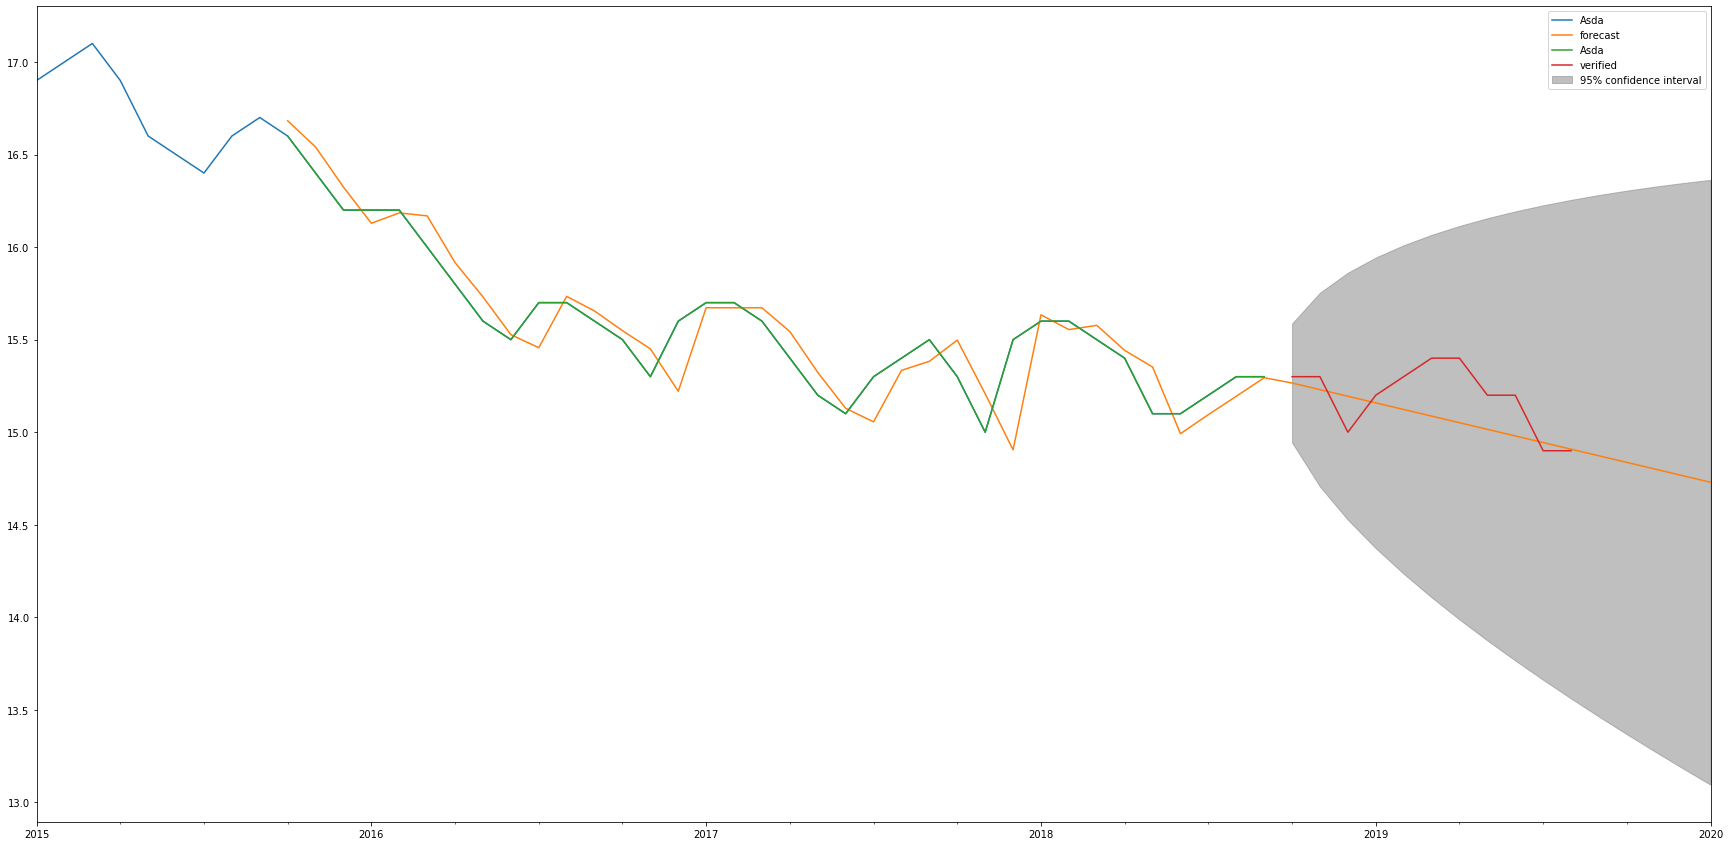

In [77]:
X=asdaseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(asda2019, label='verified')
plt.legend()
plt.show()

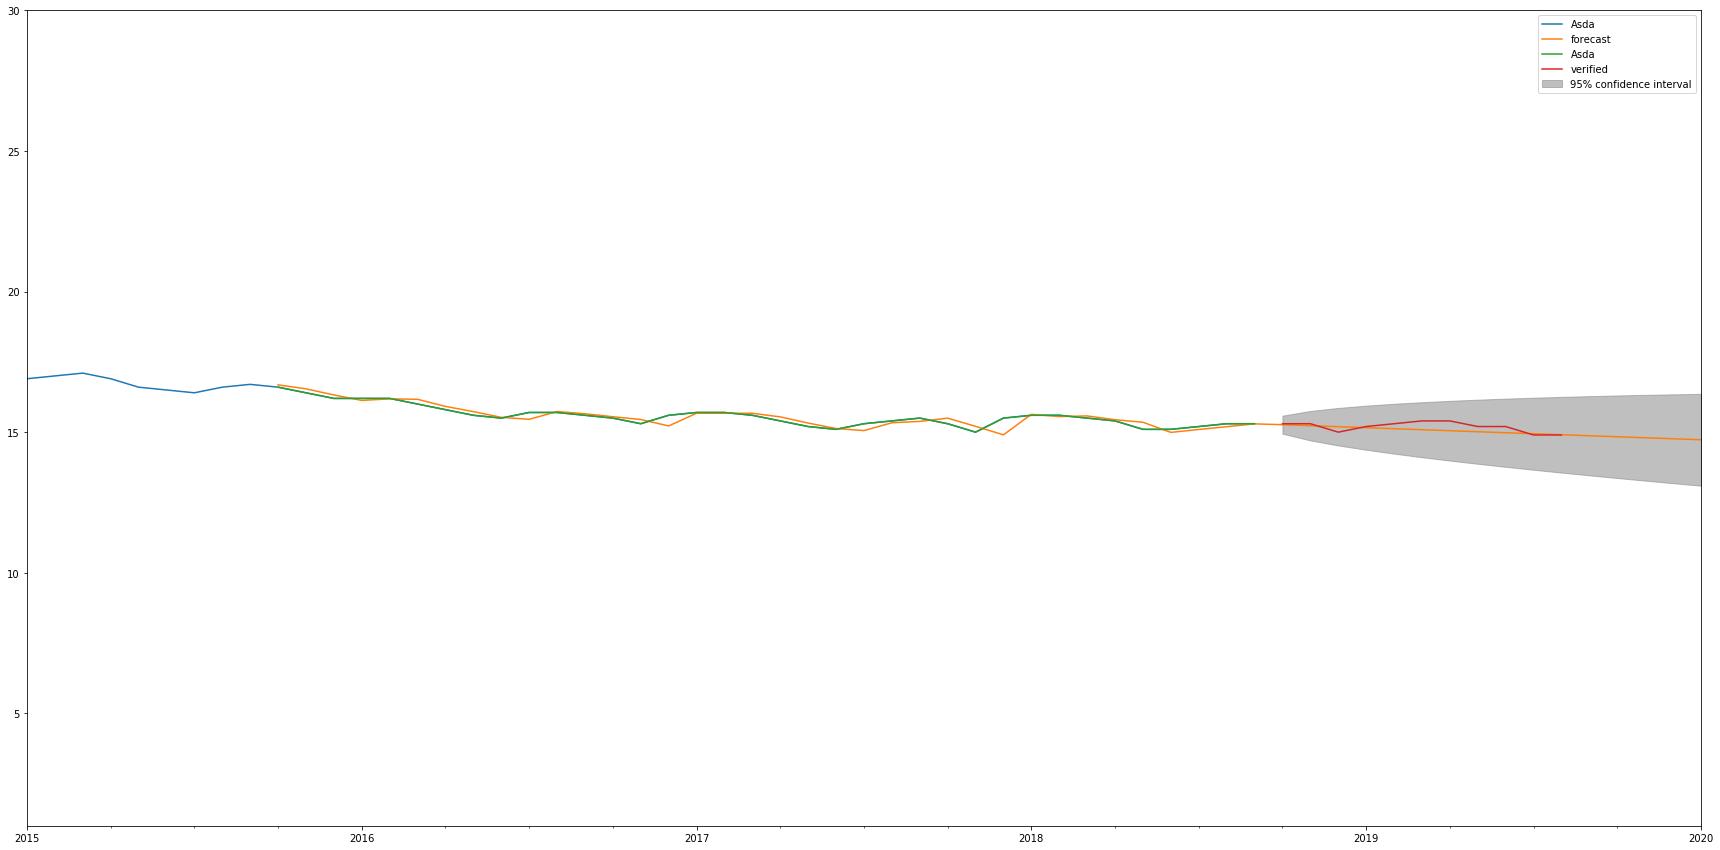

In [78]:
X = asdaseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(asda2019, label='verified')
plt.legend()
plt.show()

In [79]:
print(res)

In [80]:
X = asdaseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=15.099691, expected=15.100000
predicted=15.039348, expected=15.300000
predicted=15.363220, expected=15.400000
predicted=15.367801, expected=15.500000
predicted=15.515363, expected=15.300000
predicted=15.170477, expected=15.000000
predicted=14.875211, expected=15.500000
predicted=15.705856, expected=15.600000
predicted=15.550813, expected=15.600000
predicted=15.578848, expected=15.500000
predicted=15.442086, expected=15.400000
predicted=15.350394, expected=15.100000
predicted=14.983988, expected=15.100000
predicted=15.085127, expected=15.200000
predicted=15.191231, expected=15.300000
predicted=15.294305, expected=15.300000
Test MSE: 0.042


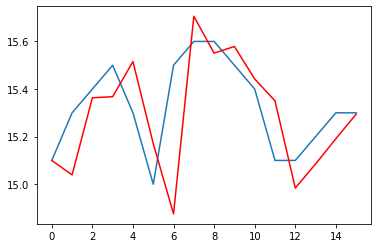

In [81]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

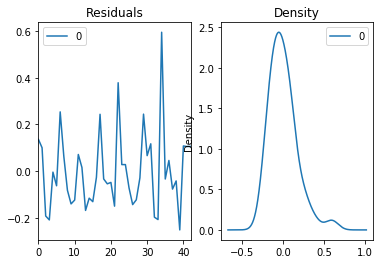

In [82]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

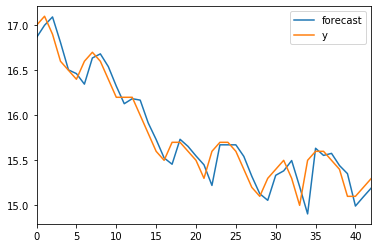

In [83]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

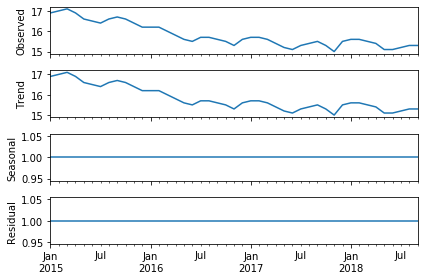

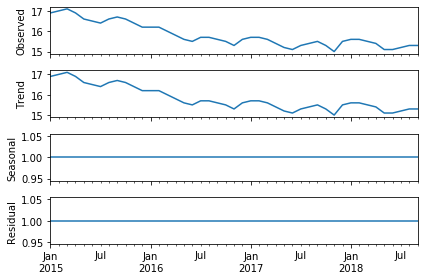

In [84]:
result = seasonal_decompose(asdaseries, model='multiplicative', freq=1)

result.plot()



In [85]:
####Auto Arima Forecast in Python###

import pmdarima as pm


model = pm.auto_arima(asdaseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0); AIC=-27.405, BIC=-23.837, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-26.974, BIC=-21.622, Fit time=0.034 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-28.088, BIC=-22.736, Fit time=0.029 seconds
Fit ARIMA: order=(0, 1, 2); AIC=-29.001, BIC=-21.865, Fit time=0.057 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 3); AIC=-29.251, BIC=-20.330, Fit time=0.106 seconds
Total fit time: 0.288 seconds
                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                   44
Model:                 ARIMA(0, 1, 3)   Log Likelihood                  19.625
Method:                       css-mle   S.D. of innovations              0.154
Date:                Wed, 31 Jul 2019   AIC                         

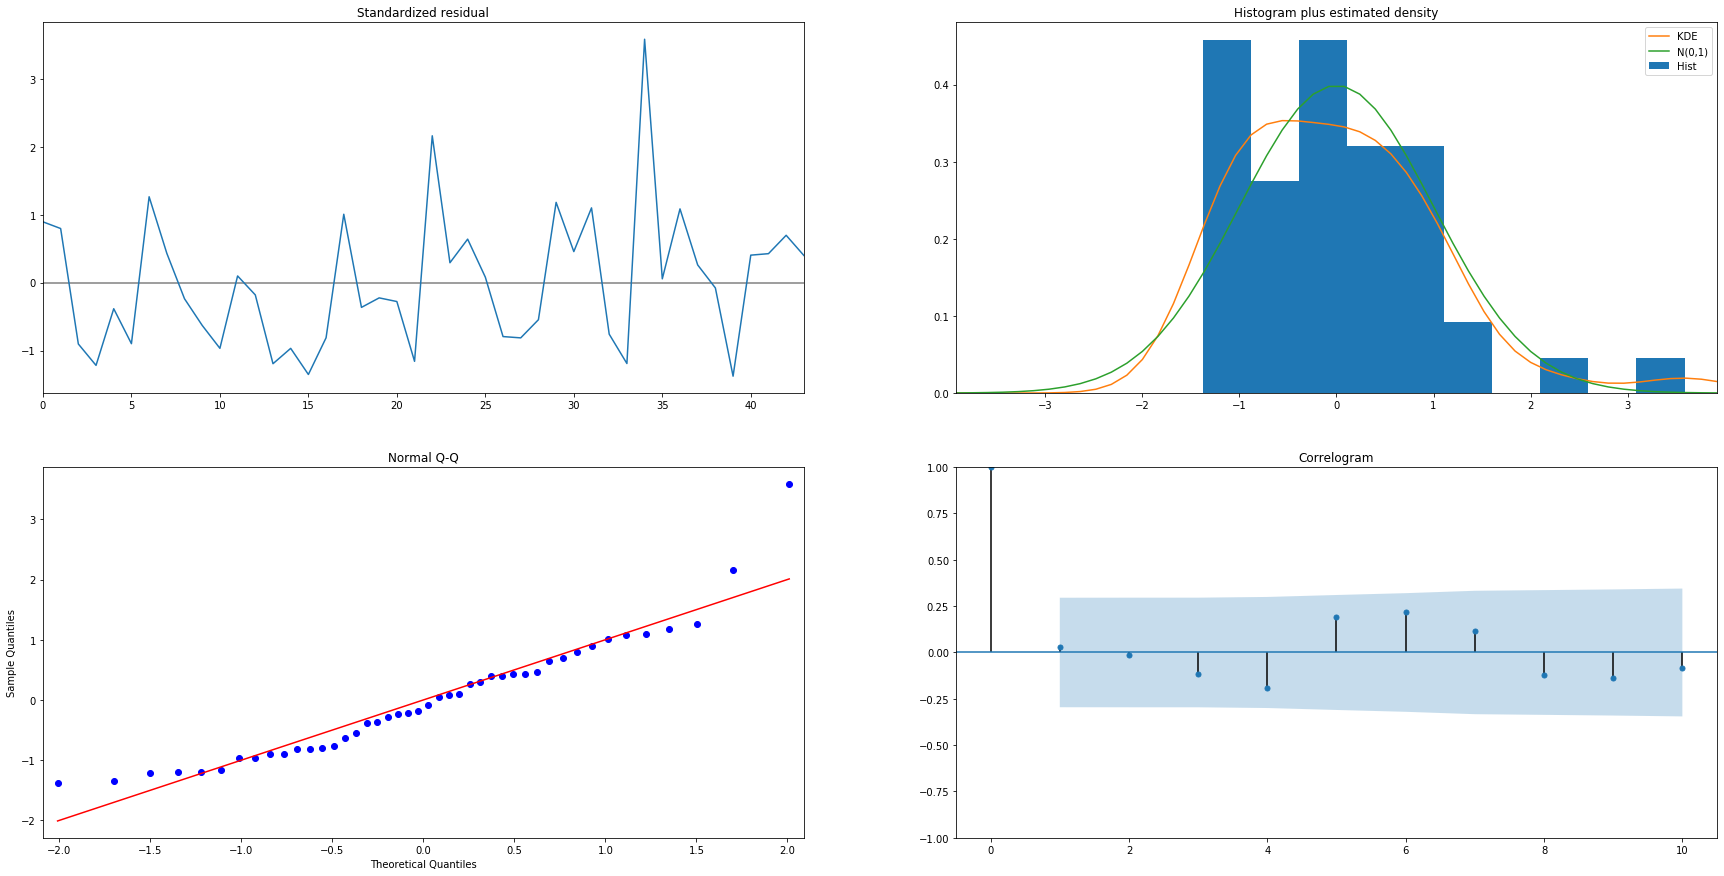

In [86]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

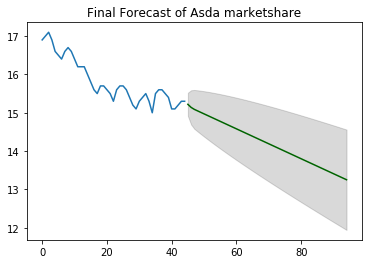

In [87]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Asda marketshare")
plt.show()

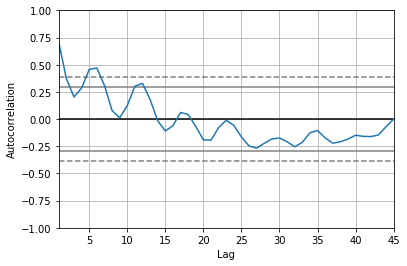

In [88]:
morrisonseries = glv10adf['Morrisons']
autocorrelation_plot(morrisonseries)

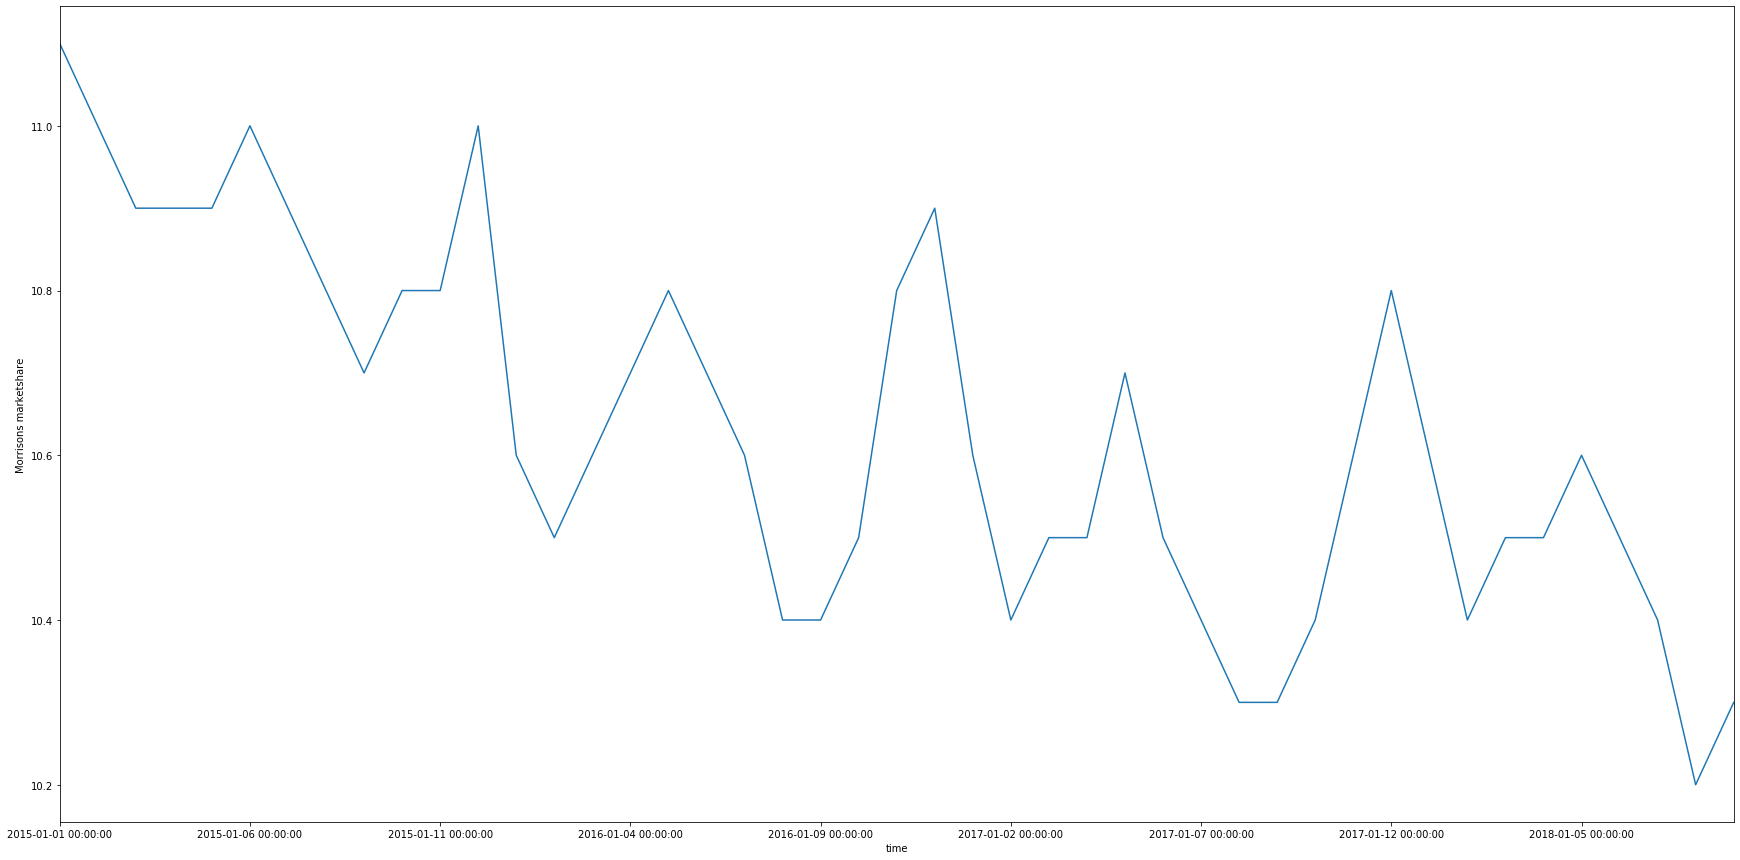

In [89]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Morrisons marketshare')
#fig.autofmt_xdate()
#plt.plot(morrisonseries)## plot graph
morrisonseries.plot()
 

In [90]:
#Determine rolling statistics
rolmean = morrisonseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = morrisonseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00          NaN
2015-01-02 00:00:00          NaN
2015-01-03 00:00:00          NaN
2015-01-04 00:00:00          NaN
2015-01-05 00:00:00          NaN
2015-01-06 00:00:00          NaN
2015-01-07 00:00:00          NaN
2015-01-08 00:00:00          NaN
2015-01-09 00:00:00          NaN
2015-01-10 00:00:00          NaN
2015-01-11 00:00:00          NaN
2015-01-12 00:00:00    10.900000
2016-01-01 00:00:00    10.858333
2016-01-02 00:00:00    10.816667
2016-01-03 00:00:00    10.791667
2016-01-04 00:00:00    10.775000
2016-01-05 00:00:00    10.766667
2016-01-06 00:00:00    10.741667
2016-01-07 00:00:00    10.716667
2016-01-08 00:00:00    10.683333
2016-01-09 00:00:00    10.658333
2016-01-10 00:00:00    10.633333
2016-01-11 00:00:00    10.633333
2016-01-12 00:00:00    10.625000
2017-01-01 00:00:00    10.625000
2017-01-02 00:00:00    10.616667
2017-01-03 00:00:00    10.608333
2017-01-04 00:00:00    10.591667
2017-01-05 00:00:00    10.583333
2017-01-06 00:00:00    10.566667
2017-

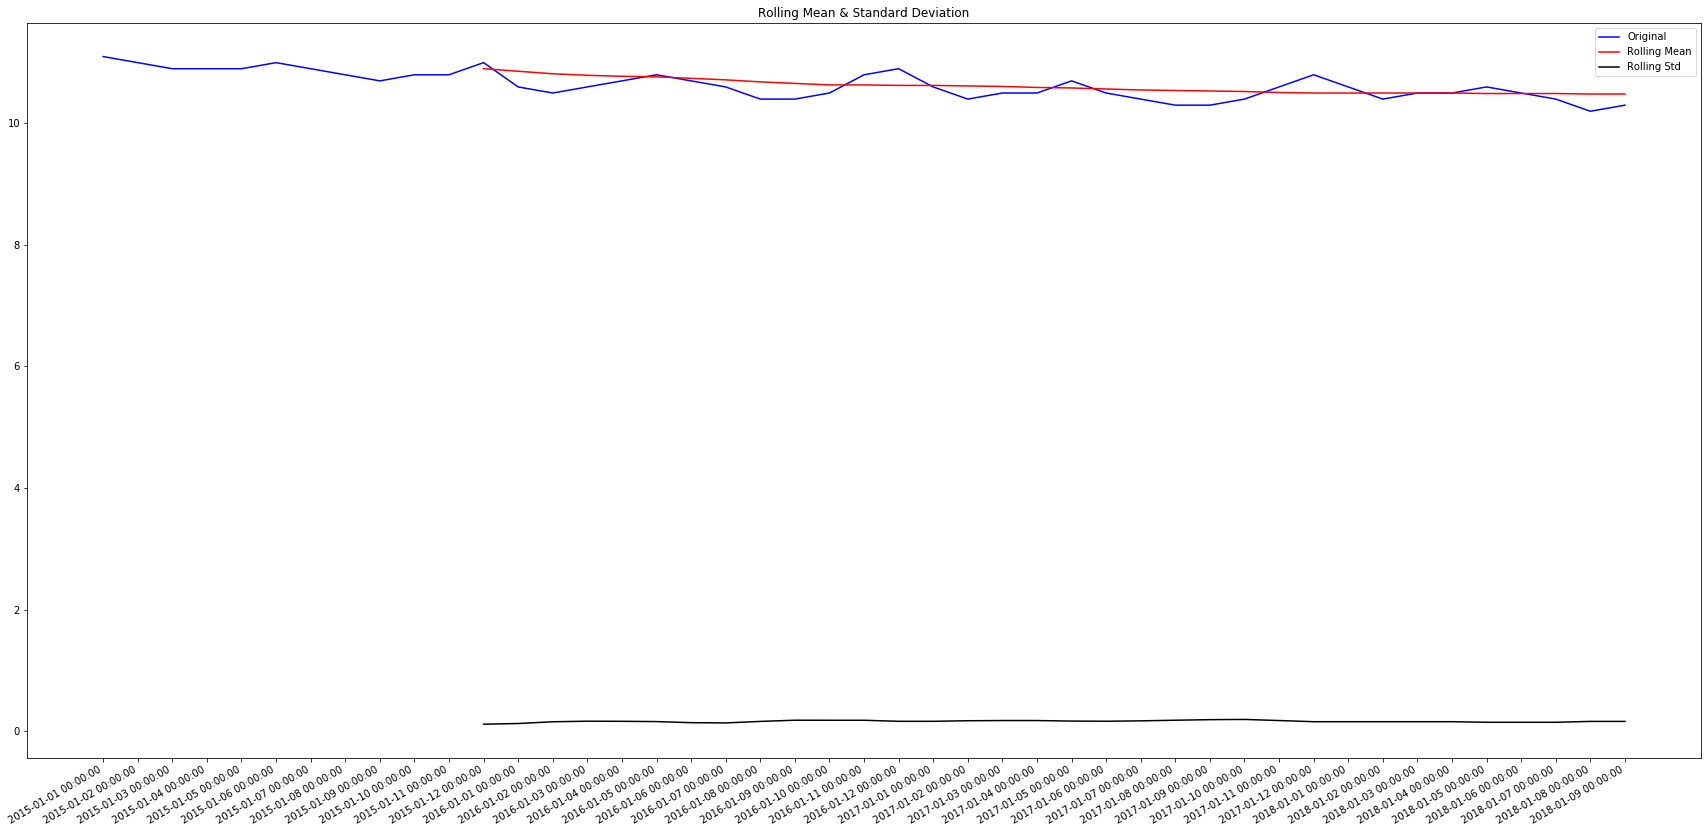

In [91]:
#Plot rolling statistics sainsburys
fig= plt.figure(figsize=(30,15))
orig = plt.plot(morrisonseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show(block=False)

In [92]:
morrisonseries

time
2015-01-01 00:00:00    11.1
2015-01-02 00:00:00    11.0
2015-01-03 00:00:00    10.9
2015-01-04 00:00:00    10.9
2015-01-05 00:00:00    10.9
2015-01-06 00:00:00    11.0
2015-01-07 00:00:00    10.9
2015-01-08 00:00:00    10.8
2015-01-09 00:00:00    10.7
2015-01-10 00:00:00    10.8
2015-01-11 00:00:00    10.8
2015-01-12 00:00:00    11.0
2016-01-01 00:00:00    10.6
2016-01-02 00:00:00    10.5
2016-01-03 00:00:00    10.6
2016-01-04 00:00:00    10.7
2016-01-05 00:00:00    10.8
2016-01-06 00:00:00    10.7
2016-01-07 00:00:00    10.6
2016-01-08 00:00:00    10.4
2016-01-09 00:00:00    10.4
2016-01-10 00:00:00    10.5
2016-01-11 00:00:00    10.8
2016-01-12 00:00:00    10.9
2017-01-01 00:00:00    10.6
2017-01-02 00:00:00    10.4
2017-01-03 00:00:00    10.5
2017-01-04 00:00:00    10.5
2017-01-05 00:00:00    10.7
2017-01-06 00:00:00    10.5
2017-01-07 00:00:00    10.4
2017-01-08 00:00:00    10.3
2017-01-09 00:00:00    10.3
2017-01-10 00:00:00    10.4
2017-01-11 00:00:00    10.6
2017-01-12 00:0

In [93]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=morrisonseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -1.571303
p-value                         0.497991
#Lags Used                      4.000000
Number of Observations Used    40.000000
Critical Value (1%)            -3.605565
Critical Value (5%)            -2.937069
Critical Value (10%)           -2.606986
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:            D.Morrisons   No. Observations:                   44
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  21.892
Method:                       css-mle   S.D. of innovations              0.147
Date:                Wed, 31 Jul 2019   AIC                            -37.784
Time:                        15:34:06   BIC                            -32.432
Sample:                             1   HQIC                           -35.799
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0180      0.025     -0.713      0.480      -0.067       0.031
ma.L1.D.Morrisons     0.1392      0.164      0.850      0.400      -0.182       0.460
                        

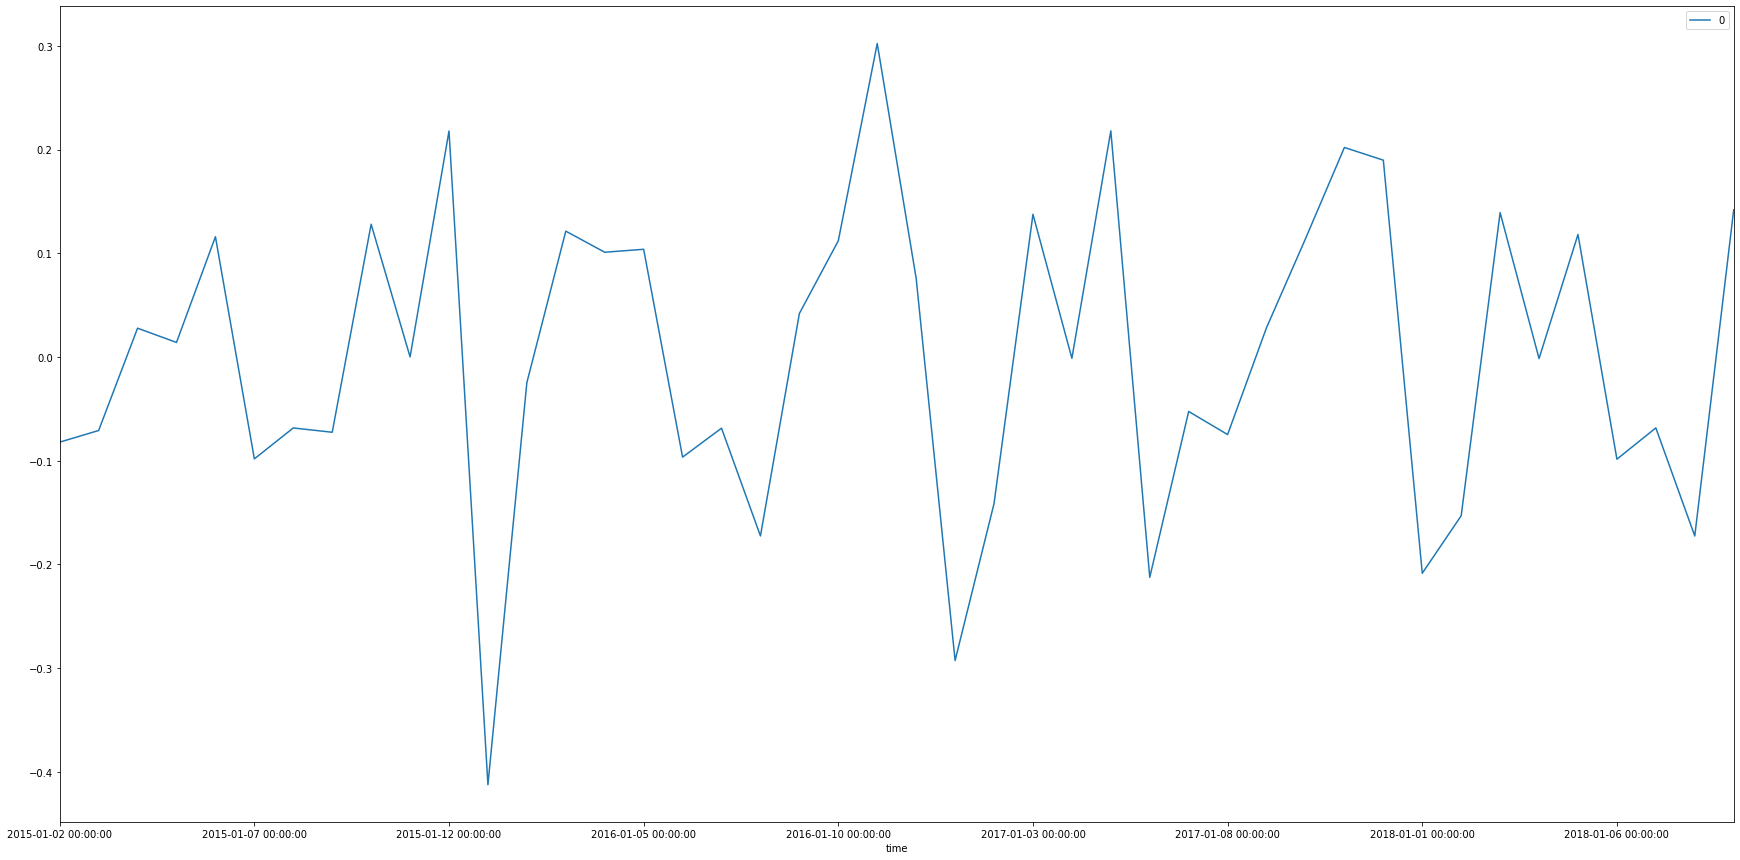

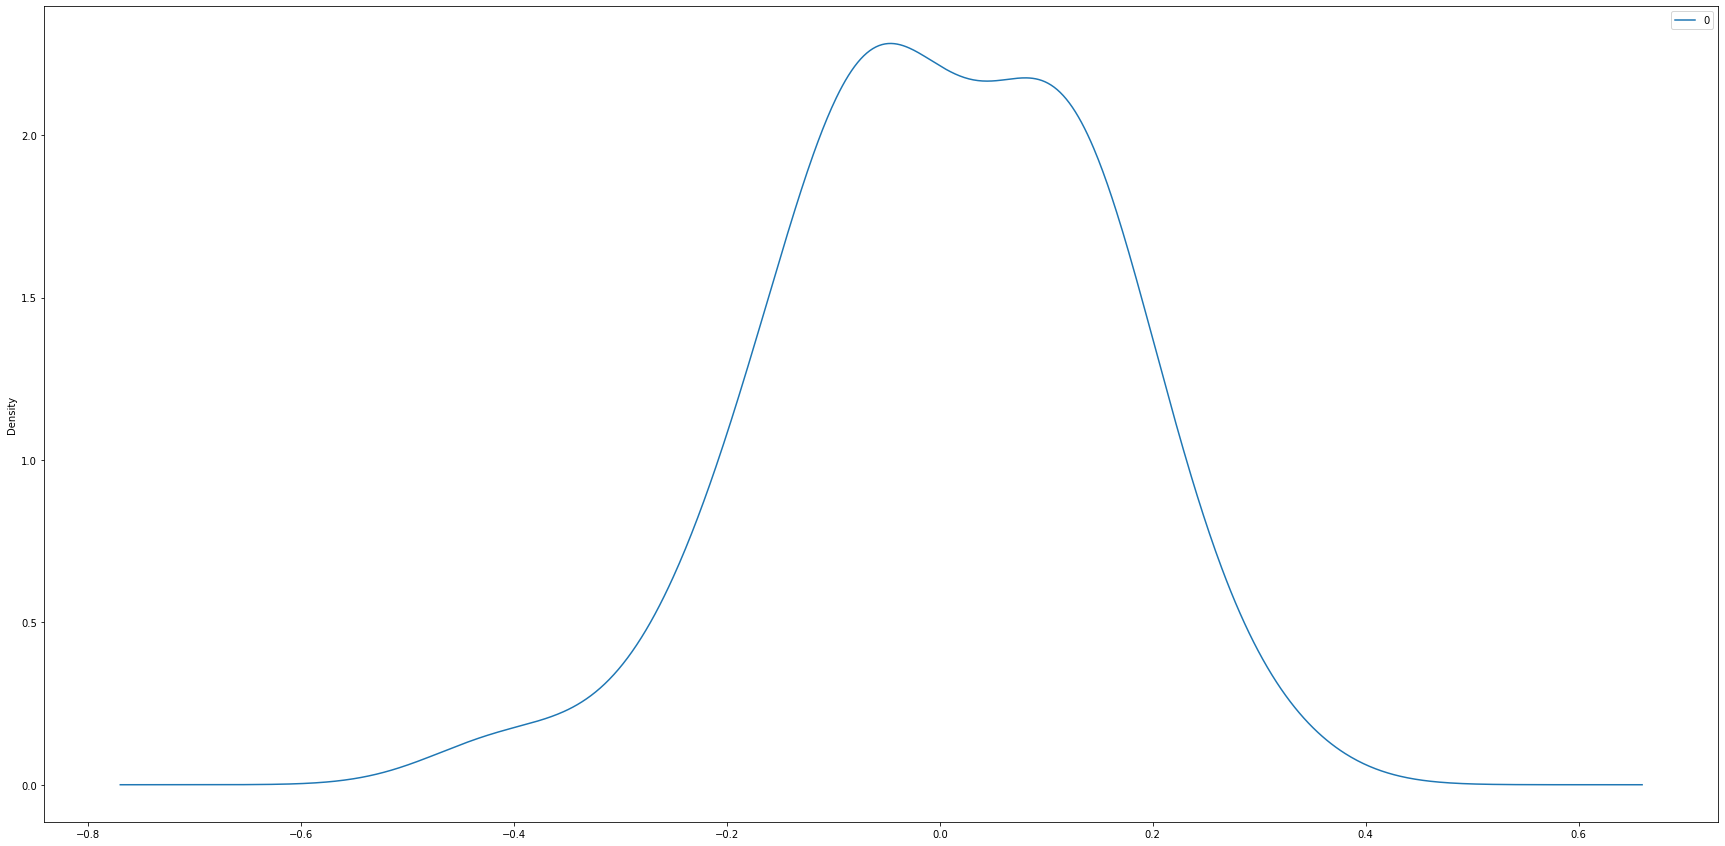

In [94]:
#ARIMA fit Morrisons marketshare
model = ARIMA(morrisonseries, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())     

In [95]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [96]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=morrisonseries
X.index = indexdf

In [97]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [98]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [99]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) -3.8609346034356378
ARIMA: (0, 0, 1) -29.498985094977755
ARIMA: (0, 1, 0) -39.1846282777137
ARIMA: (0, 1, 1) -37.78428214011183
ARIMA: (1, 0, 0) -40.07930063169526
ARIMA: (1, 0, 1) -40.956057563213776
ARIMA: (1, 1, 0) -37.527602227232904
ARIMA: (1, 1, 1) -44.728995218071134


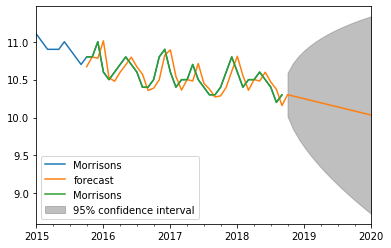

                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.0180      0.025     -0.713      0.480      -0.067       0.031
ma.L1.D.Morrisons     0.1392      0.164      0.850      0.400      -0.182       0.460


In [100]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(morrisonseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

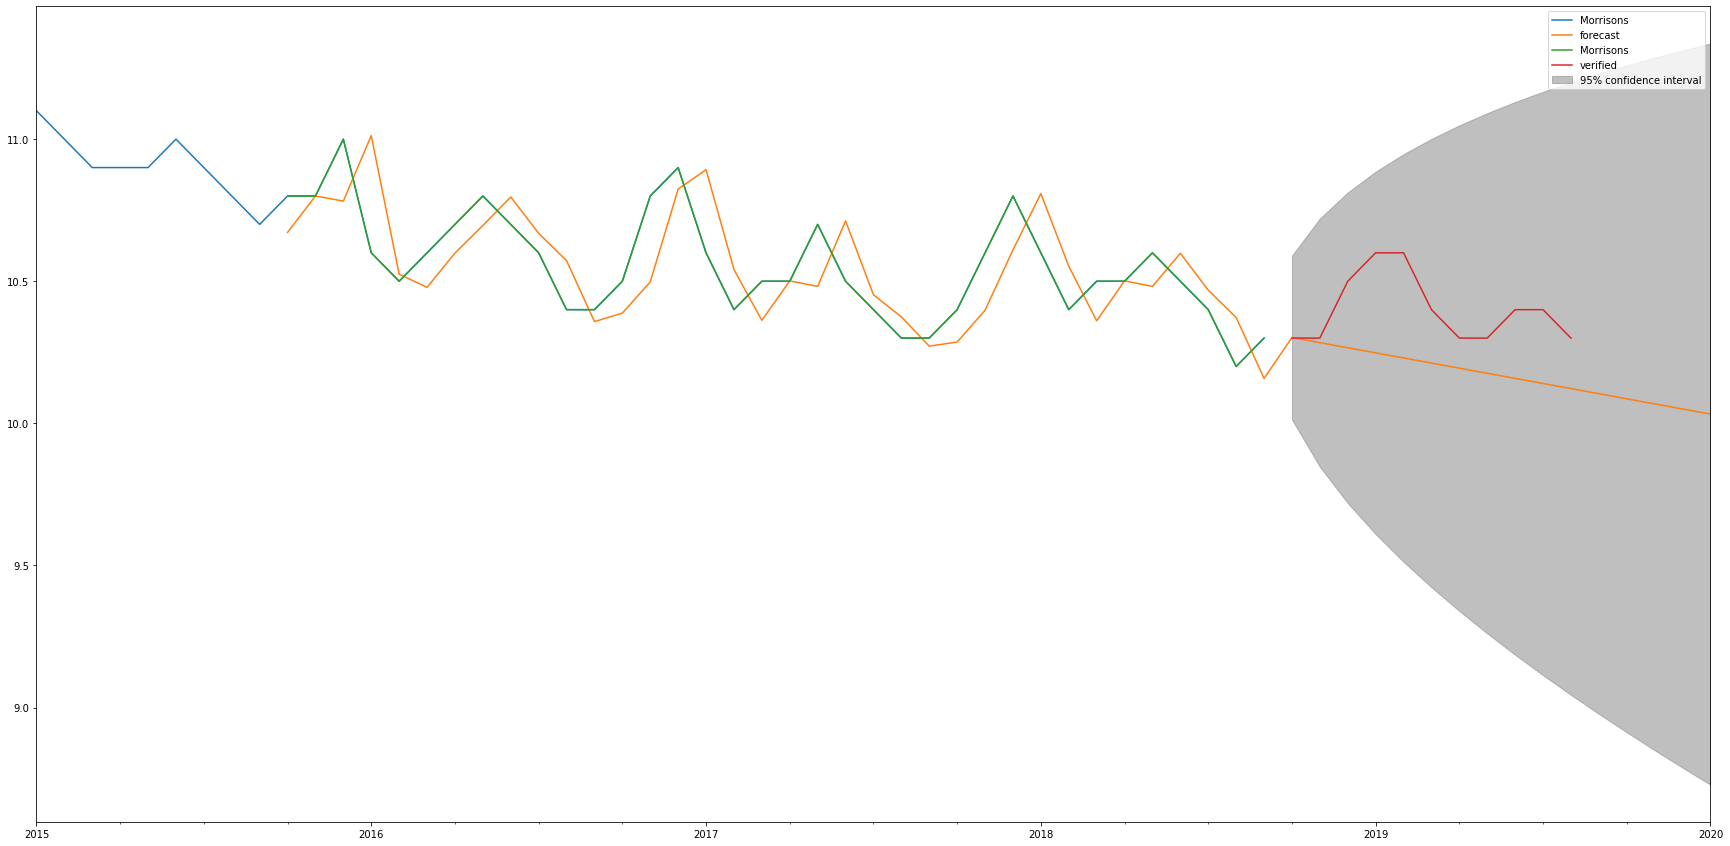

In [101]:
X=morrisonseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(morrisons2019, label='verified')
plt.legend()
plt.show()

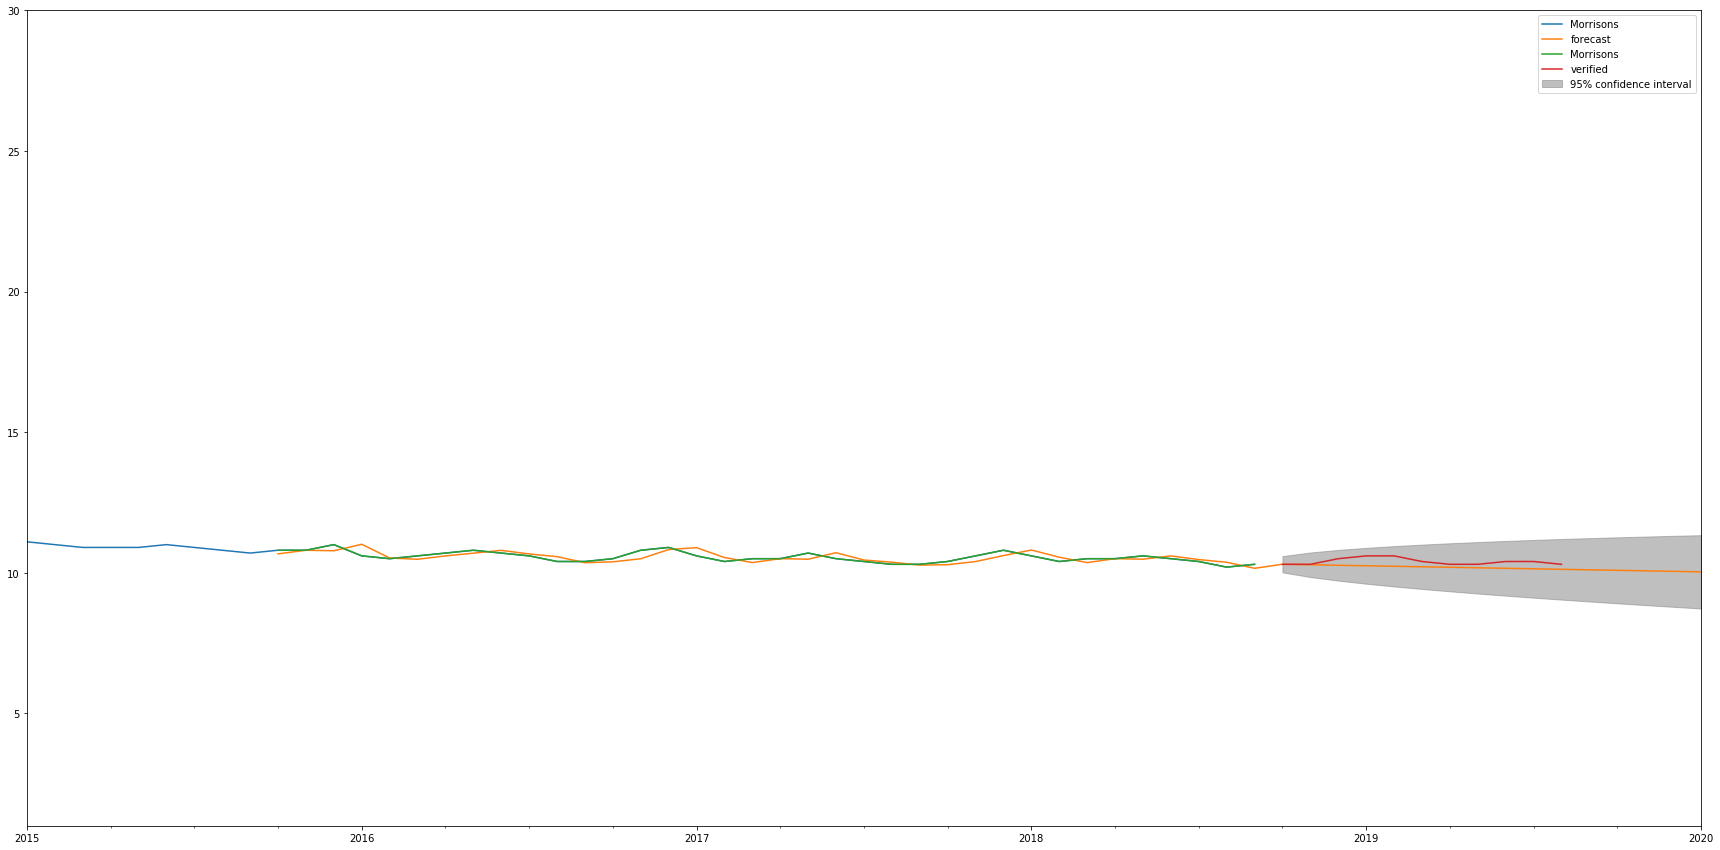

In [102]:
X=morrisonseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(morrisons2019, label='verified')
plt.legend()
plt.show()

In [103]:
print(res)

In [104]:
X = morrisonseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=10.720553, expected=10.500000
predicted=10.466043, expected=10.400000
predicted=10.370805, expected=10.300000
predicted=10.266923, expected=10.300000
predicted=10.277950, expected=10.400000
predicted=10.391263, expected=10.600000
predicted=10.613905, expected=10.800000
predicted=10.823750, expected=10.600000
predicted=10.555003, expected=10.400000
predicted=10.353767, expected=10.500000
predicted=10.508408, expected=10.500000
predicted=10.482944, expected=10.600000
predicted=10.606243, expected=10.500000
predicted=10.469767, expected=10.400000
predicted=10.372270, expected=10.200000
predicted=10.150023, expected=10.300000
Test MSE: 0.021


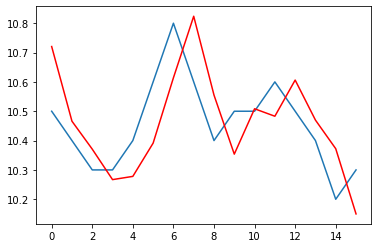

In [105]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

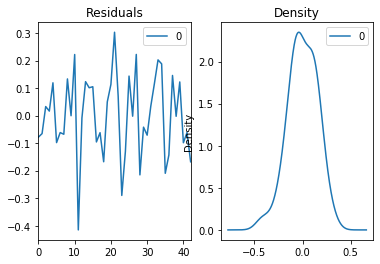

In [106]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

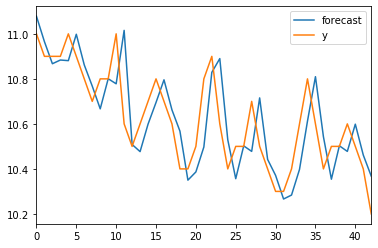

In [107]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

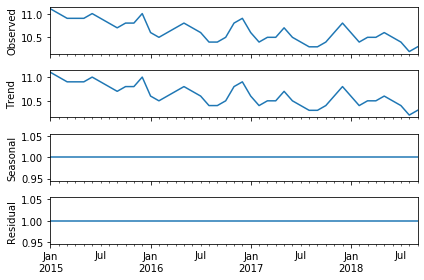

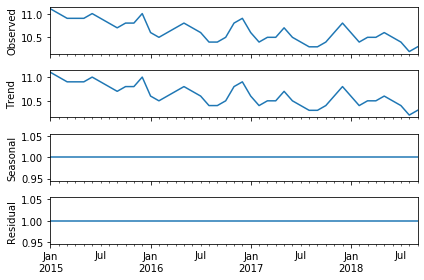

In [108]:
result = seasonal_decompose(morrisonseries, model='multiplicative', freq=1)

result.plot()



In [109]:
####Auto Arima Forecast in Python for Morrisons###

import pmdarima as pm


model = pm.auto_arima(morrisonseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 1, 1); AIC=-44.729, BIC=-37.592, Fit time=0.155 seconds
Fit ARIMA: order=(0, 1, 0); AIC=-39.185, BIC=-35.616, Fit time=0.005 seconds
Fit ARIMA: order=(1, 1, 0); AIC=-37.528, BIC=-32.175, Fit time=0.037 seconds
Fit ARIMA: order=(0, 1, 1); AIC=-37.784, BIC=-32.432, Fit time=0.038 seconds
Fit ARIMA: order=(2, 1, 1); AIC=-52.617, BIC=-43.696, Fit time=0.239 seconds
Fit ARIMA: order=(2, 1, 0); AIC=-39.522, BIC=-32.385, Fit time=0.066 seconds
Fit ARIMA: order=(2, 1, 2); AIC=-56.495, BIC=-45.790, Fit time=0.326 seconds
Fit ARIMA: order=(3, 1, 3); AIC=-37.659, BIC=-23.386, Fit time=0.345 seconds
Fit ARIMA: order=(1, 1, 2); AIC=-47.234, BIC=-38.313, Fit time=0.237 seconds
Fit ARIMA: order=(3, 1, 2); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 3); AIC=-61.229, BIC=-48.739, Fit time=0.718 seconds
Fit ARIMA: order=(1, 1, 3); AIC=nan, BIC=nan, Fit time=nan seconds
Total fit time: 2.359 seconds
                             ARIMA Model Results                  

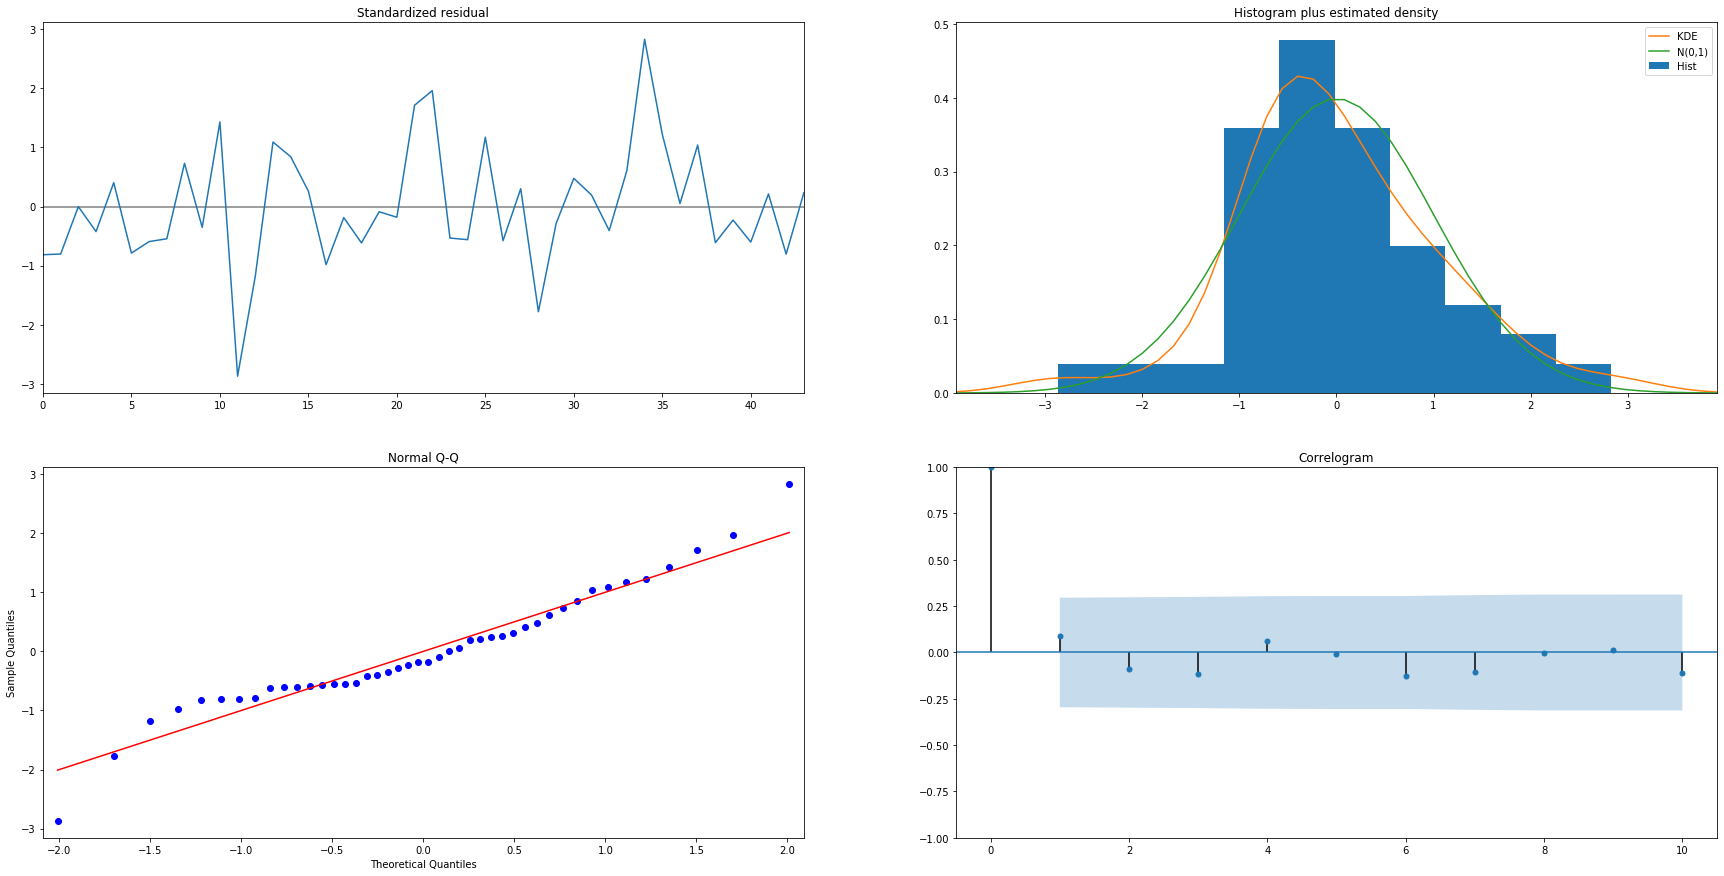

In [110]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

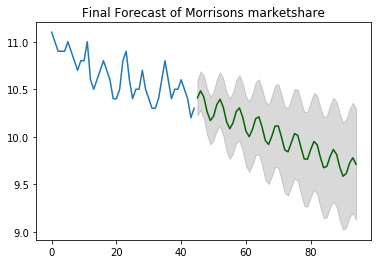

In [111]:
# Forecast


n_periods = 50
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(X), len(X)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(X)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Morrisons marketshare")
plt.show()

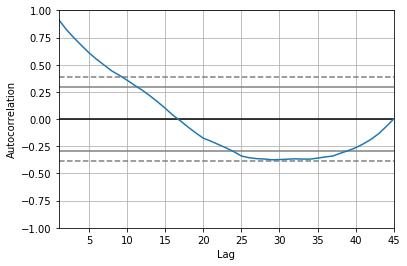

In [112]:
aldiseries = glv10adf['Aldi']
autocorrelation_plot(aldiseries)

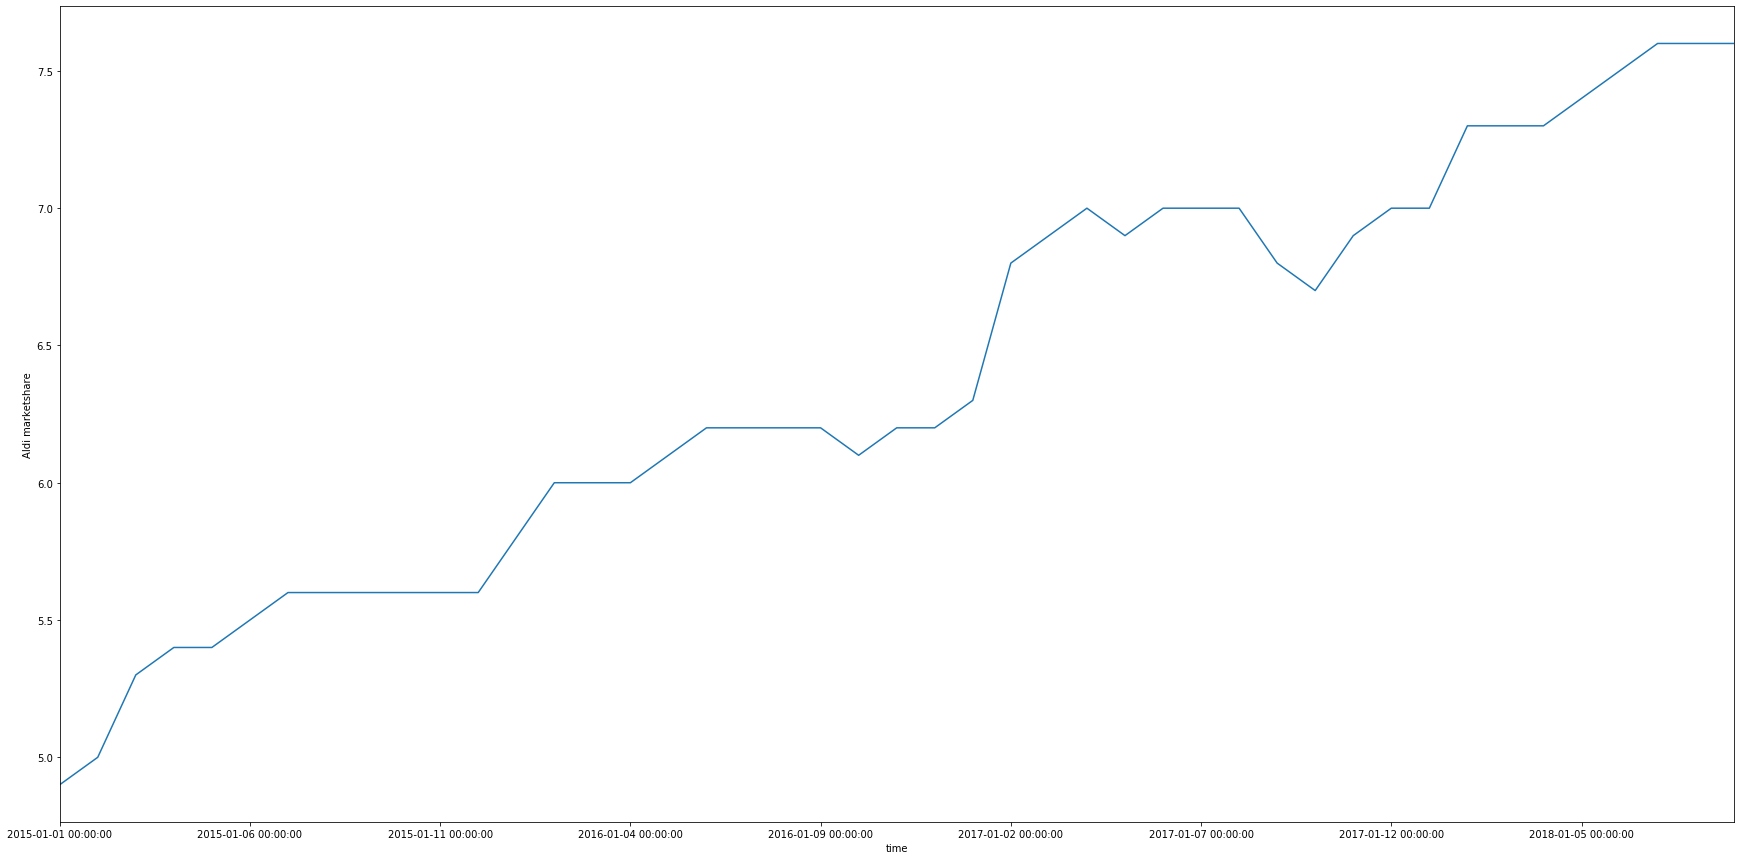

In [113]:
## plot graph
fig= plt.figure(figsize=(30,15))
plt.xlabel('Time')
plt.ylabel('Aldi marketshare')
#fig.autofmt_xdate()
aldiseries.plot() 

In [114]:
#Determine rolling statistics
rolmean = aldiseries.rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
rolstd = aldiseries.rolling(window=12).std()
print(rolmean,rolstd)

time
2015-01-01 00:00:00         NaN
2015-01-02 00:00:00         NaN
2015-01-03 00:00:00         NaN
2015-01-04 00:00:00         NaN
2015-01-05 00:00:00         NaN
2015-01-06 00:00:00         NaN
2015-01-07 00:00:00         NaN
2015-01-08 00:00:00         NaN
2015-01-09 00:00:00         NaN
2015-01-10 00:00:00         NaN
2015-01-11 00:00:00         NaN
2015-01-12 00:00:00    5.425000
2016-01-01 00:00:00    5.500000
2016-01-02 00:00:00    5.583333
2016-01-03 00:00:00    5.641667
2016-01-04 00:00:00    5.691667
2016-01-05 00:00:00    5.750000
2016-01-06 00:00:00    5.808333
2016-01-07 00:00:00    5.858333
2016-01-08 00:00:00    5.908333
2016-01-09 00:00:00    5.958333
2016-01-10 00:00:00    6.000000
2016-01-11 00:00:00    6.050000
2016-01-12 00:00:00    6.100000
2017-01-01 00:00:00    6.141667
2017-01-02 00:00:00    6.208333
2017-01-03 00:00:00    6.283333
2017-01-04 00:00:00    6.366667
2017-01-05 00:00:00    6.433333
2017-01-06 00:00:00    6.500000
2017-01-07 00:00:00    6.566667
201

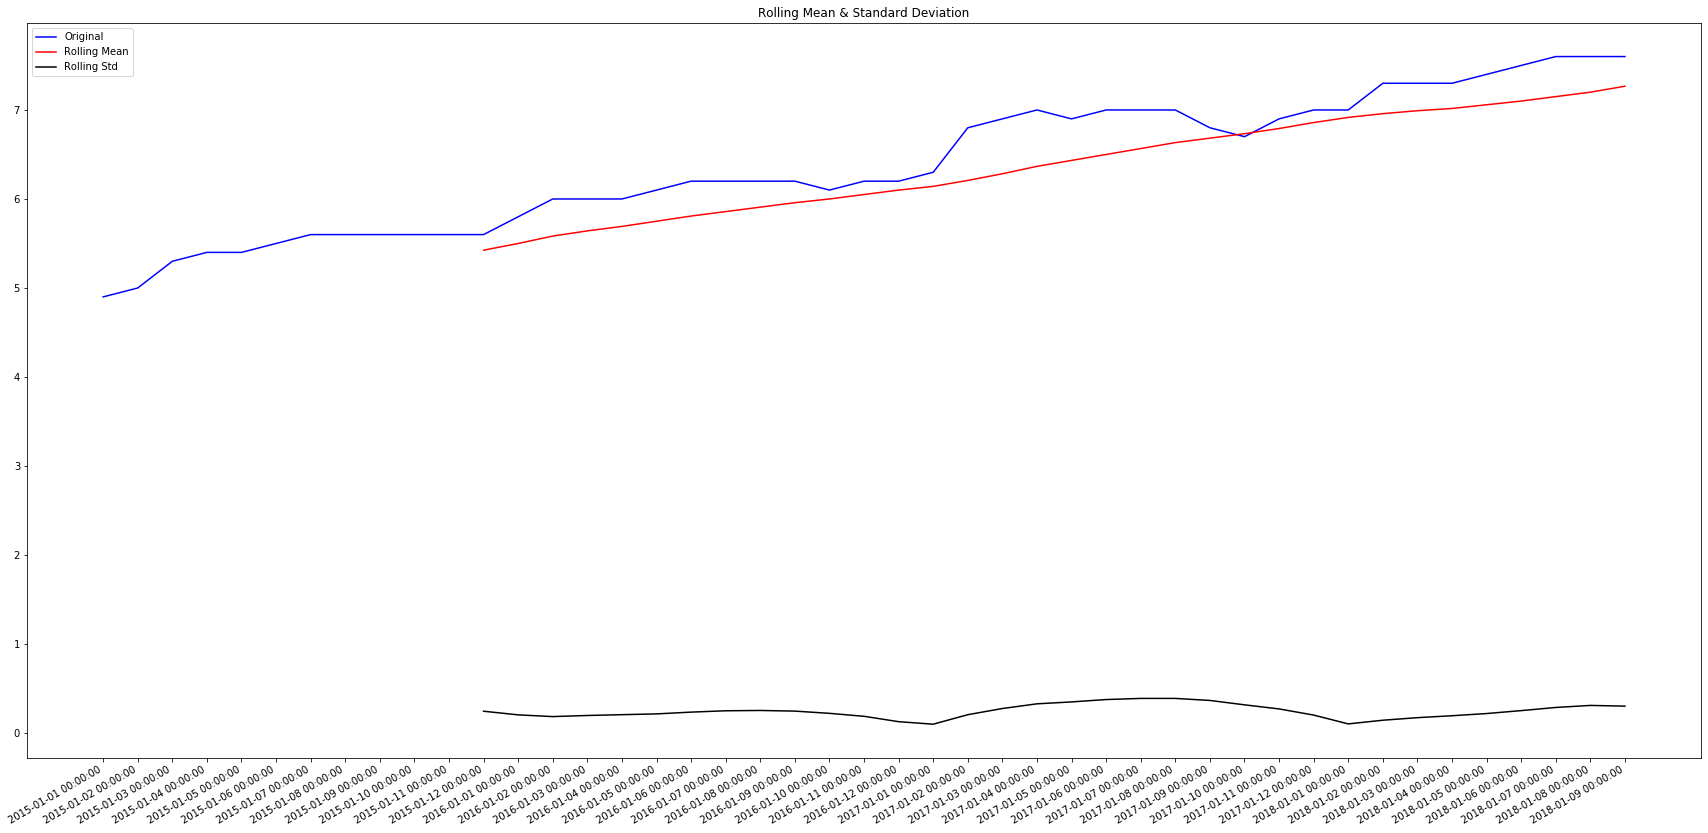

In [115]:
#Plot rolling statistics Aldi
fig= plt.figure(figsize=(30,15))
orig = plt.plot(aldiseries, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
fig.autofmt_xdate()
plt.show()

In [116]:
aldiseries

time
2015-01-01 00:00:00    4.9
2015-01-02 00:00:00    5.0
2015-01-03 00:00:00    5.3
2015-01-04 00:00:00    5.4
2015-01-05 00:00:00    5.4
2015-01-06 00:00:00    5.5
2015-01-07 00:00:00    5.6
2015-01-08 00:00:00    5.6
2015-01-09 00:00:00    5.6
2015-01-10 00:00:00    5.6
2015-01-11 00:00:00    5.6
2015-01-12 00:00:00    5.6
2016-01-01 00:00:00    5.8
2016-01-02 00:00:00    6.0
2016-01-03 00:00:00    6.0
2016-01-04 00:00:00    6.0
2016-01-05 00:00:00    6.1
2016-01-06 00:00:00    6.2
2016-01-07 00:00:00    6.2
2016-01-08 00:00:00    6.2
2016-01-09 00:00:00    6.2
2016-01-10 00:00:00    6.1
2016-01-11 00:00:00    6.2
2016-01-12 00:00:00    6.2
2017-01-01 00:00:00    6.3
2017-01-02 00:00:00    6.8
2017-01-03 00:00:00    6.9
2017-01-04 00:00:00    7.0
2017-01-05 00:00:00    6.9
2017-01-06 00:00:00    7.0
2017-01-07 00:00:00    7.0
2017-01-08 00:00:00    7.0
2017-01-09 00:00:00    6.8
2017-01-10 00:00:00    6.7
2017-01-11 00:00:00    6.9
2017-01-12 00:00:00    7.0
2018-01-01 00:00:00    

In [117]:
#Test value ~ critical value => stationary series
#Perform Augmented Dickey–Fuller test:
X=aldiseries.values
print('Results of Dickey Fuller Test:')
dftest = adfuller(X, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                 -1.151146
p-value                         0.694251
#Lags Used                      0.000000
Number of Observations Used    44.000000
Critical Value (1%)            -3.588573
Critical Value (5%)            -2.929886
Critical Value (10%)           -2.603185
dtype: float64


                             ARIMA Model Results                              
Dep. Variable:                 D.Aldi   No. Observations:                   44
Model:                 ARIMA(0, 1, 1)   Log Likelihood                  32.360
Method:                       css-mle   S.D. of innovations              0.116
Date:                Wed, 31 Jul 2019   AIC                            -58.720
Time:                        15:34:33   BIC                            -53.368
Sample:                             1   HQIC                           -56.736
                                                                              
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0612      0.020      3.020      0.004       0.021       0.101
ma.L1.D.Aldi     0.1628      0.166      0.979      0.333      -0.163       0.489
                                    Roots   

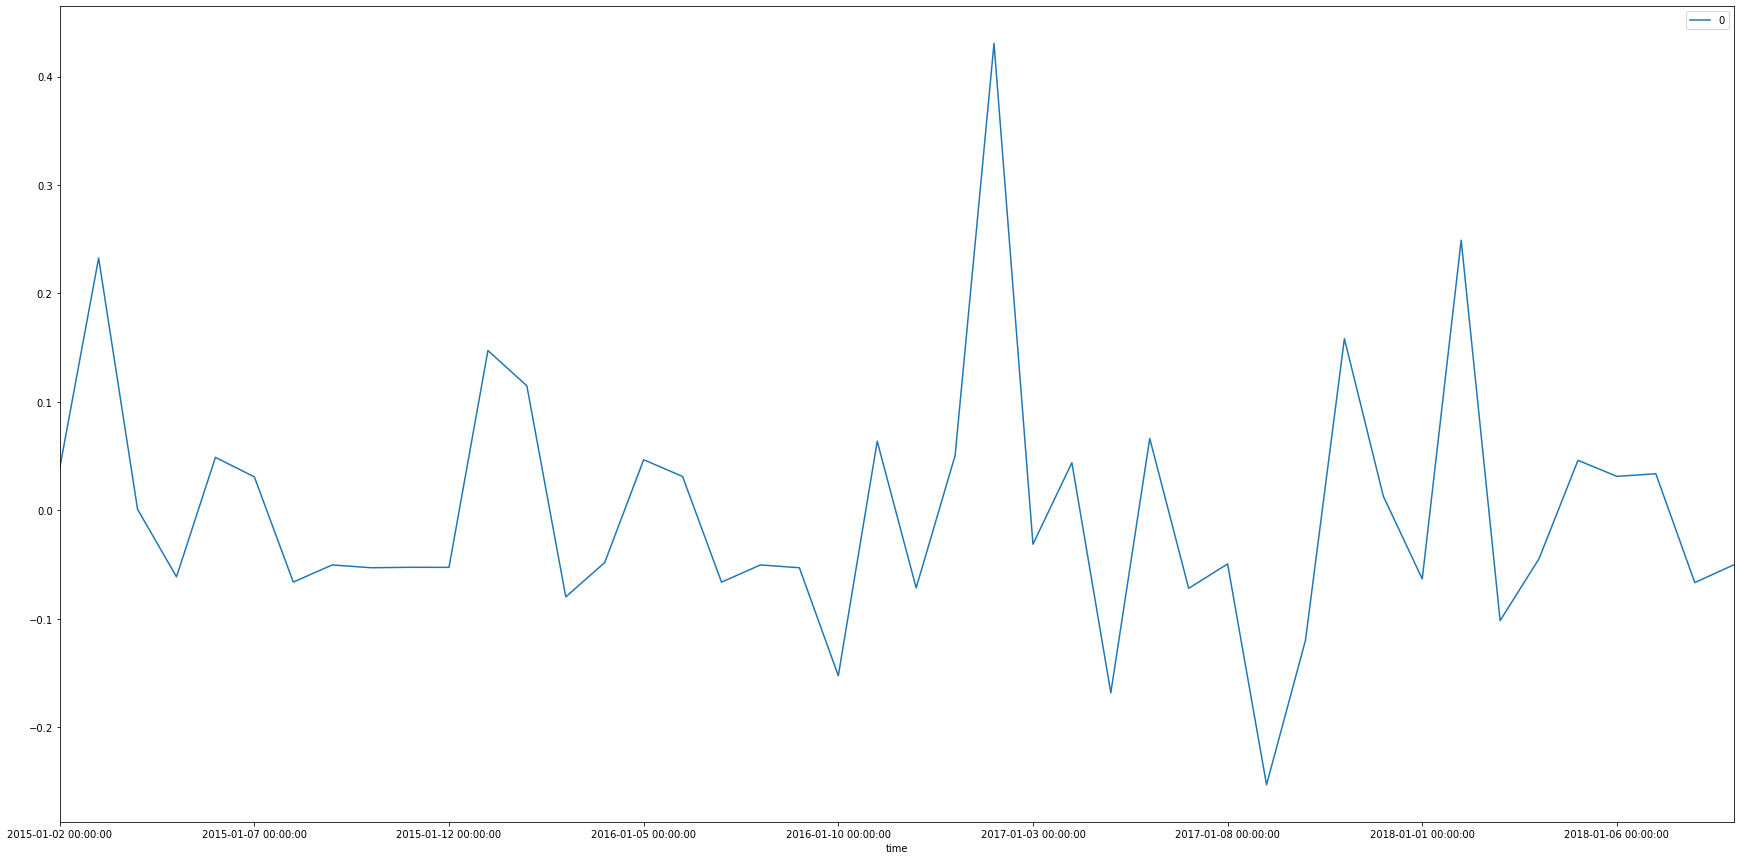

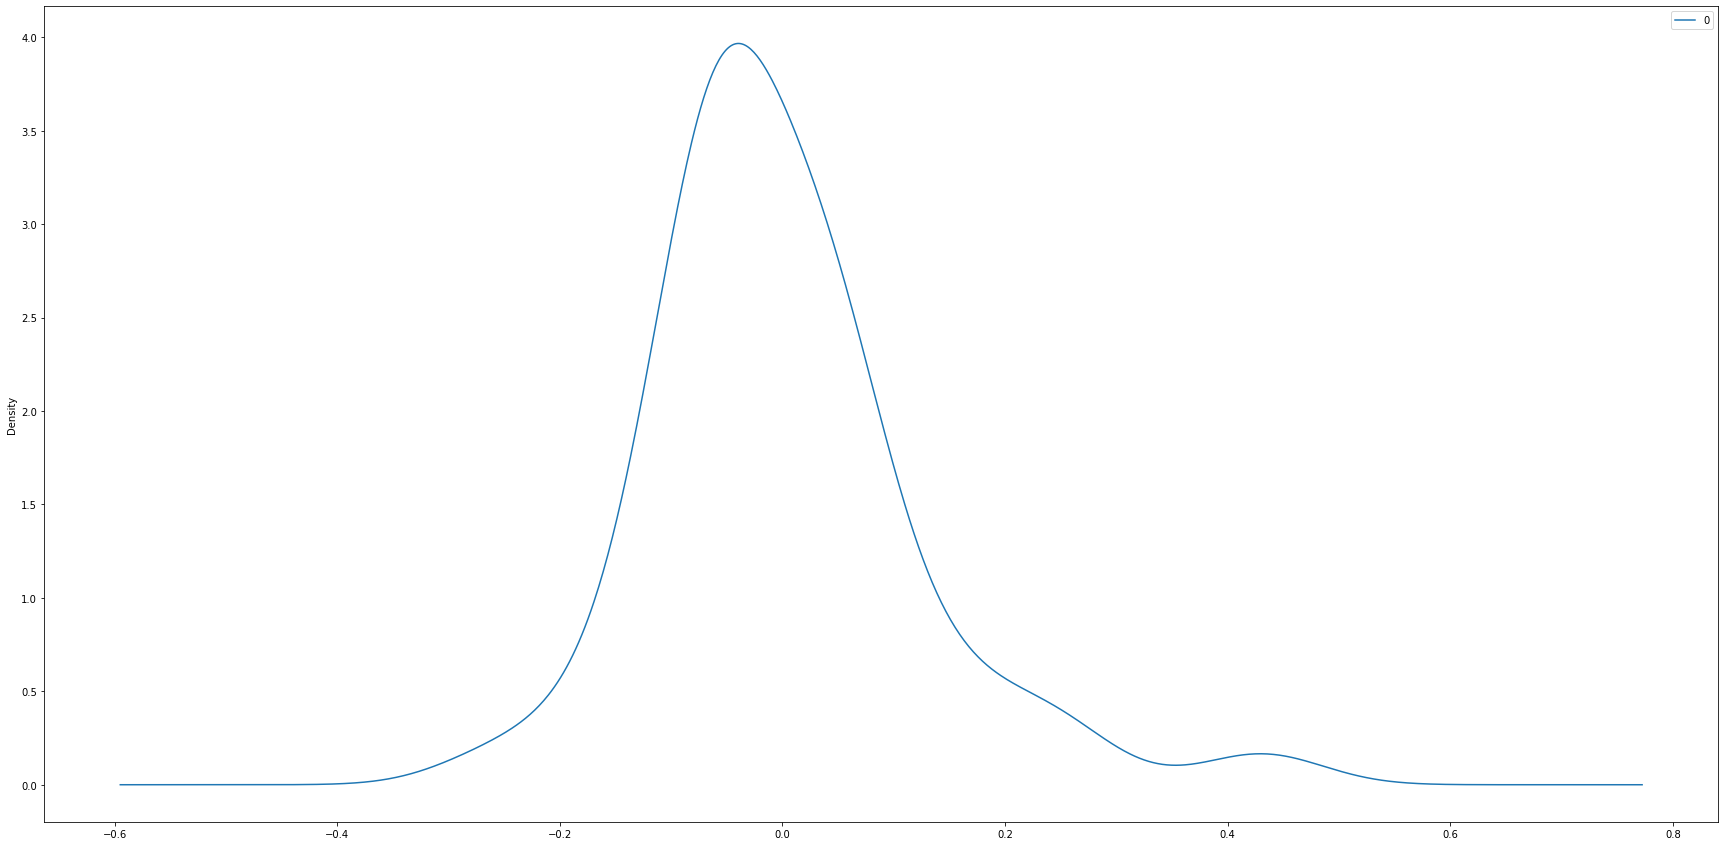

In [118]:
#ARIMA fit Morrisons marketshare
model = ARIMA(aldiseries, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot(figsize=(30,15))
residuals.plot(kind='kde', figsize=(30,15))
print(residuals.describe())     

In [119]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [120]:
indexdf = pd.date_range(start='2015-1-1', periods=45, freq='M') 
indexdf=indexdf.to_period()

X=aldiseries
X.index = indexdf

In [121]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [122]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))



print('Examples of parameter combinations for Seasonal ARIMA...')
print('ARIMA:',pdq[0])
print('ARIMA:',pdq[1])
print('ARIMA:',pdq[2])


Examples of parameter combinations for Seasonal ARIMA...
ARIMA: (0, 0, 0)
ARIMA: (0, 0, 1)
ARIMA: (0, 1, 0)


In [123]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    #for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.ARIMA(X,
                                            order=param)
                                            #seasonal_order=param_seasonal,
                                            #enforce_stationarity=False,
                                            #enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA:',param, results.aic)
        except:
            continue

ARIMA: (0, 0, 0) 106.33146686967223
ARIMA: (0, 0, 1) 57.43558072678675
ARIMA: (0, 1, 0) -59.79854783157893
ARIMA: (0, 1, 1) -58.72049215212806
ARIMA: (1, 0, 0) -43.89025742030826
ARIMA: (1, 0, 1) -46.23410771944985
ARIMA: (1, 1, 0) -58.50307875679272


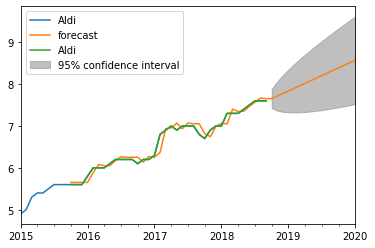

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0612      0.020      3.020      0.004       0.021       0.101
ma.L1.D.Aldi     0.1628      0.166      0.979      0.333      -0.163       0.489


In [124]:
####grid search (or hyperparameter optimization) for model selection####
####ARIMA(0, 0, 1)x(0, 1, 0, 12)12
import statsmodels.api as sm
#sm.tsa.ARIMA()



mod = sm.tsa.ARIMA(aldiseries,order=(0, 1, 1))
results = mod.fit()
fig, ax = plt.subplots()
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = results.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.show()



print(results.summary().tables[1])

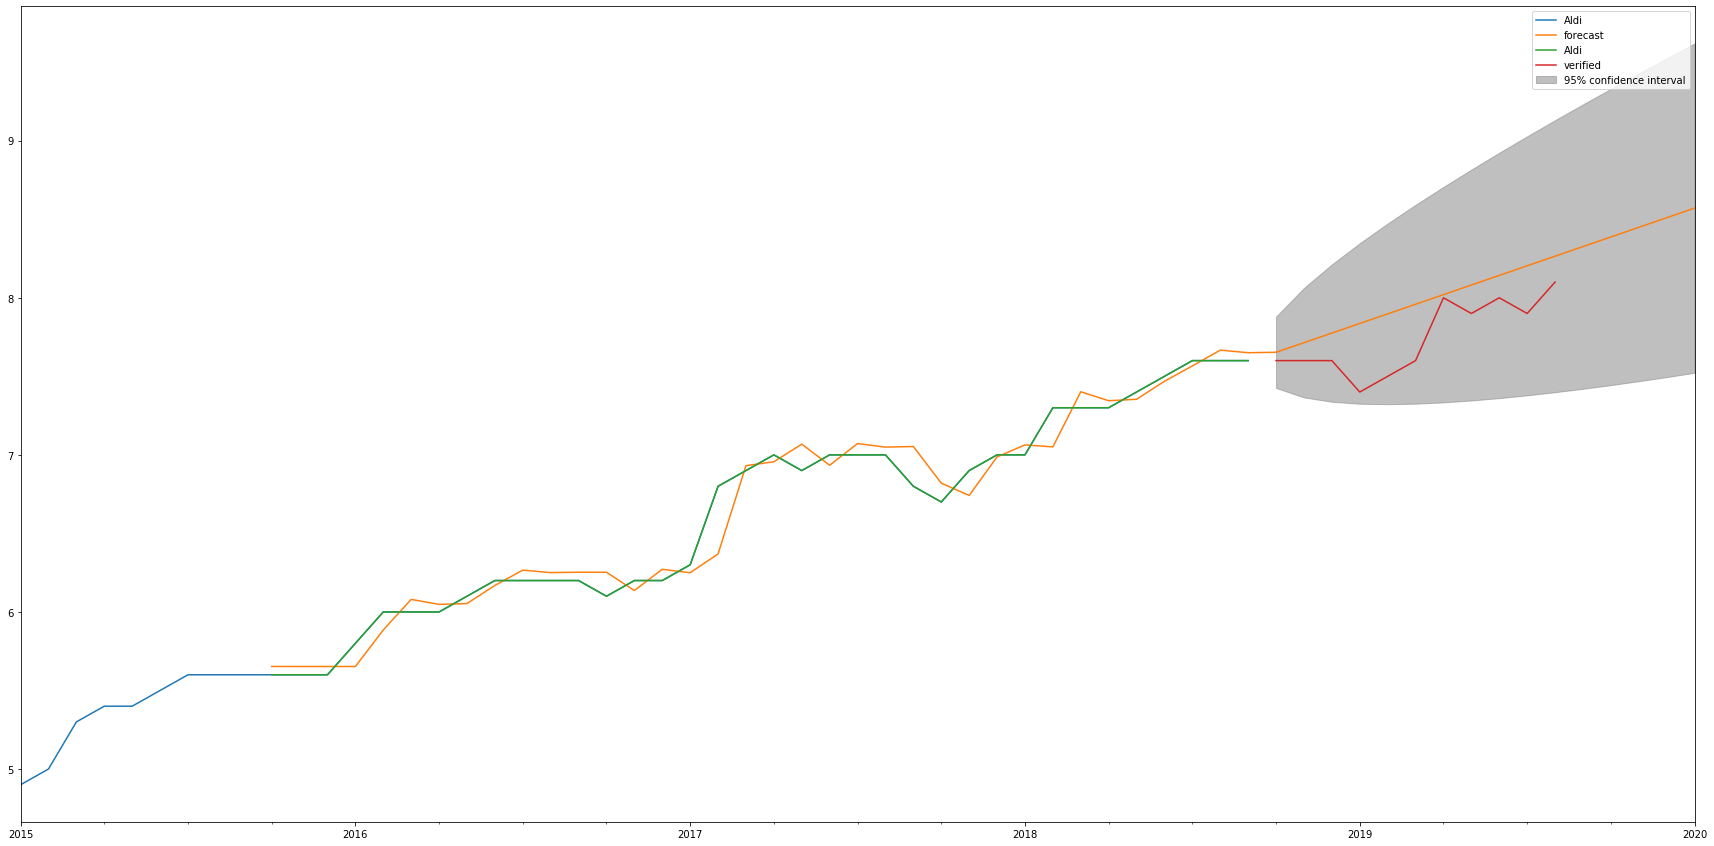

In [125]:
X=aldiseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(aldi2019, label='verified')
plt.legend()
plt.show()

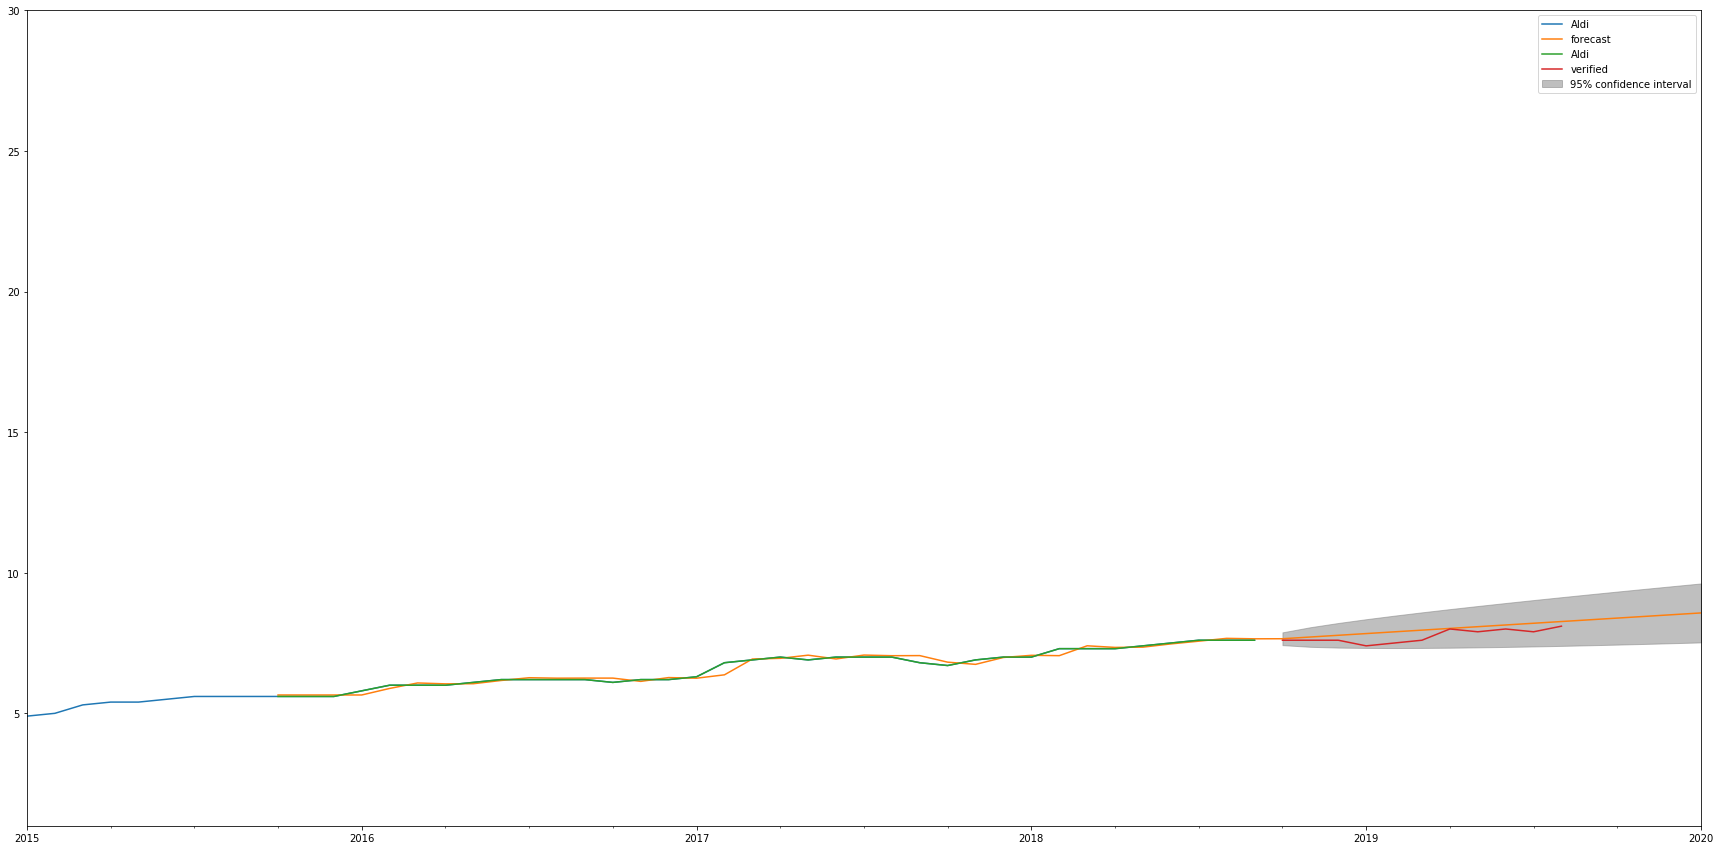

In [126]:
X=aldiseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(aldi2019, label='verified')
plt.legend()
plt.show()

In [127]:
print(res)

In [128]:
X = aldiseries.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(0,1,1))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=6.932459, expected=7.000000
predicted=7.082766, expected=7.000000
predicted=7.057514, expected=7.000000
predicted=7.058288, expected=6.800000
predicted=6.810477, expected=6.700000
predicted=6.731008, expected=6.900000
predicted=6.996817, expected=7.000000
predicted=7.060596, expected=7.000000
predicted=7.044237, expected=7.300000
predicted=7.416147, expected=7.300000
predicted=7.348807, expected=7.300000
predicted=7.354221, expected=7.400000
predicted=7.469550, expected=7.500000
predicted=7.568178, expected=7.600000
predicted=7.669328, expected=7.600000
predicted=7.652076, expected=7.600000
Test MSE: 0.014


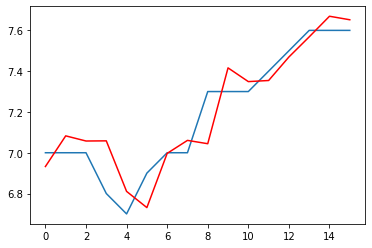

In [129]:
# plot
plt.plot(test)
plt.plot(predictions, color='red')

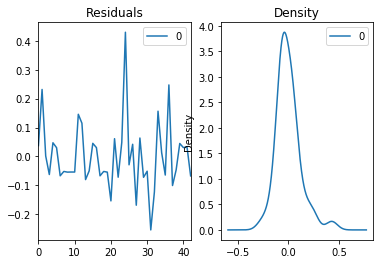

In [130]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

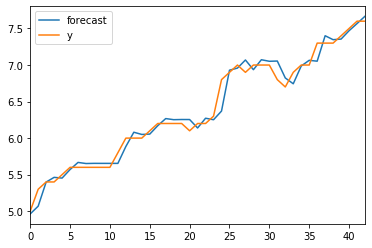

In [131]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

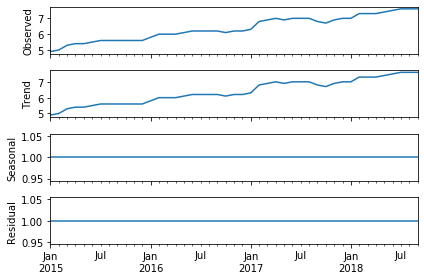

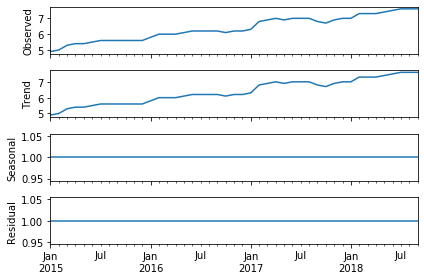

In [132]:
result = seasonal_decompose(aldiseries, model='multiplicative', freq=1)

result.plot()



In [133]:
####Auto Arima Forecast in Python for Morrisons###

import pmdarima as pm


model = pm.auto_arima(aldiseries, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())






Fit ARIMA: order=(1, 0, 1); AIC=-46.234, BIC=-39.007, Fit time=0.093 seconds
Fit ARIMA: order=(0, 0, 0); AIC=106.331, BIC=109.945, Fit time=0.003 seconds
Fit ARIMA: order=(1, 0, 0); AIC=-43.890, BIC=-38.470, Fit time=0.033 seconds
Fit ARIMA: order=(0, 0, 1); AIC=57.436, BIC=62.856, Fit time=0.040 seconds
Fit ARIMA: order=(2, 0, 1); AIC=-44.669, BIC=-35.636, Fit time=0.167 seconds
Fit ARIMA: order=(1, 0, 2); AIC=-44.307, BIC=-35.274, Fit time=0.137 seconds
Fit ARIMA: order=(2, 0, 2); AIC=-42.258, BIC=-31.418, Fit time=0.419 seconds
Total fit time: 0.903 seconds
                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                   45
Model:                     ARMA(1, 1)   Log Likelihood                  27.117
Method:                       css-mle   S.D. of innovations              0.126
Date:                Wed, 31 Jul 2019   AIC                            -46.234
Time:                        15:34:54 

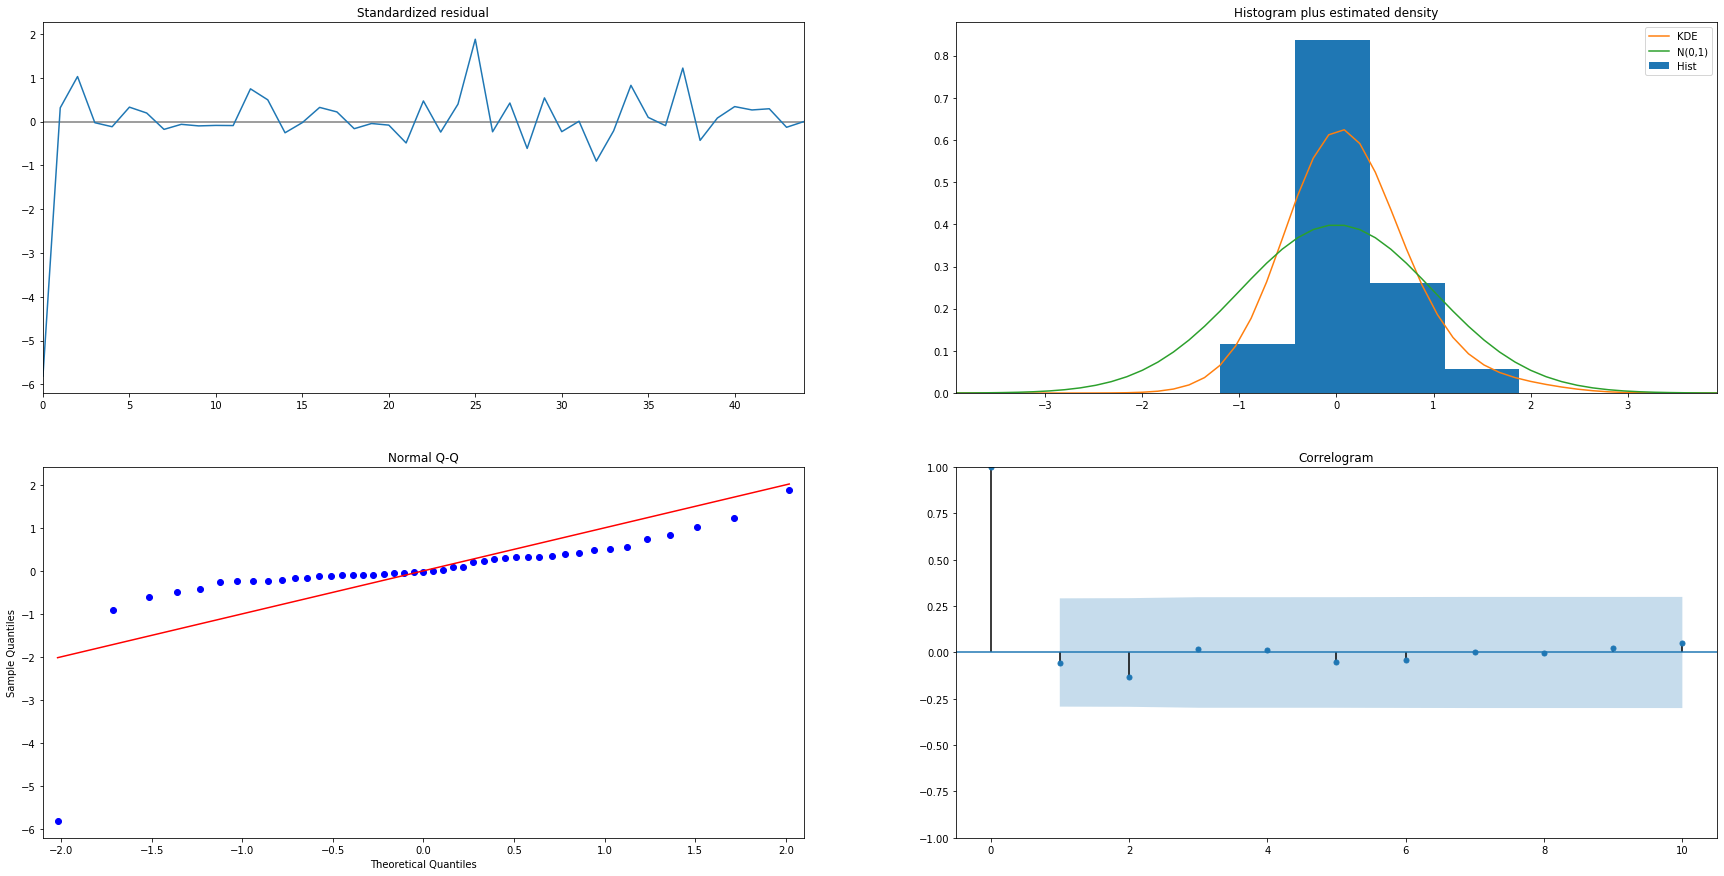

In [134]:
model.plot_diagnostics(figsize=(30,15))
plt.show()

In [135]:
#zoom out
list(glv10adf)

['Tesco',
 'Sainsburys',
 'Asda',
 'Morrisons',
 'Aldi',
 'The Cooperative',
 'Lidl',
 'Waitrose',
 'Iceland',
 'Symbols',
 'Other']

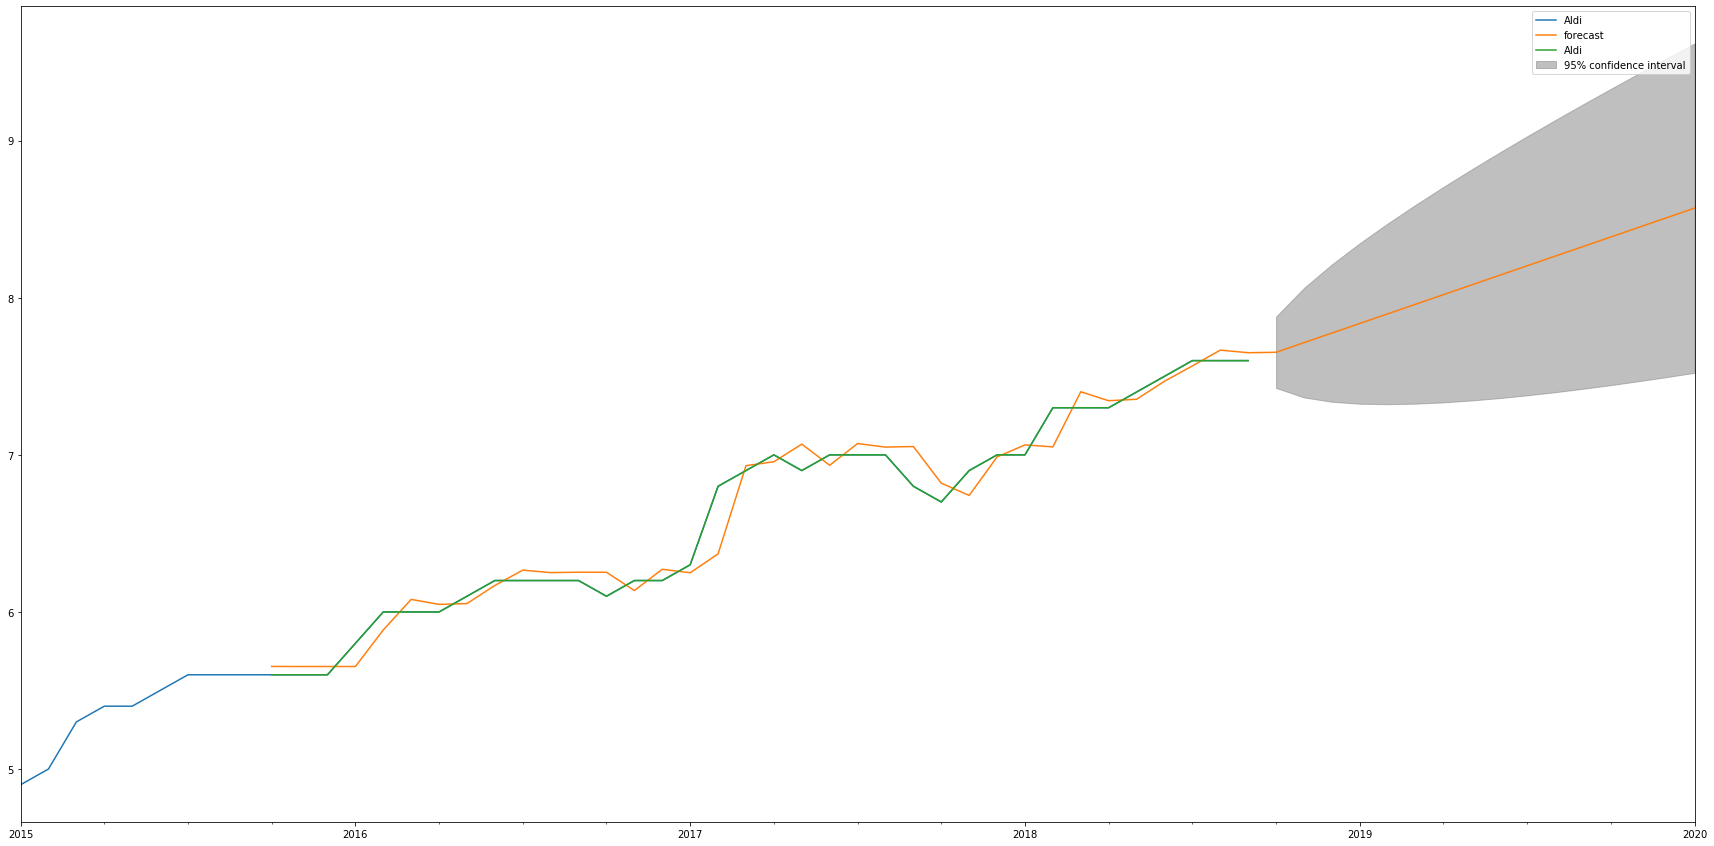

In [136]:
#zoom in

X=aldiseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)

plt.show()

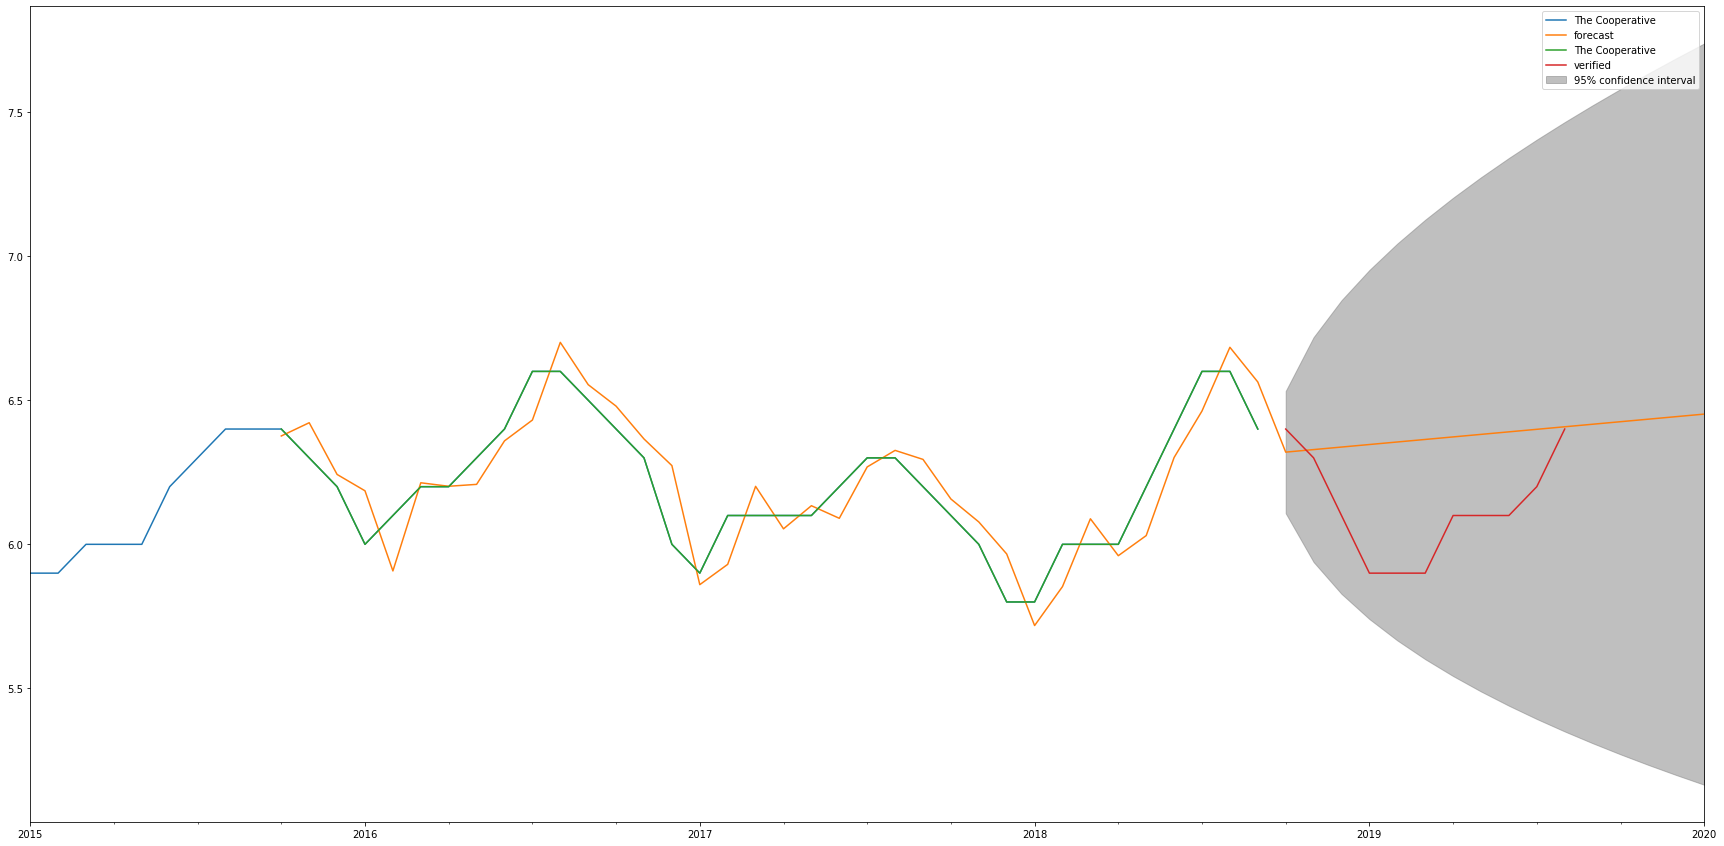

In [137]:
coopseries = glv10adf['The Cooperative']

X=coopseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(coop2019, label='verified')
plt.legend()
plt.show()

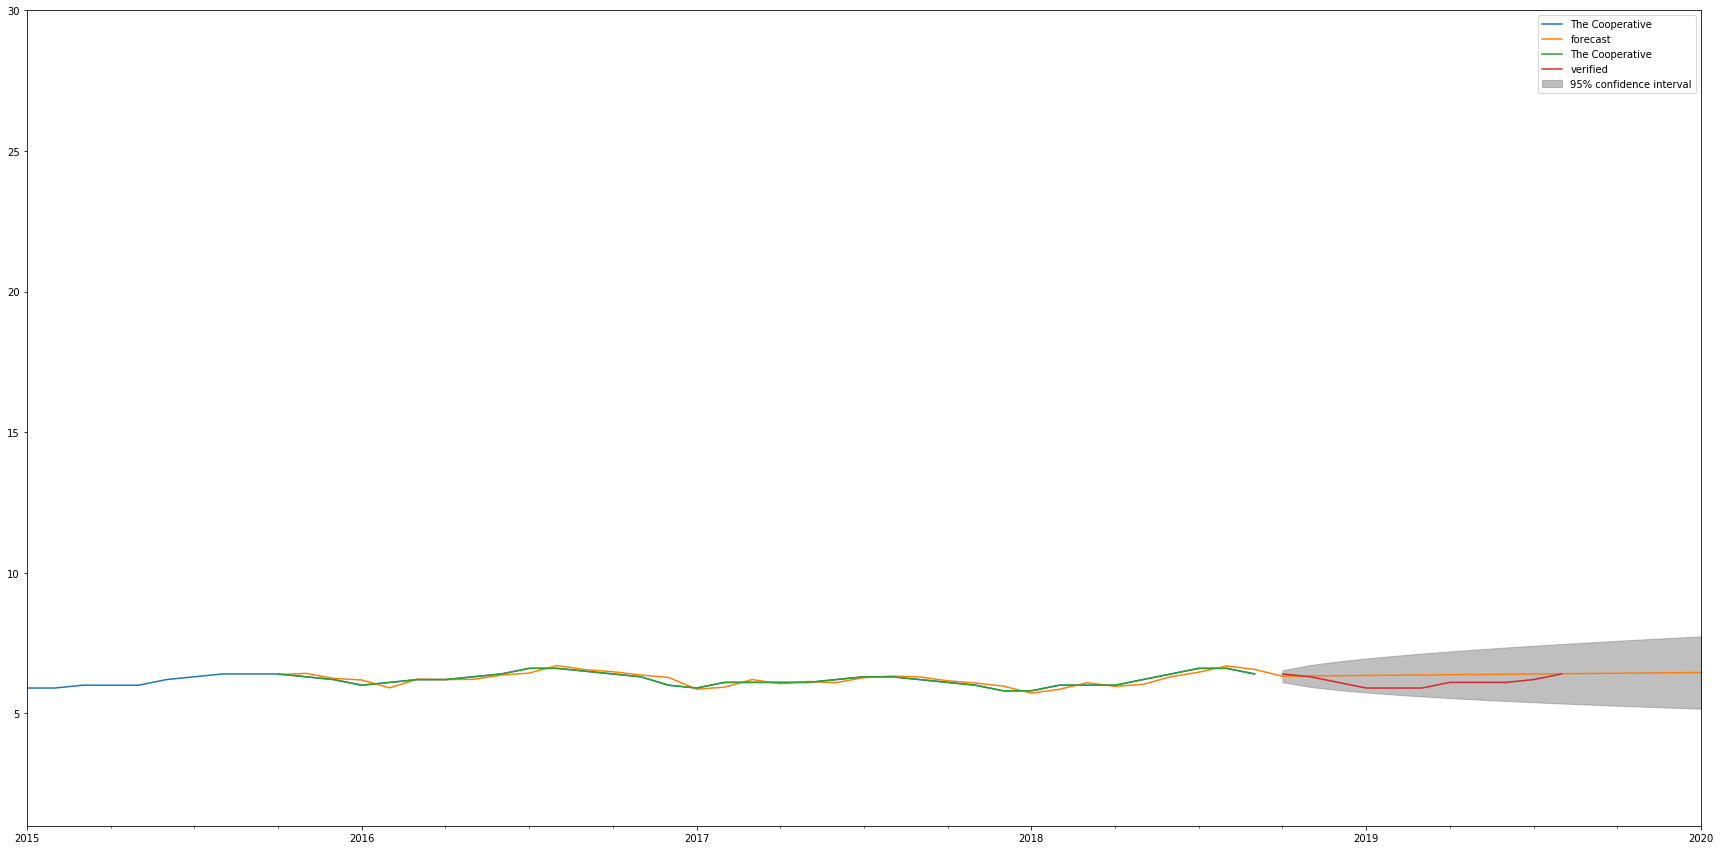

In [138]:
X=coopseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(coop2019, label='verified')
plt.legend()
plt.show()

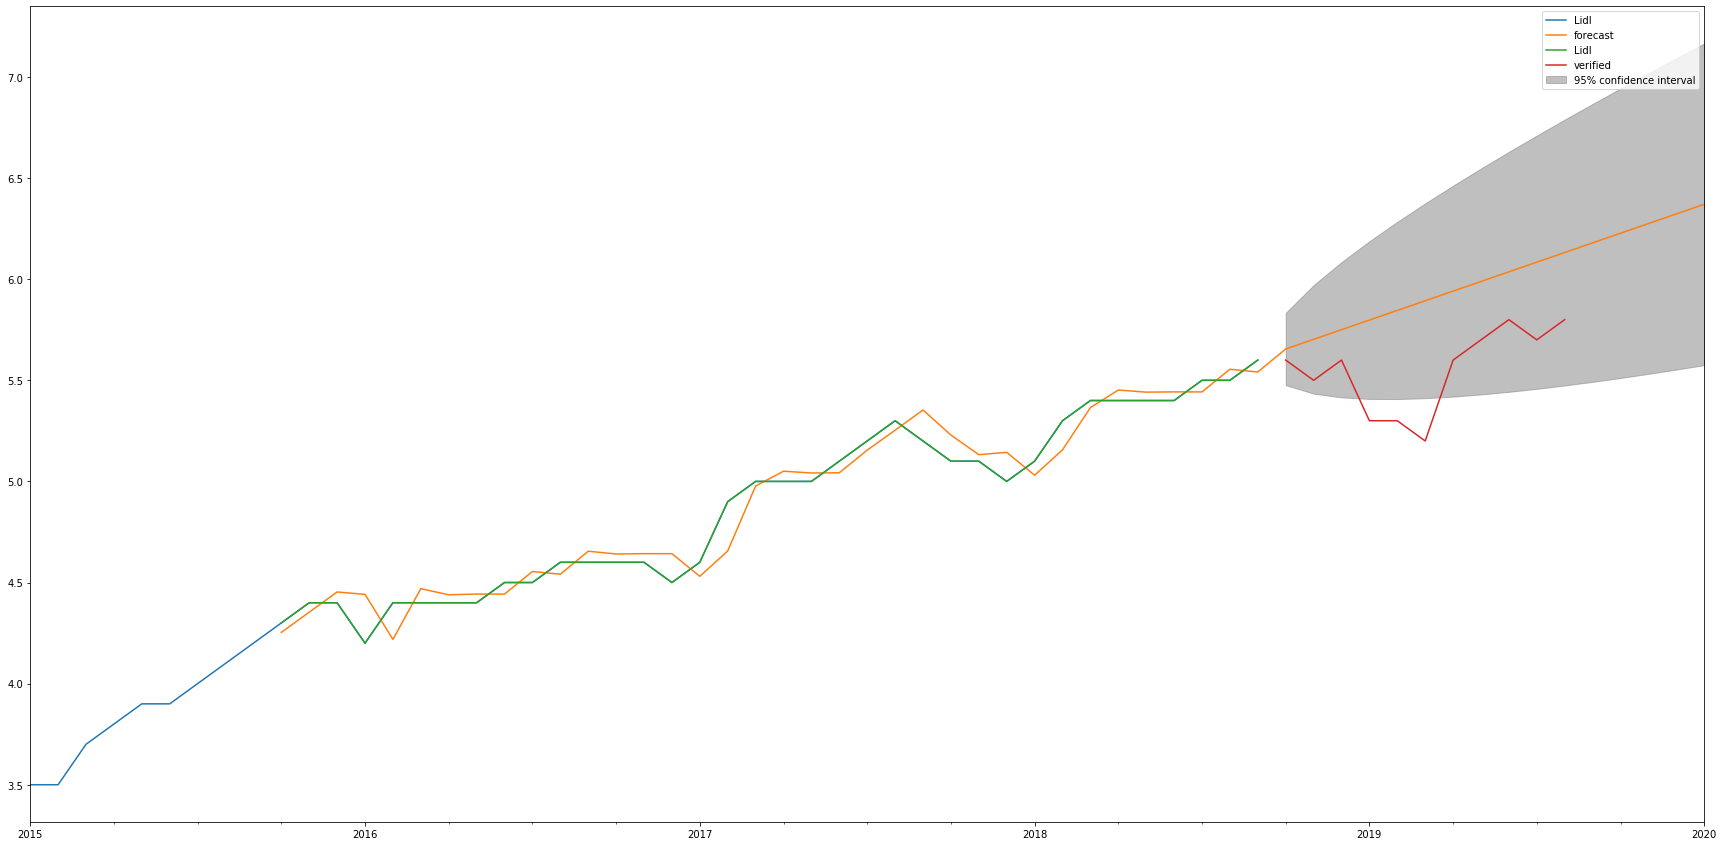

In [139]:
lidlseries = glv10adf['Lidl']

X=lidlseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(lidl2019, label='verified')
plt.legend()
plt.show()

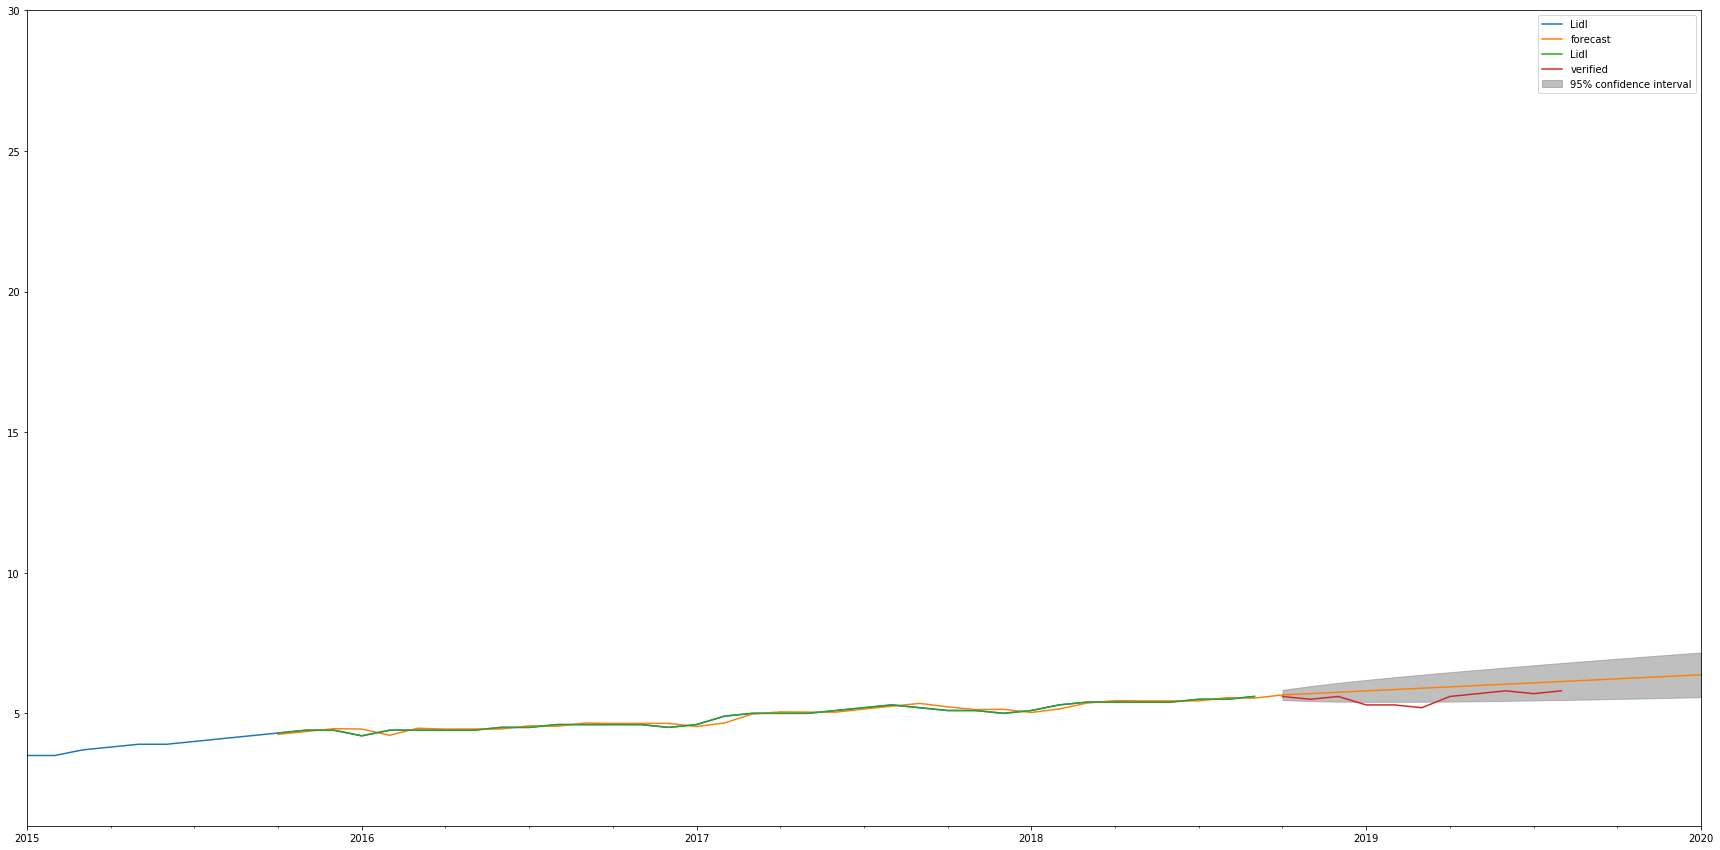

In [140]:
X=lidlseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(lidl2019, label='verified')
plt.legend()
plt.show()

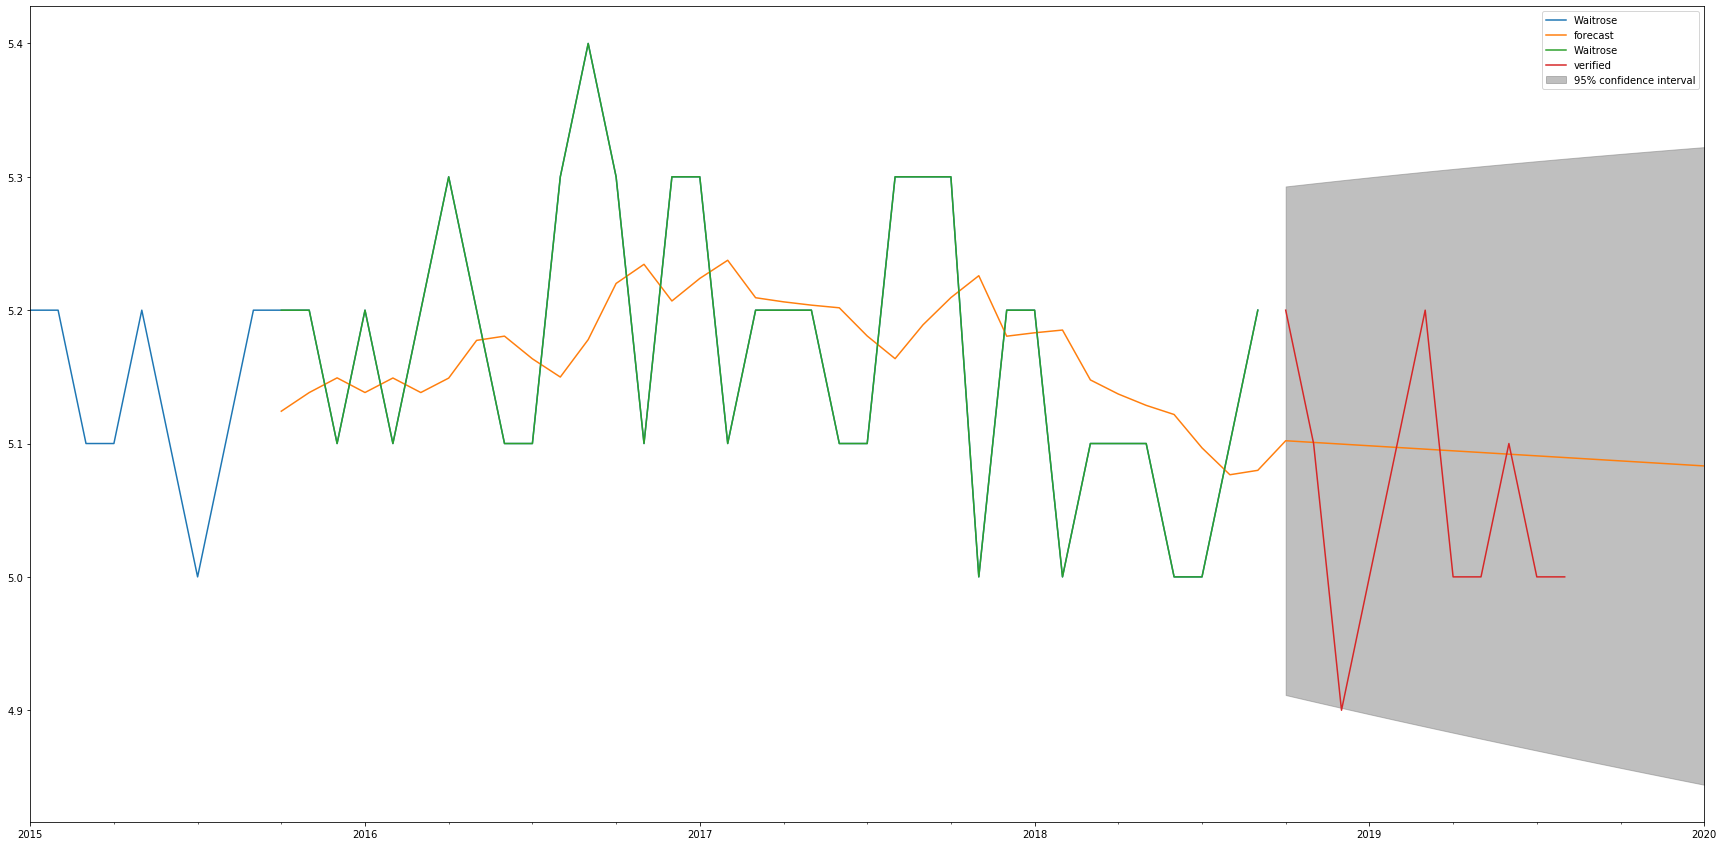

In [141]:
waitroseseries = glv10adf['Waitrose']

X=waitroseseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(waitrose2019, label='verified')
plt.legend()
plt.show()

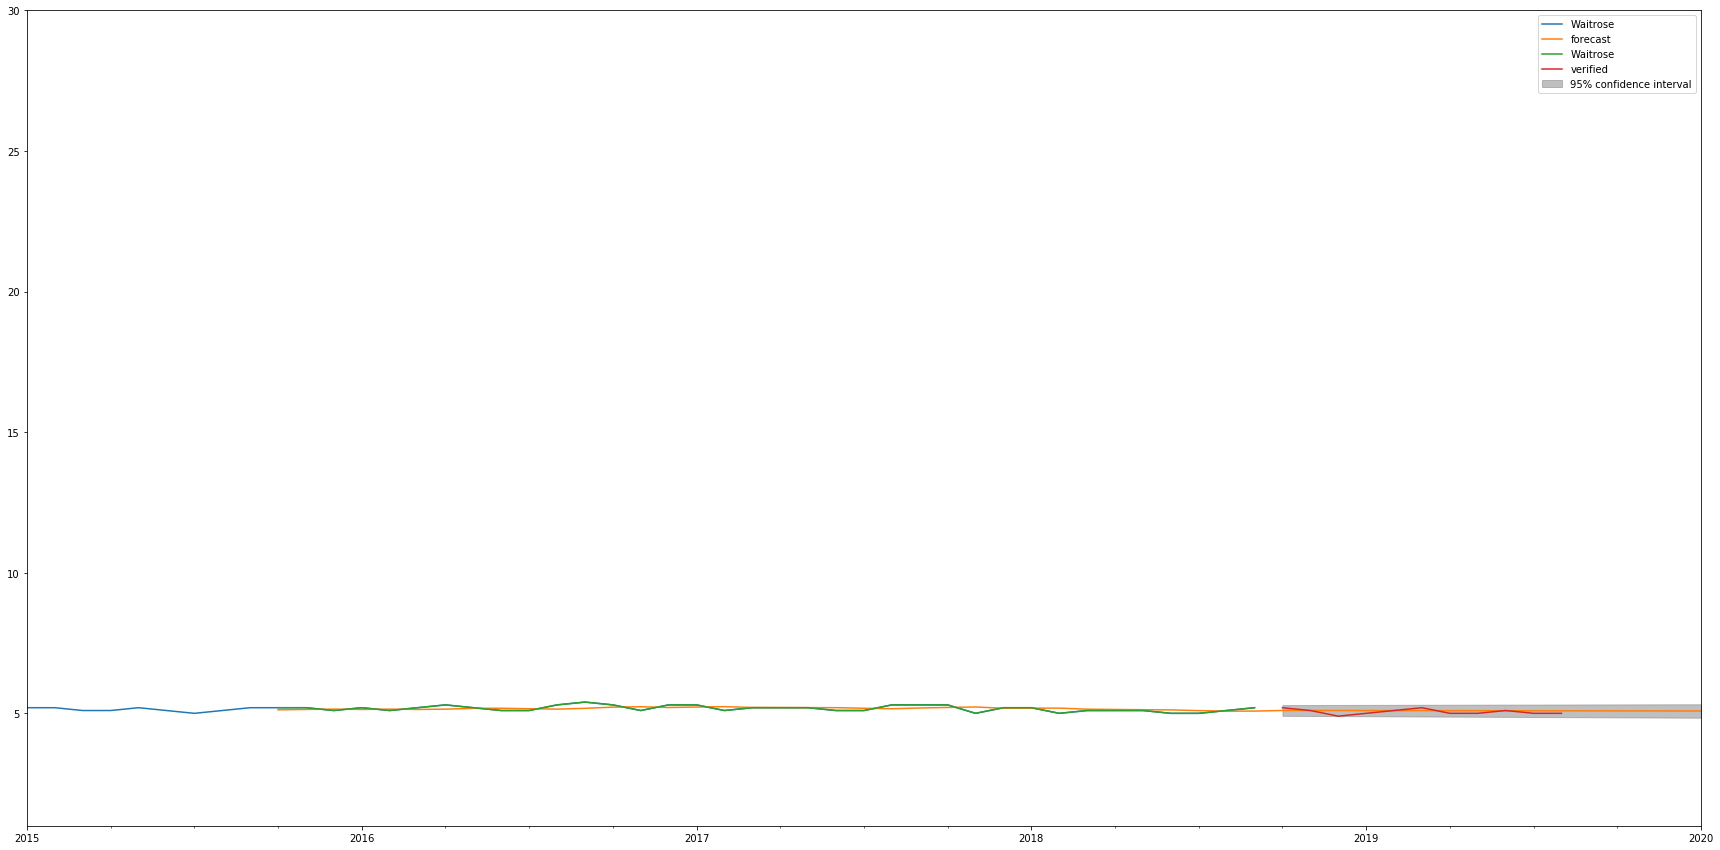

In [142]:
X=waitroseseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(waitrose2019, label='verified')
plt.legend()
plt.show()

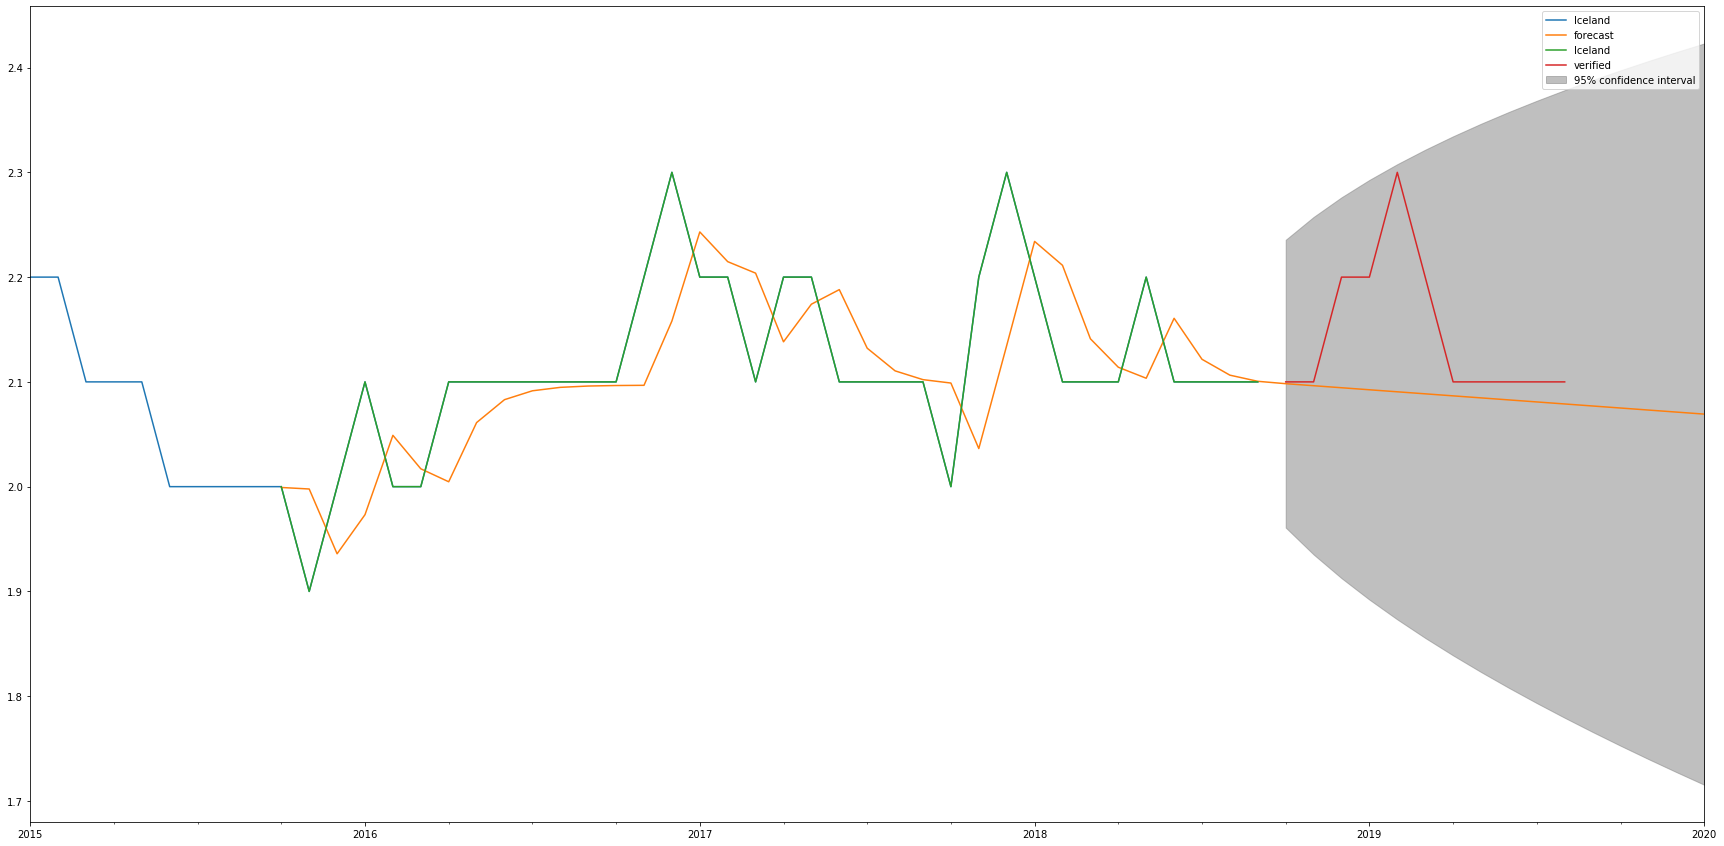

In [143]:
icelandseries = glv10adf['Iceland']

X=icelandseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(iceland2019, label='verified')
plt.legend()
plt.show()

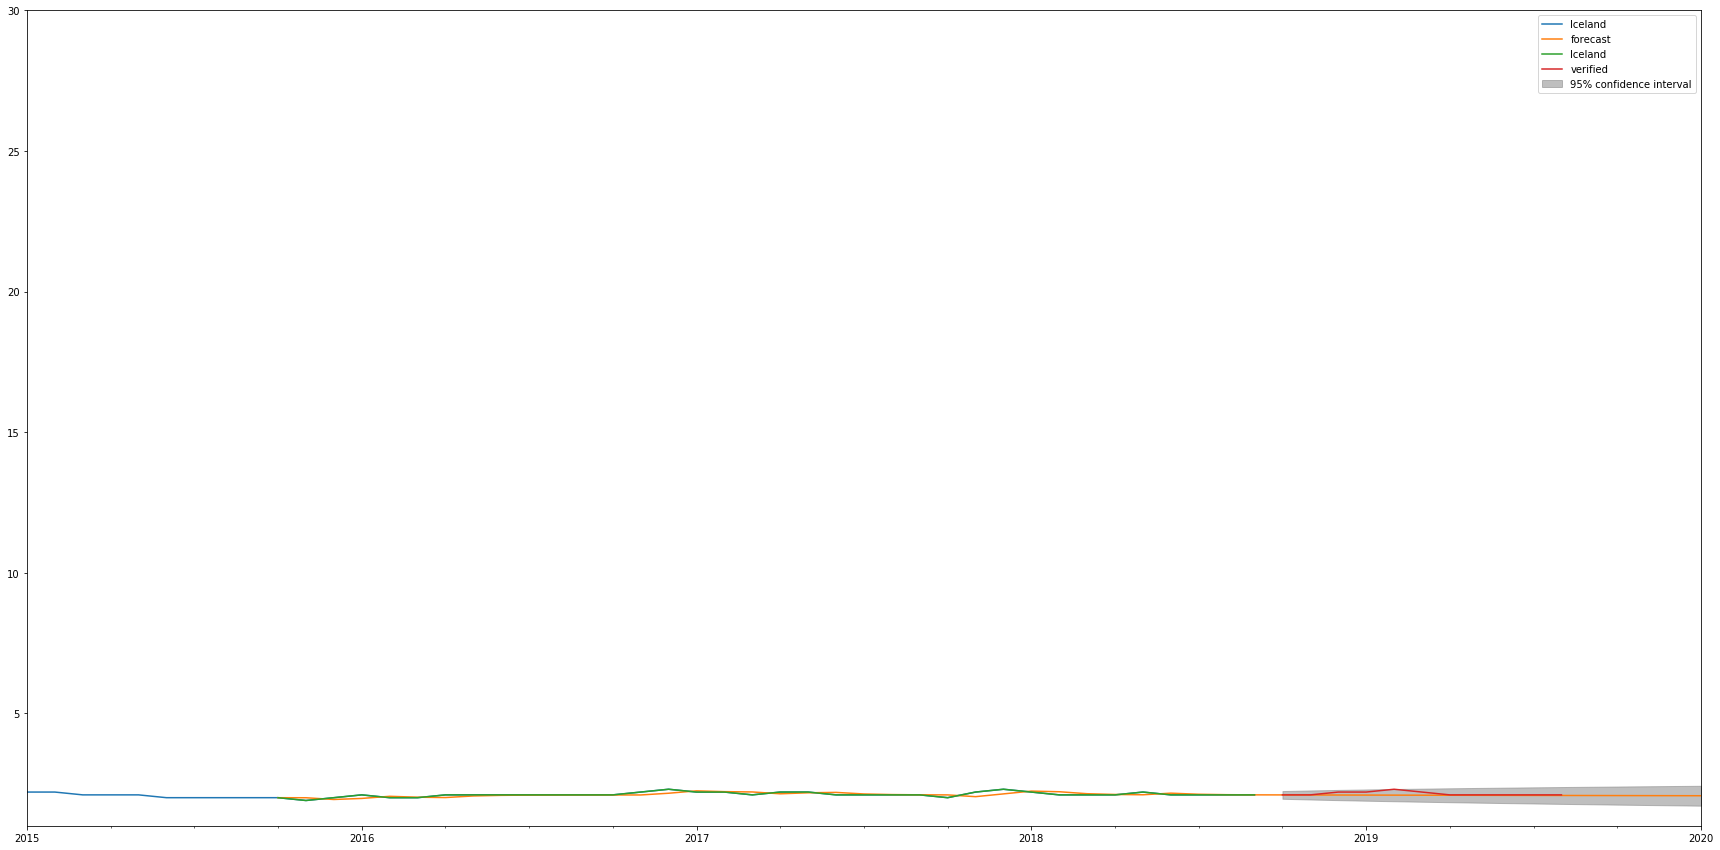

In [144]:
X=icelandseries
X.index = indexdf              #pd.DatetimeIndex(start='Jan-15', end='Oct-18', freq='M')
res = sm.tsa.ARIMA(X, (0, 1, 1)).fit()
fig, ax = plt.subplots(figsize=(30,15))
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([1,30])
ax = X.loc['2015-1-1':].plot(ax=ax)
fig = res.plot_predict('2015-10-1', '2020-1-1', dynamic=False, ax=ax, plot_insample=True)
plt.plot(iceland2019, label='verified')
plt.legend()
plt.show()